In [ ]:
import numpy as np
import pandas as pd
import csv
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/diabetes.csv", header=0, index_col=0)
df

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


In [ ]:
# Preprocessing 
# checking non-positive values for BMI
print("Checking non-positive values for BMI")
print(df["BMI"].le(0).any())

print("\n")

# checking non-positive values for Age
print("Checking non-positive values for Age")
print(df["Age"].le(0).any())

print("\n")

# Checking values other than 0 or 1 for binary variables:
print("Checking values other than 0 or 1 for binary variables")
print("----------------------------- \n")
binary_columns = ["Diabetes_binary", "HighBP", "High Cholesterol", "Cholesterol Check", "Smoker", "Stroke", "HeartDiseaseorAttack", "Physical Activity", "Fruits", "Veggies", "Heavy Alcohol Consumption", "Any Health Care", "No Doctor because of Cost", "Difficulty Walking"]
for column in binary_columns:
    print(column)
    print(df[column].between(0, 1, inclusive='neither').any())
    print("\n")
print("-----------------------------\n")


# checking categorical variables to see if there exists any invalid values
print("Checking categorical variables to see if there exists any invalid values")
print("-----------------------------\n")
categorical_columns = ["General Health", "Sex", "Education", "Income"]
for column in categorical_columns:
    print(column)
    print(df[column].unique())
    print("\n")
print("-----------------------------\n")


Checking non-positive values for BMI
False


Checking non-positive values for Age
False


Checking values other than 0 or 1 for binary variables
----------------------------- 

Diabetes_binary
False


HighBP
False


High Cholesterol
False


Cholesterol Check
False


Smoker
False


Stroke
False


HeartDiseaseorAttack
False


Physical Activity
False


Fruits
False


Veggies
False


Heavy Alcohol Consumption
False


Any Health Care
False


No Doctor because of Cost
False


Difficulty Walking
False


-----------------------------

Checking categorical variables to see if there exists any invalid values
-----------------------------

General Health
['Medium' 'High' 'Good' 'Low' 'Very Low' nan]


Sex
['male' 'female' nan]


Education
['Cat6' 'Cat5' 'Cat4' 'Cat3' 'Cat2' 'Cat1' nan]


Income
['Cat8' 'Cat7' 'Cat6' 'Cat3' 'Cat4' 'Cat1' 'Cat5' 'Cat2' nan 'Unknown']


-----------------------------



In [ ]:
# checking the number of missing values in each column
print("Checking the number of missing values in each column")
print(df.isna().sum())
print("\n")

# checking if there is any row with a lot of missing values 
print("Checking if there is any row with a lot of missing values")
index_with_the_max_number_of_missing_values = 0
max_number_of_missing_values = 0
for i in range(0, len(df)):
    if df.loc[[i]].isna().sum().sum() > max_number_of_missing_values:
        index_with_the_max_number_of_missing_values = i
        max_number_of_missing_values = df.loc[[i]].isna().sum().sum()
print(index_with_the_max_number_of_missing_values)
print(max_number_of_missing_values)

Checking the number of missing values in each column
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64


Checking if there is any row with a lot of missing values
11691
15


In [ ]:
df.loc[[11691]]

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now Lets remove the row number 11691 with 15 missing values :/
print("Now Lets remove the row number 11691 with 15 missing values :/ \n")
df = df.drop(index=11691)
df.isna().sum()

Now Lets remove the row number 11691 with 15 missing values :/ 



Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       1
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              1
No Doctor because of Cost    1
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           1
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

We will fill other NaNs with median(for numerical columns) and mode(for categorical columns) also we will fill the Unknown value of income with mode

In [ ]:
binary_columns_with_missing_values = ["Fruits", "Any Health Care", "No Doctor because of Cost", "Difficulty Walking"]
for column in binary_columns_with_missing_values:
    df.loc[df[column].isna(), column] = df[column].mode()[0]

df.loc[df["BMI"].isna(), "BMI"] = df["BMI"].median()
   
df.loc[df["Income"] == "Unknown", "Income"] = df["Income"].mode()[0]

df

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


Removing whitespaces

In [ ]:
def remove_whitespaces(s):
    if s is not None:
        return (s.replace(" ", "_"))
    else:
        print("The string is None")

df.columns = map(lambda x: remove_whitespaces(x), df.columns)
df["General_Health"] = df["General_Health"].apply(lambda x: remove_whitespaces(x))
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very_Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


Normalization : Age, BMI, Mental_Health, Physical_Health variables need to be normalized

In [ ]:
df["Age"] = (df["Age"] - df["Age"].min())/(df["Age"].max() - df["Age"].min())

df["BMI"] = (df["BMI"] - df["BMI"].min())/(df["BMI"].max() - df["BMI"].min())

df["Mental_Health"] = (df["Mental_Health"] - df["Mental_Health"].min())/(df["Mental_Health"].max() - df["Mental_Health"].min())

df["Physical_Health"] = (df["Physical_Health"] - df["Physical_Health"].min())/(df["Physical_Health"].max() - df["Physical_Health"].min())

df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very_Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


Converting categorical features to numerical

In [ ]:
df = pd.get_dummies(df)
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


Seperating labels and features

In [ ]:
df_X = df.iloc[:, 1:]
df_X

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
70688,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_Y = df.iloc[:, :1]
df_Y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


XGBoost Classifier

In [ ]:
# Now lets split Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=42)

# Setting parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_estimators': 200,
    'subsample': 0.5,
    'colsample_bytree': 1,
    'random_state': 123,
    'eval_metric': 'auc',
    'verbosity': 1,
    'early_stopping_rounds': 10,
}

# Training Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xgb.train(params, dtrain, evals=evallist)

[0]	eval-auc:0.78488	train-auc:0.784609
[1]	eval-auc:0.798776	train-auc:0.799729
[2]	eval-auc:0.804085	train-auc:0.803747
[3]	eval-auc:0.807389	train-auc:0.80656
[4]	eval-auc:0.80985	train-auc:0.809274
[5]	eval-auc:0.812199	train-auc:0.810773
[6]	eval-auc:0.813131	train-auc:0.812424
[7]	eval-auc:0.814518	train-auc:0.813532
[8]	eval-auc:0.815824	train-auc:0.814814
[9]	eval-auc:0.816615	train-auc:0.816056


In [ ]:
# Inferencing
y_pred_train = bst.predict(dtrain)
y_pred_test = bst.predict(dtest)

y_pred_train = (y_pred_train > 0.5).astype(int)
y_pred_test = (y_pred_test > 0.5).astype(int)

Accuracy, Precision, Recall for Train set:
Accuracy
0.7402744376856698
Precision
0.7247186739659367
Recall
0.7725946340277214
Accuracy, Precision, Recall for Test set:
Accuracy
0.7400509241795549
Precision
0.727609635577517
Recall
0.7726761619190404


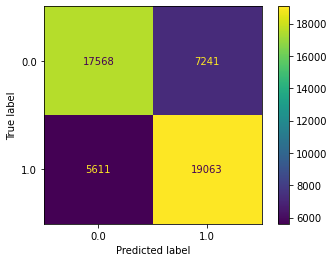

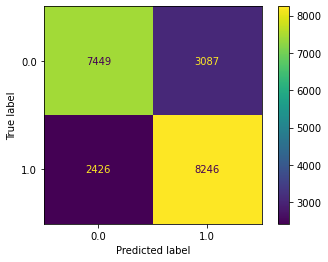

In [ ]:
print("Accuracy, Precision, Recall for Train set:")
print("Accuracy")
print(accuracy_score(y_train, y_pred_train))
print("Precision")
print(precision_score(y_train, y_pred_train))
print("Recall")
print(recall_score(y_train, y_pred_train))
print("Accuracy, Precision, Recall for Test set:")
print("Accuracy")
print(accuracy_score(y_test, y_pred_test))
print("Precision")
print(precision_score(y_test, y_pred_test))
print("Recall") 
print(recall_score(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
# Hyperparameter tuning
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])


xgb_estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    eval_metric= 'auc',
    subsample= 0.5, 
    seed= 123, 
    verbosity= 0, 
    gpu_id= 0, 
    tree_method= 'gpu_hist'
)

params = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1],
}
clf = GridSearchCV(xgb_estimator, param_grid=params, scoring=my_roc_auc_score, cv=3, verbose=1)
eval_set = [(X_test, y_test)]
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[0]	validation_0-auc:0.737326
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.781297
[2]	validation_0-auc:0.776633
[3]	validation_0-auc:0.777214
[4]	validation_0-auc:0.780277
[5]	validation_0-auc:0.777299
[6]	validation_0-auc:0.782307
[7]	validation_0-auc:0.784138
[8]	validation_0-auc:0.782519
[9]	validation_0-auc:0.789012
[10]	validation_0-auc:0.795094
[11]	validation_0-auc:0.796614
[12]	validation_0-auc:0.798059
[13]	validation_0-auc:0.800192
[14]	validation_0-auc:0.801422


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.802785
[16]	validation_0-auc:0.801628
[17]	validation_0-auc:0.802136
[18]	validation_0-auc:0.801331
[19]	validation_0-auc:0.802703
[20]	validation_0-auc:0.802086
[21]	validation_0-auc:0.802883
[22]	validation_0-auc:0.801985
[23]	validation_0-auc:0.801262
[24]	validation_0-auc:0.800456
[25]	validation_0-auc:0.801145
[26]	validation_0-auc:0.80104
[27]	validation_0-auc:0.800447
[28]	validation_0-auc:0.800164
[29]	validation_0-auc:0.800534
[30]	validation_0-auc:0.800042
[31]	validation_0-auc:0.799715
Stopping. Best iteration:
[21]	validation_0-auc:0.802883

[0]	validation_0-auc:0.737485
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.771677
[2]	validation_0-auc:0.771345
[3]	validation_0-auc:0.775397
[4]	validation_0-auc:0.777705
[5]	validation_0-auc:0.775064
[6]	validation_0-auc:0.775508
[7]	validation_0-auc:0.773761
[8]	validation_0-auc:0.774056
[9]	validation_0-auc:0.783286
[10]	validation_0-auc:0.788442
[11]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.797538
[19]	validation_0-auc:0.798714
[20]	validation_0-auc:0.798899
[21]	validation_0-auc:0.800211
[22]	validation_0-auc:0.799226
[23]	validation_0-auc:0.799372
[24]	validation_0-auc:0.798415
[25]	validation_0-auc:0.799758
[26]	validation_0-auc:0.799448
[27]	validation_0-auc:0.799793
[28]	validation_0-auc:0.799436
[29]	validation_0-auc:0.799338
[30]	validation_0-auc:0.799094
[31]	validation_0-auc:0.798809
Stopping. Best iteration:
[21]	validation_0-auc:0.800211

[0]	validation_0-auc:0.733697
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.765976
[2]	validation_0-auc:0.767858
[3]	validation_0-auc:0.777745
[4]	validation_0-auc:0.779742
[5]	validation_0-auc:0.777443
[6]	validation_0-auc:0.778727
[7]	validation_0-auc:0.776787
[8]	validation_0-auc:0.777882
[9]	validation_0-auc:0.785283
[10]	validation_0-auc:0.792169
[11]	validation_0-auc:0.793887
[12]	validation_0-auc:0.79322
[13]	validation_0-auc:0.796939
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.800109
[19]	validation_0-auc:0.801112
[20]	validation_0-auc:0.800435
[21]	validation_0-auc:0.802235
[22]	validation_0-auc:0.800931
[23]	validation_0-auc:0.801157
[24]	validation_0-auc:0.800549
[25]	validation_0-auc:0.801488
[26]	validation_0-auc:0.801641
[27]	validation_0-auc:0.801817
[28]	validation_0-auc:0.801435
[29]	validation_0-auc:0.801069
[30]	validation_0-auc:0.800666
[31]	validation_0-auc:0.800055
Stopping. Best iteration:
[21]	validation_0-auc:0.802235

[0]	validation_0-auc:0.737326
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.781297
[2]	validation_0-auc:0.776633
[3]	validation_0-auc:0.777214
[4]	validation_0-auc:0.780277
[5]	validation_0-auc:0.777299
[6]	validation_0-auc:0.782307
[7]	validation_0-auc:0.784138
[8]	validation_0-auc:0.782519
[9]	validation_0-auc:0.789012
[10]	validation_0-auc:0.795094
[11]	validation_0-auc:0.796614
[12]	validation_0-auc:0.798059
[13]	validation_0-auc:0.800192
[14]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.801331
[19]	validation_0-auc:0.802703
[20]	validation_0-auc:0.802086
[21]	validation_0-auc:0.802883
[22]	validation_0-auc:0.801985
[23]	validation_0-auc:0.801262
[24]	validation_0-auc:0.800456
[25]	validation_0-auc:0.801145
[26]	validation_0-auc:0.80104
[27]	validation_0-auc:0.800447
[28]	validation_0-auc:0.800164
[29]	validation_0-auc:0.800534
[30]	validation_0-auc:0.800042
[31]	validation_0-auc:0.799715
Stopping. Best iteration:
[21]	validation_0-auc:0.802883

[0]	validation_0-auc:0.737485
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.771677
[2]	validation_0-auc:0.771345
[3]	validation_0-auc:0.775397
[4]	validation_0-auc:0.777705
[5]	validation_0-auc:0.775064
[6]	validation_0-auc:0.775508
[7]	validation_0-auc:0.773761
[8]	validation_0-auc:0.774056
[9]	validation_0-auc:0.783286
[10]	validation_0-auc:0.788442
[11]	validation_0-auc:0.790466
[12]	validation_0-auc:0.792962
[13]	validation_0-auc:0.796731
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.797538
[19]	validation_0-auc:0.798714
[20]	validation_0-auc:0.798899
[21]	validation_0-auc:0.800211
[22]	validation_0-auc:0.799226
[23]	validation_0-auc:0.799372
[24]	validation_0-auc:0.798415
[25]	validation_0-auc:0.799758
[26]	validation_0-auc:0.799448
[27]	validation_0-auc:0.799793
[28]	validation_0-auc:0.799436
[29]	validation_0-auc:0.799338
[30]	validation_0-auc:0.799094
[31]	validation_0-auc:0.798809
Stopping. Best iteration:
[21]	validation_0-auc:0.800211

[0]	validation_0-auc:0.733697
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.765976
[2]	validation_0-auc:0.767858
[3]	validation_0-auc:0.777745
[4]	validation_0-auc:0.779742
[5]	validation_0-auc:0.777443
[6]	validation_0-auc:0.778727
[7]	validation_0-auc:0.776787
[8]	validation_0-auc:0.777882
[9]	validation_0-auc:0.785283
[10]	validation_0-auc:0.792169
[11]	validation_0-auc:0.793887
[12]	validation_0-auc:0.79322
[13]	validation_0-auc:0.796939
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.800109
[19]	validation_0-auc:0.801112
[20]	validation_0-auc:0.800435
[21]	validation_0-auc:0.802235
[22]	validation_0-auc:0.800931
[23]	validation_0-auc:0.801157
[24]	validation_0-auc:0.800549
[25]	validation_0-auc:0.801488
[26]	validation_0-auc:0.801641
[27]	validation_0-auc:0.801817
[28]	validation_0-auc:0.801435
[29]	validation_0-auc:0.801069
[30]	validation_0-auc:0.800666
[31]	validation_0-auc:0.800055
Stopping. Best iteration:
[21]	validation_0-auc:0.802235

[0]	validation_0-auc:0.737326
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.781297
[2]	validation_0-auc:0.776633
[3]	validation_0-auc:0.777214
[4]	validation_0-auc:0.780277
[5]	validation_0-auc:0.777299
[6]	validation_0-auc:0.782307
[7]	validation_0-auc:0.784138
[8]	validation_0-auc:0.782519
[9]	validation_0-auc:0.789012
[10]	validation_0-auc:0.795094
[11]	validation_0-auc:0.796614
[12]	validation_0-auc:0.798059
[13]	validation_0-auc:0.800192
[14]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.801331
[19]	validation_0-auc:0.802703
[20]	validation_0-auc:0.802086
[21]	validation_0-auc:0.802883
[22]	validation_0-auc:0.801985
[23]	validation_0-auc:0.801262
[24]	validation_0-auc:0.800456
[25]	validation_0-auc:0.801145
[26]	validation_0-auc:0.80104
[27]	validation_0-auc:0.800447
[28]	validation_0-auc:0.800164
[29]	validation_0-auc:0.800534
[30]	validation_0-auc:0.800042
[31]	validation_0-auc:0.799715
Stopping. Best iteration:
[21]	validation_0-auc:0.802883

[0]	validation_0-auc:0.737485
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.771677
[2]	validation_0-auc:0.771345
[3]	validation_0-auc:0.775397
[4]	validation_0-auc:0.777705
[5]	validation_0-auc:0.775064
[6]	validation_0-auc:0.775508
[7]	validation_0-auc:0.773761
[8]	validation_0-auc:0.774056
[9]	validation_0-auc:0.783286
[10]	validation_0-auc:0.788442
[11]	validation_0-auc:0.790466
[12]	validation_0-auc:0.792962
[13]	validation_0-auc:0.796731
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.797538
[19]	validation_0-auc:0.798714
[20]	validation_0-auc:0.798899
[21]	validation_0-auc:0.800211
[22]	validation_0-auc:0.799226
[23]	validation_0-auc:0.799372
[24]	validation_0-auc:0.798415
[25]	validation_0-auc:0.799758
[26]	validation_0-auc:0.799448
[27]	validation_0-auc:0.799793
[28]	validation_0-auc:0.799436
[29]	validation_0-auc:0.799338
[30]	validation_0-auc:0.799094
[31]	validation_0-auc:0.798809
Stopping. Best iteration:
[21]	validation_0-auc:0.800211

[0]	validation_0-auc:0.733697
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.765976
[2]	validation_0-auc:0.767858
[3]	validation_0-auc:0.777745
[4]	validation_0-auc:0.779742
[5]	validation_0-auc:0.777443
[6]	validation_0-auc:0.778727
[7]	validation_0-auc:0.776787
[8]	validation_0-auc:0.777882
[9]	validation_0-auc:0.785283
[10]	validation_0-auc:0.792169
[11]	validation_0-auc:0.793887
[12]	validation_0-auc:0.79322
[13]	validation_0-auc:0.796939
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-auc:0.801112
[20]	validation_0-auc:0.800435
[21]	validation_0-auc:0.802235
[22]	validation_0-auc:0.800931
[23]	validation_0-auc:0.801157
[24]	validation_0-auc:0.800549
[25]	validation_0-auc:0.801488
[26]	validation_0-auc:0.801641
[27]	validation_0-auc:0.801817
[28]	validation_0-auc:0.801435
[29]	validation_0-auc:0.801069
[30]	validation_0-auc:0.800666
[31]	validation_0-auc:0.800055
Stopping. Best iteration:
[21]	validation_0-auc:0.802235

[0]	validation_0-auc:0.760102
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80074
[2]	validation_0-auc:0.799609
[3]	validation_0-auc:0.800545
[4]	validation_0-auc:0.800754
[5]	validation_0-auc:0.800547
[6]	validation_0-auc:0.80099
[7]	validation_0-auc:0.801524
[8]	validation_0-auc:0.801097
[9]	validation_0-auc:0.804603
[10]	validation_0-auc:0.806197
[11]	validation_0-auc:0.808309
[12]	validation_0-auc:0.810488
[13]	validation_0-auc:0.81148
[14]	validation_0-auc:0.811562


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813165
[16]	validation_0-auc:0.813118
[17]	validation_0-auc:0.812816
[18]	validation_0-auc:0.812638
[19]	validation_0-auc:0.813572
[20]	validation_0-auc:0.813228
[21]	validation_0-auc:0.813417
[22]	validation_0-auc:0.813223
[23]	validation_0-auc:0.813014
[24]	validation_0-auc:0.812935
[25]	validation_0-auc:0.813082
[26]	validation_0-auc:0.813031
[27]	validation_0-auc:0.812804
[28]	validation_0-auc:0.812543
[29]	validation_0-auc:0.812562
Stopping. Best iteration:
[19]	validation_0-auc:0.813572

[0]	validation_0-auc:0.760288
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799019
[2]	validation_0-auc:0.800907
[3]	validation_0-auc:0.798478
[4]	validation_0-auc:0.799234
[5]	validation_0-auc:0.797495
[6]	validation_0-auc:0.800038
[7]	validation_0-auc:0.799366
[8]	validation_0-auc:0.80085
[9]	validation_0-auc:0.804206
[10]	validation_0-auc:0.807235
[11]	validation_0-auc:0.808398
[12]	validation_0-auc:0.810332
[13]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813478
[17]	validation_0-auc:0.813081
[18]	validation_0-auc:0.812735
[19]	validation_0-auc:0.813386
[20]	validation_0-auc:0.813029
[21]	validation_0-auc:0.813625
[22]	validation_0-auc:0.813326
[23]	validation_0-auc:0.813252
[24]	validation_0-auc:0.812784
[25]	validation_0-auc:0.813371
Stopping. Best iteration:
[15]	validation_0-auc:0.814

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799837
[2]	validation_0-auc:0.798158
[3]	validation_0-auc:0.797663
[4]	validation_0-auc:0.798319
[5]	validation_0-auc:0.797657
[6]	validation_0-auc:0.798427
[7]	validation_0-auc:0.797442
[8]	validation_0-auc:0.798051
[9]	validation_0-auc:0.800284
[10]	validation_0-auc:0.803849
[11]	validation_0-auc:0.806793
[12]	validation_0-auc:0.80842
[13]	validation_0-auc:0.810536
[14]	validation_0-auc:0.812585
[15]	validation_0-auc:0.813812
[16]	validation_0-auc:0.813521


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.812985
[18]	validation_0-auc:0.812551
[19]	validation_0-auc:0.813699
[20]	validation_0-auc:0.812954
[21]	validation_0-auc:0.81381
[22]	validation_0-auc:0.813232
[23]	validation_0-auc:0.813134
[24]	validation_0-auc:0.813006
[25]	validation_0-auc:0.813646
Stopping. Best iteration:
[15]	validation_0-auc:0.813812

[0]	validation_0-auc:0.760102
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80074
[2]	validation_0-auc:0.799609
[3]	validation_0-auc:0.800545
[4]	validation_0-auc:0.800754
[5]	validation_0-auc:0.800547
[6]	validation_0-auc:0.80099
[7]	validation_0-auc:0.801524
[8]	validation_0-auc:0.801097
[9]	validation_0-auc:0.804603
[10]	validation_0-auc:0.806197
[11]	validation_0-auc:0.808309
[12]	validation_0-auc:0.810488
[13]	validation_0-auc:0.81148
[14]	validation_0-auc:0.811562
[15]	validation_0-auc:0.813165


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813118
[17]	validation_0-auc:0.812816
[18]	validation_0-auc:0.812638
[19]	validation_0-auc:0.813572
[20]	validation_0-auc:0.813228
[21]	validation_0-auc:0.813417
[22]	validation_0-auc:0.813223
[23]	validation_0-auc:0.813014
[24]	validation_0-auc:0.812935
[25]	validation_0-auc:0.813082
[26]	validation_0-auc:0.813031
[27]	validation_0-auc:0.812804
[28]	validation_0-auc:0.812543
[29]	validation_0-auc:0.812562
Stopping. Best iteration:
[19]	validation_0-auc:0.813572

[0]	validation_0-auc:0.760288
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799019
[2]	validation_0-auc:0.800907
[3]	validation_0-auc:0.798478
[4]	validation_0-auc:0.799234
[5]	validation_0-auc:0.797495
[6]	validation_0-auc:0.800038
[7]	validation_0-auc:0.799366
[8]	validation_0-auc:0.80085
[9]	validation_0-auc:0.804206
[10]	validation_0-auc:0.807235
[11]	validation_0-auc:0.808398
[12]	validation_0-auc:0.810332
[13]	validation_0-auc:0.811802
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813478
[17]	validation_0-auc:0.813081
[18]	validation_0-auc:0.812735
[19]	validation_0-auc:0.813386
[20]	validation_0-auc:0.813029
[21]	validation_0-auc:0.813625
[22]	validation_0-auc:0.813326
[23]	validation_0-auc:0.813252
[24]	validation_0-auc:0.812784
[25]	validation_0-auc:0.813371
Stopping. Best iteration:
[15]	validation_0-auc:0.814

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799837
[2]	validation_0-auc:0.798158
[3]	validation_0-auc:0.797663
[4]	validation_0-auc:0.798319
[5]	validation_0-auc:0.797657
[6]	validation_0-auc:0.798427
[7]	validation_0-auc:0.797442
[8]	validation_0-auc:0.798051
[9]	validation_0-auc:0.800284
[10]	validation_0-auc:0.803849
[11]	validation_0-auc:0.806793
[12]	validation_0-auc:0.80842
[13]	validation_0-auc:0.810536
[14]	validation_0-auc:0.812585


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813812
[16]	validation_0-auc:0.813521
[17]	validation_0-auc:0.812985
[18]	validation_0-auc:0.812551
[19]	validation_0-auc:0.813699
[20]	validation_0-auc:0.812954
[21]	validation_0-auc:0.81381
[22]	validation_0-auc:0.813232
[23]	validation_0-auc:0.813134
[24]	validation_0-auc:0.813006
[25]	validation_0-auc:0.813646
Stopping. Best iteration:
[15]	validation_0-auc:0.813812

[0]	validation_0-auc:0.760102
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80074
[2]	validation_0-auc:0.799609
[3]	validation_0-auc:0.800545
[4]	validation_0-auc:0.800754
[5]	validation_0-auc:0.800547
[6]	validation_0-auc:0.80099
[7]	validation_0-auc:0.801524
[8]	validation_0-auc:0.801097
[9]	validation_0-auc:0.804603
[10]	validation_0-auc:0.806197
[11]	validation_0-auc:0.808309
[12]	validation_0-auc:0.810488
[13]	validation_0-auc:0.81148
[14]	validation_0-auc:0.811562
[15]	validation_0-auc:0.813165


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813118
[17]	validation_0-auc:0.812816
[18]	validation_0-auc:0.812638
[19]	validation_0-auc:0.813572
[20]	validation_0-auc:0.813228
[21]	validation_0-auc:0.813417
[22]	validation_0-auc:0.813223
[23]	validation_0-auc:0.813014
[24]	validation_0-auc:0.812935
[25]	validation_0-auc:0.813082
[26]	validation_0-auc:0.813031
[27]	validation_0-auc:0.812804
[28]	validation_0-auc:0.812543
[29]	validation_0-auc:0.812562
Stopping. Best iteration:
[19]	validation_0-auc:0.813572

[0]	validation_0-auc:0.760288
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799019
[2]	validation_0-auc:0.800907
[3]	validation_0-auc:0.798478
[4]	validation_0-auc:0.799234
[5]	validation_0-auc:0.797495
[6]	validation_0-auc:0.800038
[7]	validation_0-auc:0.799366
[8]	validation_0-auc:0.80085
[9]	validation_0-auc:0.804206
[10]	validation_0-auc:0.807235
[11]	validation_0-auc:0.808398
[12]	validation_0-auc:0.810332
[13]	validation_0-auc:0.811802
[14]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813478
[17]	validation_0-auc:0.813081
[18]	validation_0-auc:0.812735
[19]	validation_0-auc:0.813386
[20]	validation_0-auc:0.813029
[21]	validation_0-auc:0.813625
[22]	validation_0-auc:0.813326
[23]	validation_0-auc:0.813252
[24]	validation_0-auc:0.812784
[25]	validation_0-auc:0.813371
Stopping. Best iteration:
[15]	validation_0-auc:0.814

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.799837
[2]	validation_0-auc:0.798158
[3]	validation_0-auc:0.797663
[4]	validation_0-auc:0.798319
[5]	validation_0-auc:0.797657
[6]	validation_0-auc:0.798427
[7]	validation_0-auc:0.797442
[8]	validation_0-auc:0.798051
[9]	validation_0-auc:0.800284
[10]	validation_0-auc:0.803849
[11]	validation_0-auc:0.806793
[12]	validation_0-auc:0.80842
[13]	validation_0-auc:0.810536
[14]	validation_0-auc:0.812585


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813812
[16]	validation_0-auc:0.813521
[17]	validation_0-auc:0.812985
[18]	validation_0-auc:0.812551
[19]	validation_0-auc:0.813699
[20]	validation_0-auc:0.812954
[21]	validation_0-auc:0.81381
[22]	validation_0-auc:0.813232
[23]	validation_0-auc:0.813134
[24]	validation_0-auc:0.813006
[25]	validation_0-auc:0.813646
Stopping. Best iteration:
[15]	validation_0-auc:0.813812

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.804579
[2]	validation_0-auc:0.806237
[3]	validation_0-auc:0.808924
[4]	validation_0-auc:0.810113
[5]	validation_0-auc:0.808198
[6]	validation_0-auc:0.809871
[7]	validation_0-auc:0.811841
[8]	validation_0-auc:0.812307
[9]	validation_0-auc:0.814968
[10]	validation_0-auc:0.81696
[11]	validation_0-auc:0.818075
[12]	validation_0-auc:0.818772
[13]	validation_0-auc:0.819791
[14]	validation_0-auc:0.819988


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.8207
[16]	validation_0-auc:0.82055
[17]	validation_0-auc:0.820563
[18]	validation_0-auc:0.820525
[19]	validation_0-auc:0.820816
[20]	validation_0-auc:0.820597
[21]	validation_0-auc:0.820561
[22]	validation_0-auc:0.820822
[23]	validation_0-auc:0.82098
[24]	validation_0-auc:0.821024
[25]	validation_0-auc:0.821183
[26]	validation_0-auc:0.821295
[27]	validation_0-auc:0.821146
[28]	validation_0-auc:0.821232
[29]	validation_0-auc:0.821362
[30]	validation_0-auc:0.821263
[31]	validation_0-auc:0.821214
[32]	validation_0-auc:0.821175
[33]	validation_0-auc:0.821236
[34]	validation_0-auc:0.821281
[35]	validation_0-auc:0.821347
[36]	validation_0-auc:0.821746
[37]	validation_0-auc:0.82168
[38]	validation_0-auc:0.822055
[39]	validation_0-auc:0.821892
[40]	validation_0-auc:0.822182
[41]	validation_0-auc:0.822048
[42]	validation_0-auc:0.82195
[43]	validation_0-auc:0.821936
[44]	validation_0-auc:0.821945
[45]	validation_0-auc:0.821823
[46]	validation_0-auc:0.821897
[47]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.81797
[15]	validation_0-auc:0.818269
[16]	validation_0-auc:0.818377
[17]	validation_0-auc:0.818361
[18]	validation_0-auc:0.81845
[19]	validation_0-auc:0.818653
[20]	validation_0-auc:0.818716
[21]	validation_0-auc:0.818956
[22]	validation_0-auc:0.818976
[23]	validation_0-auc:0.819204
[24]	validation_0-auc:0.819118
[25]	validation_0-auc:0.819249
[26]	validation_0-auc:0.819067
[27]	validation_0-auc:0.818985
[28]	validation_0-auc:0.819065
[29]	validation_0-auc:0.819182
[30]	validation_0-auc:0.819033
[31]	validation_0-auc:0.8191
[32]	validation_0-auc:0.819071
[33]	validation_0-auc:0.8189
[34]	validation_0-auc:0.819076
[35]	validation_0-auc:0.819087
Stopping. Best iteration:
[25]	validation_0-auc:0.819249

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.807178
[2]	validation_0-auc:0.809189
[3]	validation_0-auc:0.809403
[4]	validation_0-auc:0.810325
[5]	validation_0-auc:0.809447
[6]	validation_0-auc:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.818783
[15]	validation_0-auc:0.819283
[16]	validation_0-auc:0.819875
[17]	validation_0-auc:0.820026
[18]	validation_0-auc:0.819745
[19]	validation_0-auc:0.820215
[20]	validation_0-auc:0.82011
[21]	validation_0-auc:0.820532
[22]	validation_0-auc:0.820249
[23]	validation_0-auc:0.820176
[24]	validation_0-auc:0.820134
[25]	validation_0-auc:0.820257
[26]	validation_0-auc:0.820166
[27]	validation_0-auc:0.820096
[28]	validation_0-auc:0.82015
[29]	validation_0-auc:0.820051
[30]	validation_0-auc:0.819867
[31]	validation_0-auc:0.819833
Stopping. Best iteration:
[21]	validation_0-auc:0.820532

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.804579
[2]	validation_0-auc:0.806237
[3]	validation_0-auc:0.808924
[4]	validation_0-auc:0.810113
[5]	validation_0-auc:0.808198
[6]	validation_0-auc:0.809871
[7]	validation_0-auc:0.811841
[8]	validation_0-auc:0.812307
[9]	validation_0-auc:0.814968
[10]	validation_0-auc:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.819791
[14]	validation_0-auc:0.819988
[15]	validation_0-auc:0.8207
[16]	validation_0-auc:0.82055
[17]	validation_0-auc:0.820563
[18]	validation_0-auc:0.820525
[19]	validation_0-auc:0.820816
[20]	validation_0-auc:0.820597
[21]	validation_0-auc:0.820561
[22]	validation_0-auc:0.820822
[23]	validation_0-auc:0.82098
[24]	validation_0-auc:0.821024
[25]	validation_0-auc:0.821183
[26]	validation_0-auc:0.821295
[27]	validation_0-auc:0.821146
[28]	validation_0-auc:0.821232
[29]	validation_0-auc:0.821362
[30]	validation_0-auc:0.821263
[31]	validation_0-auc:0.821214
[32]	validation_0-auc:0.821175
[33]	validation_0-auc:0.821236
[34]	validation_0-auc:0.821281
[35]	validation_0-auc:0.821347
[36]	validation_0-auc:0.821746
[37]	validation_0-auc:0.82168
[38]	validation_0-auc:0.822055
[39]	validation_0-auc:0.821892
[40]	validation_0-auc:0.822182
[41]	validation_0-auc:0.822048
[42]	validation_0-auc:0.82195
[43]	validation_0-auc:0.821936
[44]	validation_0-auc:0.821945
[45]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.817625
[14]	validation_0-auc:0.81797
[15]	validation_0-auc:0.818269
[16]	validation_0-auc:0.818377
[17]	validation_0-auc:0.818361
[18]	validation_0-auc:0.81845
[19]	validation_0-auc:0.818653
[20]	validation_0-auc:0.818716
[21]	validation_0-auc:0.818956
[22]	validation_0-auc:0.818976
[23]	validation_0-auc:0.819204
[24]	validation_0-auc:0.819118
[25]	validation_0-auc:0.819249
[26]	validation_0-auc:0.819067
[27]	validation_0-auc:0.818985
[28]	validation_0-auc:0.819065
[29]	validation_0-auc:0.819182
[30]	validation_0-auc:0.819033
[31]	validation_0-auc:0.8191
[32]	validation_0-auc:0.819071
[33]	validation_0-auc:0.8189
[34]	validation_0-auc:0.819076
[35]	validation_0-auc:0.819087
Stopping. Best iteration:
[25]	validation_0-auc:0.819249

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.807178
[2]	validation_0-auc:0.809189
[3]	validation_0-auc:0.809403
[4]	validation_0-auc:0.810325
[5]	validation_0-auc:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.818146
[14]	validation_0-auc:0.818783
[15]	validation_0-auc:0.819283
[16]	validation_0-auc:0.819875
[17]	validation_0-auc:0.820026
[18]	validation_0-auc:0.819745
[19]	validation_0-auc:0.820215
[20]	validation_0-auc:0.82011
[21]	validation_0-auc:0.820532
[22]	validation_0-auc:0.820249
[23]	validation_0-auc:0.820176
[24]	validation_0-auc:0.820134
[25]	validation_0-auc:0.820257
[26]	validation_0-auc:0.820166
[27]	validation_0-auc:0.820096
[28]	validation_0-auc:0.82015
[29]	validation_0-auc:0.820051
[30]	validation_0-auc:0.819867
[31]	validation_0-auc:0.819833
Stopping. Best iteration:
[21]	validation_0-auc:0.820532

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.804579
[2]	validation_0-auc:0.806237
[3]	validation_0-auc:0.808924
[4]	validation_0-auc:0.810113
[5]	validation_0-auc:0.808198
[6]	validation_0-auc:0.809871
[7]	validation_0-auc:0.811841
[8]	validation_0-auc:0.812307
[9]	validation_0-auc:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.819988
[15]	validation_0-auc:0.8207
[16]	validation_0-auc:0.82055
[17]	validation_0-auc:0.820563
[18]	validation_0-auc:0.820525
[19]	validation_0-auc:0.820816
[20]	validation_0-auc:0.820597
[21]	validation_0-auc:0.820561
[22]	validation_0-auc:0.820822
[23]	validation_0-auc:0.82098
[24]	validation_0-auc:0.821024
[25]	validation_0-auc:0.821183
[26]	validation_0-auc:0.821295
[27]	validation_0-auc:0.821146
[28]	validation_0-auc:0.821232
[29]	validation_0-auc:0.821362
[30]	validation_0-auc:0.821263
[31]	validation_0-auc:0.821214
[32]	validation_0-auc:0.821175
[33]	validation_0-auc:0.821236
[34]	validation_0-auc:0.821281
[35]	validation_0-auc:0.821347
[36]	validation_0-auc:0.821746
[37]	validation_0-auc:0.82168
[38]	validation_0-auc:0.822055
[39]	validation_0-auc:0.821892
[40]	validation_0-auc:0.822182
[41]	validation_0-auc:0.822048
[42]	validation_0-auc:0.82195
[43]	validation_0-auc:0.821936
[44]	validation_0-auc:0.821945
[45]	validation_0-auc:0.821823
[46]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.81797
[15]	validation_0-auc:0.818269
[16]	validation_0-auc:0.818377
[17]	validation_0-auc:0.818361
[18]	validation_0-auc:0.81845
[19]	validation_0-auc:0.818653
[20]	validation_0-auc:0.818716
[21]	validation_0-auc:0.818956
[22]	validation_0-auc:0.818976
[23]	validation_0-auc:0.819204
[24]	validation_0-auc:0.819118
[25]	validation_0-auc:0.819249
[26]	validation_0-auc:0.819067
[27]	validation_0-auc:0.818985
[28]	validation_0-auc:0.819065
[29]	validation_0-auc:0.819182
[30]	validation_0-auc:0.819033
[31]	validation_0-auc:0.8191
[32]	validation_0-auc:0.819071
[33]	validation_0-auc:0.8189
[34]	validation_0-auc:0.819076
[35]	validation_0-auc:0.819087
Stopping. Best iteration:
[25]	validation_0-auc:0.819249

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.807178
[2]	validation_0-auc:0.809189
[3]	validation_0-auc:0.809403
[4]	validation_0-auc:0.810325
[5]	validation_0-auc:0.809447
[6]	validation_0-auc:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.818783
[15]	validation_0-auc:0.819283
[16]	validation_0-auc:0.819875
[17]	validation_0-auc:0.820026
[18]	validation_0-auc:0.819745
[19]	validation_0-auc:0.820215
[20]	validation_0-auc:0.82011
[21]	validation_0-auc:0.820532
[22]	validation_0-auc:0.820249
[23]	validation_0-auc:0.820176
[24]	validation_0-auc:0.820134
[25]	validation_0-auc:0.820257
[26]	validation_0-auc:0.820166
[27]	validation_0-auc:0.820096
[28]	validation_0-auc:0.82015
[29]	validation_0-auc:0.820051
[30]	validation_0-auc:0.819867
[31]	validation_0-auc:0.819833
Stopping. Best iteration:
[21]	validation_0-auc:0.820532

[0]	validation_0-auc:0.737326
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.781297
[2]	validation_0-auc:0.779884
[3]	validation_0-auc:0.779782
[4]	validation_0-auc:0.786057
[5]	validation_0-auc:0.783059
[6]	validation_0-auc:0.78509
[7]	validation_0-auc:0.786821
[8]	validation_0-auc:0.786964
[9]	validation_0-auc:0.791211
[10]	validation_0-auc:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.803991
[18]	validation_0-auc:0.803783
[19]	validation_0-auc:0.804884
[20]	validation_0-auc:0.804329
[21]	validation_0-auc:0.805217
[22]	validation_0-auc:0.806461
[23]	validation_0-auc:0.807053
[24]	validation_0-auc:0.807058
[25]	validation_0-auc:0.807959
[26]	validation_0-auc:0.80918
[27]	validation_0-auc:0.809819
[28]	validation_0-auc:0.810596
[29]	validation_0-auc:0.81136
[30]	validation_0-auc:0.812049
[31]	validation_0-auc:0.811658
[32]	validation_0-auc:0.812423
[33]	validation_0-auc:0.813097
[34]	validation_0-auc:0.813453
[35]	validation_0-auc:0.812955
[36]	validation_0-auc:0.813647
[37]	validation_0-auc:0.814272
[38]	validation_0-auc:0.814661
[39]	validation_0-auc:0.814763
[40]	validation_0-auc:0.815377
[41]	validation_0-auc:0.815791
[42]	validation_0-auc:0.81607
[43]	validation_0-auc:0.816334
[44]	validation_0-auc:0.816759
[45]	validation_0-auc:0.8168
[46]	validation_0-auc:0.817159
[47]	validation_0-auc:0.817464
[48]	validation_0-auc:0.817635
[49]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.805344
[19]	validation_0-auc:0.806493
[20]	validation_0-auc:0.805694
[21]	validation_0-auc:0.806929
[22]	validation_0-auc:0.808132
[23]	validation_0-auc:0.809012
[24]	validation_0-auc:0.809483
[25]	validation_0-auc:0.810437
[26]	validation_0-auc:0.811343
[27]	validation_0-auc:0.811096
[28]	validation_0-auc:0.811556
[29]	validation_0-auc:0.811386
[30]	validation_0-auc:0.811817
[31]	validation_0-auc:0.812004
[32]	validation_0-auc:0.812285
[33]	validation_0-auc:0.812567
[34]	validation_0-auc:0.813531
[35]	validation_0-auc:0.814001
[36]	validation_0-auc:0.814837
[37]	validation_0-auc:0.815365
[38]	validation_0-auc:0.816084
[39]	validation_0-auc:0.816632
[40]	validation_0-auc:0.816922
[41]	validation_0-auc:0.817284
[42]	validation_0-auc:0.817224
[43]	validation_0-auc:0.817516
[44]	validation_0-auc:0.817893
[45]	validation_0-auc:0.818223
[46]	validation_0-auc:0.81859
[47]	validation_0-auc:0.818849
[48]	validation_0-auc:0.819119
[49]	validation_0-auc:0.819351
[50]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.803949
[18]	validation_0-auc:0.803085
[19]	validation_0-auc:0.805037
[20]	validation_0-auc:0.804422
[21]	validation_0-auc:0.805541
[22]	validation_0-auc:0.806569
[23]	validation_0-auc:0.807322
[24]	validation_0-auc:0.807547
[25]	validation_0-auc:0.808576
[26]	validation_0-auc:0.809224
[27]	validation_0-auc:0.810081
[28]	validation_0-auc:0.811011
[29]	validation_0-auc:0.810574
[30]	validation_0-auc:0.811254
[31]	validation_0-auc:0.812326
[32]	validation_0-auc:0.813117
[33]	validation_0-auc:0.813051
[34]	validation_0-auc:0.813879
[35]	validation_0-auc:0.814386
[36]	validation_0-auc:0.814872
[37]	validation_0-auc:0.815379
[38]	validation_0-auc:0.815818
[39]	validation_0-auc:0.816181
[40]	validation_0-auc:0.816786
[41]	validation_0-auc:0.817172
[42]	validation_0-auc:0.816814
[43]	validation_0-auc:0.817141
[44]	validation_0-auc:0.817422
[45]	validation_0-auc:0.817862
[46]	validation_0-auc:0.818161
[47]	validation_0-auc:0.818601
[48]	validation_0-auc:0.818944
[49]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.803991
[18]	validation_0-auc:0.803783
[19]	validation_0-auc:0.804884
[20]	validation_0-auc:0.804329
[21]	validation_0-auc:0.805217
[22]	validation_0-auc:0.806461
[23]	validation_0-auc:0.807053
[24]	validation_0-auc:0.807058
[25]	validation_0-auc:0.807959
[26]	validation_0-auc:0.80918
[27]	validation_0-auc:0.809819
[28]	validation_0-auc:0.810596
[29]	validation_0-auc:0.81136
[30]	validation_0-auc:0.812049
[31]	validation_0-auc:0.811658
[32]	validation_0-auc:0.812423
[33]	validation_0-auc:0.813097
[34]	validation_0-auc:0.813453
[35]	validation_0-auc:0.812955
[36]	validation_0-auc:0.813647
[37]	validation_0-auc:0.814272
[38]	validation_0-auc:0.814661
[39]	validation_0-auc:0.814763
[40]	validation_0-auc:0.815377
[41]	validation_0-auc:0.815791
[42]	validation_0-auc:0.81607
[43]	validation_0-auc:0.816334
[44]	validation_0-auc:0.816759
[45]	validation_0-auc:0.8168
[46]	validation_0-auc:0.817159
[47]	validation_0-auc:0.817464
[48]	validation_0-auc:0.817635
[49]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.806421
[18]	validation_0-auc:0.805344
[19]	validation_0-auc:0.806493
[20]	validation_0-auc:0.805694
[21]	validation_0-auc:0.806929
[22]	validation_0-auc:0.808132
[23]	validation_0-auc:0.809012
[24]	validation_0-auc:0.809483
[25]	validation_0-auc:0.810437
[26]	validation_0-auc:0.811343
[27]	validation_0-auc:0.811096
[28]	validation_0-auc:0.811556
[29]	validation_0-auc:0.811386
[30]	validation_0-auc:0.811817
[31]	validation_0-auc:0.812004
[32]	validation_0-auc:0.812285
[33]	validation_0-auc:0.812567
[34]	validation_0-auc:0.813531
[35]	validation_0-auc:0.814001
[36]	validation_0-auc:0.814837
[37]	validation_0-auc:0.815365
[38]	validation_0-auc:0.816084
[39]	validation_0-auc:0.816632
[40]	validation_0-auc:0.816922
[41]	validation_0-auc:0.817284
[42]	validation_0-auc:0.817224
[43]	validation_0-auc:0.817516
[44]	validation_0-auc:0.817893
[45]	validation_0-auc:0.818223
[46]	validation_0-auc:0.81859
[47]	validation_0-auc:0.818849
[48]	validation_0-auc:0.819119
[49]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-auc:0.803949
[18]	validation_0-auc:0.803085
[19]	validation_0-auc:0.805037
[20]	validation_0-auc:0.804422
[21]	validation_0-auc:0.805541
[22]	validation_0-auc:0.806569
[23]	validation_0-auc:0.807322
[24]	validation_0-auc:0.807547
[25]	validation_0-auc:0.808576
[26]	validation_0-auc:0.809224
[27]	validation_0-auc:0.810081
[28]	validation_0-auc:0.811011
[29]	validation_0-auc:0.810574
[30]	validation_0-auc:0.811254
[31]	validation_0-auc:0.812326
[32]	validation_0-auc:0.813117
[33]	validation_0-auc:0.813051
[34]	validation_0-auc:0.813879
[35]	validation_0-auc:0.814386
[36]	validation_0-auc:0.814872
[37]	validation_0-auc:0.815379
[38]	validation_0-auc:0.815818
[39]	validation_0-auc:0.816181
[40]	validation_0-auc:0.816786
[41]	validation_0-auc:0.817172
[42]	validation_0-auc:0.816814
[43]	validation_0-auc:0.817141
[44]	validation_0-auc:0.817422
[45]	validation_0-auc:0.817862
[46]	validation_0-auc:0.818161
[47]	validation_0-auc:0.818601
[48]	validation_0-auc:0.818944
[49]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-auc:0.803783
[19]	validation_0-auc:0.804884
[20]	validation_0-auc:0.804329
[21]	validation_0-auc:0.805217
[22]	validation_0-auc:0.806461
[23]	validation_0-auc:0.807053
[24]	validation_0-auc:0.807058
[25]	validation_0-auc:0.807959
[26]	validation_0-auc:0.80918
[27]	validation_0-auc:0.809819
[28]	validation_0-auc:0.810596
[29]	validation_0-auc:0.81136
[30]	validation_0-auc:0.812049
[31]	validation_0-auc:0.811658
[32]	validation_0-auc:0.812423
[33]	validation_0-auc:0.813097
[34]	validation_0-auc:0.813453
[35]	validation_0-auc:0.812955
[36]	validation_0-auc:0.813647
[37]	validation_0-auc:0.814272
[38]	validation_0-auc:0.814661
[39]	validation_0-auc:0.814763
[40]	validation_0-auc:0.815377
[41]	validation_0-auc:0.815791
[42]	validation_0-auc:0.81607
[43]	validation_0-auc:0.816334
[44]	validation_0-auc:0.816759
[45]	validation_0-auc:0.8168
[46]	validation_0-auc:0.817159
[47]	validation_0-auc:0.817464
[48]	validation_0-auc:0.817635
[49]	validation_0-auc:0.818017
[50]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.806673
[17]	validation_0-auc:0.806421
[18]	validation_0-auc:0.805344
[19]	validation_0-auc:0.806493
[20]	validation_0-auc:0.805694
[21]	validation_0-auc:0.806929
[22]	validation_0-auc:0.808132
[23]	validation_0-auc:0.809012
[24]	validation_0-auc:0.809483
[25]	validation_0-auc:0.810437
[26]	validation_0-auc:0.811343
[27]	validation_0-auc:0.811096
[28]	validation_0-auc:0.811556
[29]	validation_0-auc:0.811386
[30]	validation_0-auc:0.811817
[31]	validation_0-auc:0.812004
[32]	validation_0-auc:0.812285
[33]	validation_0-auc:0.812567
[34]	validation_0-auc:0.813531
[35]	validation_0-auc:0.814001
[36]	validation_0-auc:0.814837
[37]	validation_0-auc:0.815365
[38]	validation_0-auc:0.816084
[39]	validation_0-auc:0.816632
[40]	validation_0-auc:0.816922
[41]	validation_0-auc:0.817284
[42]	validation_0-auc:0.817224
[43]	validation_0-auc:0.817516
[44]	validation_0-auc:0.817893
[45]	validation_0-auc:0.818223
[46]	validation_0-auc:0.81859
[47]	validation_0-auc:0.818849
[48]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.804236
[17]	validation_0-auc:0.803949
[18]	validation_0-auc:0.803085
[19]	validation_0-auc:0.805037
[20]	validation_0-auc:0.804422
[21]	validation_0-auc:0.805541
[22]	validation_0-auc:0.806569
[23]	validation_0-auc:0.807322
[24]	validation_0-auc:0.807547
[25]	validation_0-auc:0.808576
[26]	validation_0-auc:0.809224
[27]	validation_0-auc:0.810081
[28]	validation_0-auc:0.811011
[29]	validation_0-auc:0.810574
[30]	validation_0-auc:0.811254
[31]	validation_0-auc:0.812326
[32]	validation_0-auc:0.813117
[33]	validation_0-auc:0.813051
[34]	validation_0-auc:0.813879
[35]	validation_0-auc:0.814386
[36]	validation_0-auc:0.814872
[37]	validation_0-auc:0.815379
[38]	validation_0-auc:0.815818
[39]	validation_0-auc:0.816181
[40]	validation_0-auc:0.816786
[41]	validation_0-auc:0.817172
[42]	validation_0-auc:0.816814
[43]	validation_0-auc:0.817141
[44]	validation_0-auc:0.817422
[45]	validation_0-auc:0.817862
[46]	validation_0-auc:0.818161
[47]	validation_0-auc:0.818601
[48]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.814682
[15]	validation_0-auc:0.81636
[16]	validation_0-auc:0.816132
[17]	validation_0-auc:0.815755
[18]	validation_0-auc:0.815553
[19]	validation_0-auc:0.816523
[20]	validation_0-auc:0.816306
[21]	validation_0-auc:0.816623
[22]	validation_0-auc:0.816431
[23]	validation_0-auc:0.81645
[24]	validation_0-auc:0.816728
[25]	validation_0-auc:0.817341
[26]	validation_0-auc:0.81808
[27]	validation_0-auc:0.81855
[28]	validation_0-auc:0.819072
[29]	validation_0-auc:0.819766
[30]	validation_0-auc:0.819826
[31]	validation_0-auc:0.820017
[32]	validation_0-auc:0.820147
[33]	validation_0-auc:0.820543
[34]	validation_0-auc:0.821014
[35]	validation_0-auc:0.820995
[36]	validation_0-auc:0.821484
[37]	validation_0-auc:0.822019
[38]	validation_0-auc:0.822327
[39]	validation_0-auc:0.82232
[40]	validation_0-auc:0.822557
[41]	validation_0-auc:0.822795
[42]	validation_0-auc:0.822975
[43]	validation_0-auc:0.82338
[44]	validation_0-auc:0.82382
[45]	validation_0-auc:0.823922
[46]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815558
[15]	validation_0-auc:0.816549
[16]	validation_0-auc:0.816845
[17]	validation_0-auc:0.816613
[18]	validation_0-auc:0.816196
[19]	validation_0-auc:0.81681
[20]	validation_0-auc:0.816654
[21]	validation_0-auc:0.817199
[22]	validation_0-auc:0.817251
[23]	validation_0-auc:0.817268
[24]	validation_0-auc:0.817605
[25]	validation_0-auc:0.818009
[26]	validation_0-auc:0.818661
[27]	validation_0-auc:0.818612
[28]	validation_0-auc:0.819009
[29]	validation_0-auc:0.819015
[30]	validation_0-auc:0.819107
[31]	validation_0-auc:0.819524
[32]	validation_0-auc:0.820073
[33]	validation_0-auc:0.820436
[34]	validation_0-auc:0.820939
[35]	validation_0-auc:0.821337
[36]	validation_0-auc:0.821723
[37]	validation_0-auc:0.821955
[38]	validation_0-auc:0.8224
[39]	validation_0-auc:0.822577
[40]	validation_0-auc:0.823072
[41]	validation_0-auc:0.823163
[42]	validation_0-auc:0.823118
[43]	validation_0-auc:0.823212
[44]	validation_0-auc:0.823594
[45]	validation_0-auc:0.823533
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815549
[15]	validation_0-auc:0.816746
[16]	validation_0-auc:0.816875
[17]	validation_0-auc:0.816446
[18]	validation_0-auc:0.816206
[19]	validation_0-auc:0.81723
[20]	validation_0-auc:0.816699
[21]	validation_0-auc:0.81715
[22]	validation_0-auc:0.816877
[23]	validation_0-auc:0.816795
[24]	validation_0-auc:0.817003
[25]	validation_0-auc:0.817511
[26]	validation_0-auc:0.817571
[27]	validation_0-auc:0.81798
[28]	validation_0-auc:0.818652
[29]	validation_0-auc:0.818671
[30]	validation_0-auc:0.818639
[31]	validation_0-auc:0.819124
[32]	validation_0-auc:0.819664
[33]	validation_0-auc:0.81967
[34]	validation_0-auc:0.820235
[35]	validation_0-auc:0.820562
[36]	validation_0-auc:0.820883
[37]	validation_0-auc:0.821314
[38]	validation_0-auc:0.821796
[39]	validation_0-auc:0.822022
[40]	validation_0-auc:0.822412
[41]	validation_0-auc:0.822679
[42]	validation_0-auc:0.822608
[43]	validation_0-auc:0.822753
[44]	validation_0-auc:0.822981
[45]	validation_0-auc:0.823113
[46]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.814682
[15]	validation_0-auc:0.81636
[16]	validation_0-auc:0.816132
[17]	validation_0-auc:0.815755
[18]	validation_0-auc:0.815553
[19]	validation_0-auc:0.816523
[20]	validation_0-auc:0.816306
[21]	validation_0-auc:0.816623
[22]	validation_0-auc:0.816431
[23]	validation_0-auc:0.81645
[24]	validation_0-auc:0.816728
[25]	validation_0-auc:0.817341
[26]	validation_0-auc:0.81808
[27]	validation_0-auc:0.81855
[28]	validation_0-auc:0.819072
[29]	validation_0-auc:0.819766
[30]	validation_0-auc:0.819826
[31]	validation_0-auc:0.820017
[32]	validation_0-auc:0.820147
[33]	validation_0-auc:0.820543
[34]	validation_0-auc:0.821014
[35]	validation_0-auc:0.820995
[36]	validation_0-auc:0.821484
[37]	validation_0-auc:0.822019
[38]	validation_0-auc:0.822327
[39]	validation_0-auc:0.82232
[40]	validation_0-auc:0.822557
[41]	validation_0-auc:0.822795
[42]	validation_0-auc:0.822975
[43]	validation_0-auc:0.82338
[44]	validation_0-auc:0.82382
[45]	validation_0-auc:0.823922
[46]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815558
[15]	validation_0-auc:0.816549
[16]	validation_0-auc:0.816845
[17]	validation_0-auc:0.816613
[18]	validation_0-auc:0.816196
[19]	validation_0-auc:0.81681
[20]	validation_0-auc:0.816654
[21]	validation_0-auc:0.817199
[22]	validation_0-auc:0.817251
[23]	validation_0-auc:0.817268
[24]	validation_0-auc:0.817605
[25]	validation_0-auc:0.818009
[26]	validation_0-auc:0.818661
[27]	validation_0-auc:0.818612
[28]	validation_0-auc:0.819009
[29]	validation_0-auc:0.819015
[30]	validation_0-auc:0.819107
[31]	validation_0-auc:0.819524
[32]	validation_0-auc:0.820073
[33]	validation_0-auc:0.820436
[34]	validation_0-auc:0.820939
[35]	validation_0-auc:0.821337
[36]	validation_0-auc:0.821723
[37]	validation_0-auc:0.821955
[38]	validation_0-auc:0.8224
[39]	validation_0-auc:0.822577
[40]	validation_0-auc:0.823072
[41]	validation_0-auc:0.823163
[42]	validation_0-auc:0.823118
[43]	validation_0-auc:0.823212
[44]	validation_0-auc:0.823594
[45]	validation_0-auc:0.823533
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815549
[15]	validation_0-auc:0.816746
[16]	validation_0-auc:0.816875
[17]	validation_0-auc:0.816446
[18]	validation_0-auc:0.816206
[19]	validation_0-auc:0.81723
[20]	validation_0-auc:0.816699
[21]	validation_0-auc:0.81715
[22]	validation_0-auc:0.816877
[23]	validation_0-auc:0.816795
[24]	validation_0-auc:0.817003
[25]	validation_0-auc:0.817511
[26]	validation_0-auc:0.817571
[27]	validation_0-auc:0.81798
[28]	validation_0-auc:0.818652
[29]	validation_0-auc:0.818671
[30]	validation_0-auc:0.818639
[31]	validation_0-auc:0.819124
[32]	validation_0-auc:0.819664
[33]	validation_0-auc:0.81967
[34]	validation_0-auc:0.820235
[35]	validation_0-auc:0.820562
[36]	validation_0-auc:0.820883
[37]	validation_0-auc:0.821314
[38]	validation_0-auc:0.821796
[39]	validation_0-auc:0.822022
[40]	validation_0-auc:0.822412
[41]	validation_0-auc:0.822679
[42]	validation_0-auc:0.822608
[43]	validation_0-auc:0.822753
[44]	validation_0-auc:0.822981
[45]	validation_0-auc:0.823113
[46]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.814682
[15]	validation_0-auc:0.81636
[16]	validation_0-auc:0.816132
[17]	validation_0-auc:0.815755
[18]	validation_0-auc:0.815553
[19]	validation_0-auc:0.816523
[20]	validation_0-auc:0.816306
[21]	validation_0-auc:0.816623
[22]	validation_0-auc:0.816431
[23]	validation_0-auc:0.81645
[24]	validation_0-auc:0.816728
[25]	validation_0-auc:0.817341
[26]	validation_0-auc:0.81808
[27]	validation_0-auc:0.81855
[28]	validation_0-auc:0.819072
[29]	validation_0-auc:0.819766
[30]	validation_0-auc:0.819826
[31]	validation_0-auc:0.820017
[32]	validation_0-auc:0.820147
[33]	validation_0-auc:0.820543
[34]	validation_0-auc:0.821014
[35]	validation_0-auc:0.820995
[36]	validation_0-auc:0.821484
[37]	validation_0-auc:0.822019
[38]	validation_0-auc:0.822327
[39]	validation_0-auc:0.82232
[40]	validation_0-auc:0.822557
[41]	validation_0-auc:0.822795
[42]	validation_0-auc:0.822975
[43]	validation_0-auc:0.82338
[44]	validation_0-auc:0.82382
[45]	validation_0-auc:0.823922
[46]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815558
[15]	validation_0-auc:0.816549
[16]	validation_0-auc:0.816845
[17]	validation_0-auc:0.816613
[18]	validation_0-auc:0.816196
[19]	validation_0-auc:0.81681
[20]	validation_0-auc:0.816654
[21]	validation_0-auc:0.817199
[22]	validation_0-auc:0.817251
[23]	validation_0-auc:0.817268
[24]	validation_0-auc:0.817605
[25]	validation_0-auc:0.818009
[26]	validation_0-auc:0.818661
[27]	validation_0-auc:0.818612
[28]	validation_0-auc:0.819009
[29]	validation_0-auc:0.819015
[30]	validation_0-auc:0.819107
[31]	validation_0-auc:0.819524
[32]	validation_0-auc:0.820073
[33]	validation_0-auc:0.820436
[34]	validation_0-auc:0.820939
[35]	validation_0-auc:0.821337
[36]	validation_0-auc:0.821723
[37]	validation_0-auc:0.821955
[38]	validation_0-auc:0.8224
[39]	validation_0-auc:0.822577
[40]	validation_0-auc:0.823072
[41]	validation_0-auc:0.823163
[42]	validation_0-auc:0.823118
[43]	validation_0-auc:0.823212
[44]	validation_0-auc:0.823594
[45]	validation_0-auc:0.823533
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.815549
[15]	validation_0-auc:0.816746
[16]	validation_0-auc:0.816875
[17]	validation_0-auc:0.816446
[18]	validation_0-auc:0.816206
[19]	validation_0-auc:0.81723
[20]	validation_0-auc:0.816699
[21]	validation_0-auc:0.81715
[22]	validation_0-auc:0.816877
[23]	validation_0-auc:0.816795
[24]	validation_0-auc:0.817003
[25]	validation_0-auc:0.817511
[26]	validation_0-auc:0.817571
[27]	validation_0-auc:0.81798
[28]	validation_0-auc:0.818652
[29]	validation_0-auc:0.818671
[30]	validation_0-auc:0.818639
[31]	validation_0-auc:0.819124
[32]	validation_0-auc:0.819664
[33]	validation_0-auc:0.81967
[34]	validation_0-auc:0.820235
[35]	validation_0-auc:0.820562
[36]	validation_0-auc:0.820883
[37]	validation_0-auc:0.821314
[38]	validation_0-auc:0.821796
[39]	validation_0-auc:0.822022
[40]	validation_0-auc:0.822412
[41]	validation_0-auc:0.822679
[42]	validation_0-auc:0.822608
[43]	validation_0-auc:0.822753
[44]	validation_0-auc:0.822981
[45]	validation_0-auc:0.823113
[46]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820868
[14]	validation_0-auc:0.821223
[15]	validation_0-auc:0.821987
[16]	validation_0-auc:0.822144
[17]	validation_0-auc:0.82234
[18]	validation_0-auc:0.822487
[19]	validation_0-auc:0.822973
[20]	validation_0-auc:0.822918
[21]	validation_0-auc:0.823043
[22]	validation_0-auc:0.823183
[23]	validation_0-auc:0.823398
[24]	validation_0-auc:0.823587
[25]	validation_0-auc:0.823654
[26]	validation_0-auc:0.824022
[27]	validation_0-auc:0.824026
[28]	validation_0-auc:0.824225
[29]	validation_0-auc:0.824642
[30]	validation_0-auc:0.824575
[31]	validation_0-auc:0.824612
[32]	validation_0-auc:0.824718
[33]	validation_0-auc:0.824802
[34]	validation_0-auc:0.825063
[35]	validation_0-auc:0.825004
[36]	validation_0-auc:0.825349
[37]	validation_0-auc:0.825549
[38]	validation_0-auc:0.825812
[39]	validation_0-auc:0.825907
[40]	validation_0-auc:0.826079
[41]	validation_0-auc:0.826214
[42]	validation_0-auc:0.826259
[43]	validation_0-auc:0.826414
[44]	validation_0-auc:0.826711
[45]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820085
[14]	validation_0-auc:0.820569
[15]	validation_0-auc:0.821252
[16]	validation_0-auc:0.821687
[17]	validation_0-auc:0.821545
[18]	validation_0-auc:0.821406
[19]	validation_0-auc:0.821882
[20]	validation_0-auc:0.821884
[21]	validation_0-auc:0.82197
[22]	validation_0-auc:0.822079
[23]	validation_0-auc:0.822157
[24]	validation_0-auc:0.822249
[25]	validation_0-auc:0.822554
[26]	validation_0-auc:0.822741
[27]	validation_0-auc:0.822908
[28]	validation_0-auc:0.823205
[29]	validation_0-auc:0.823303
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823547
[32]	validation_0-auc:0.82385
[33]	validation_0-auc:0.82406
[34]	validation_0-auc:0.82443
[35]	validation_0-auc:0.824679
[36]	validation_0-auc:0.824832
[37]	validation_0-auc:0.825013
[38]	validation_0-auc:0.825436
[39]	validation_0-auc:0.825665
[40]	validation_0-auc:0.825959
[41]	validation_0-auc:0.826074
[42]	validation_0-auc:0.826057
[43]	validation_0-auc:0.826151
[44]	validation_0-auc:0.826282
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820069
[14]	validation_0-auc:0.820932
[15]	validation_0-auc:0.821468
[16]	validation_0-auc:0.821715
[17]	validation_0-auc:0.821519
[18]	validation_0-auc:0.82151
[19]	validation_0-auc:0.821967
[20]	validation_0-auc:0.821968
[21]	validation_0-auc:0.822401
[22]	validation_0-auc:0.822241
[23]	validation_0-auc:0.822494
[24]	validation_0-auc:0.822609
[25]	validation_0-auc:0.822924
[26]	validation_0-auc:0.822979
[27]	validation_0-auc:0.82307
[28]	validation_0-auc:0.823126
[29]	validation_0-auc:0.823285
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823319
[32]	validation_0-auc:0.82362
[33]	validation_0-auc:0.823506
[34]	validation_0-auc:0.82406
[35]	validation_0-auc:0.824447
[36]	validation_0-auc:0.824685
[37]	validation_0-auc:0.824868
[38]	validation_0-auc:0.825176
[39]	validation_0-auc:0.825407
[40]	validation_0-auc:0.825699
[41]	validation_0-auc:0.825815
[42]	validation_0-auc:0.82577
[43]	validation_0-auc:0.825858
[44]	validation_0-auc:0.826102
[45]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.819903
[13]	validation_0-auc:0.820868
[14]	validation_0-auc:0.821223
[15]	validation_0-auc:0.821987
[16]	validation_0-auc:0.822144
[17]	validation_0-auc:0.82234
[18]	validation_0-auc:0.822487
[19]	validation_0-auc:0.822973
[20]	validation_0-auc:0.822918
[21]	validation_0-auc:0.823043
[22]	validation_0-auc:0.823183
[23]	validation_0-auc:0.823398
[24]	validation_0-auc:0.823587
[25]	validation_0-auc:0.823654
[26]	validation_0-auc:0.824022
[27]	validation_0-auc:0.824026
[28]	validation_0-auc:0.824225
[29]	validation_0-auc:0.824642
[30]	validation_0-auc:0.824575
[31]	validation_0-auc:0.824612
[32]	validation_0-auc:0.824718
[33]	validation_0-auc:0.824802
[34]	validation_0-auc:0.825063
[35]	validation_0-auc:0.825004
[36]	validation_0-auc:0.825349
[37]	validation_0-auc:0.825549
[38]	validation_0-auc:0.825812
[39]	validation_0-auc:0.825907
[40]	validation_0-auc:0.826079
[41]	validation_0-auc:0.826214
[42]	validation_0-auc:0.826259
[43]	validation_0-auc:0.826414
[44]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820085
[14]	validation_0-auc:0.820569
[15]	validation_0-auc:0.821252
[16]	validation_0-auc:0.821687
[17]	validation_0-auc:0.821545
[18]	validation_0-auc:0.821406
[19]	validation_0-auc:0.821882
[20]	validation_0-auc:0.821884
[21]	validation_0-auc:0.82197
[22]	validation_0-auc:0.822079
[23]	validation_0-auc:0.822157
[24]	validation_0-auc:0.822249
[25]	validation_0-auc:0.822554
[26]	validation_0-auc:0.822741
[27]	validation_0-auc:0.822908
[28]	validation_0-auc:0.823205
[29]	validation_0-auc:0.823303
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823547
[32]	validation_0-auc:0.82385
[33]	validation_0-auc:0.82406
[34]	validation_0-auc:0.82443
[35]	validation_0-auc:0.824679
[36]	validation_0-auc:0.824832
[37]	validation_0-auc:0.825013
[38]	validation_0-auc:0.825436
[39]	validation_0-auc:0.825665
[40]	validation_0-auc:0.825959
[41]	validation_0-auc:0.826074
[42]	validation_0-auc:0.826057
[43]	validation_0-auc:0.826151
[44]	validation_0-auc:0.826282
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820069
[14]	validation_0-auc:0.820932
[15]	validation_0-auc:0.821468
[16]	validation_0-auc:0.821715
[17]	validation_0-auc:0.821519
[18]	validation_0-auc:0.82151
[19]	validation_0-auc:0.821967
[20]	validation_0-auc:0.821968
[21]	validation_0-auc:0.822401
[22]	validation_0-auc:0.822241
[23]	validation_0-auc:0.822494
[24]	validation_0-auc:0.822609
[25]	validation_0-auc:0.822924
[26]	validation_0-auc:0.822979
[27]	validation_0-auc:0.82307
[28]	validation_0-auc:0.823126
[29]	validation_0-auc:0.823285
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823319
[32]	validation_0-auc:0.82362
[33]	validation_0-auc:0.823506
[34]	validation_0-auc:0.82406
[35]	validation_0-auc:0.824447
[36]	validation_0-auc:0.824685
[37]	validation_0-auc:0.824868
[38]	validation_0-auc:0.825176
[39]	validation_0-auc:0.825407
[40]	validation_0-auc:0.825699
[41]	validation_0-auc:0.825815
[42]	validation_0-auc:0.82577
[43]	validation_0-auc:0.825858
[44]	validation_0-auc:0.826102
[45]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820868
[14]	validation_0-auc:0.821223
[15]	validation_0-auc:0.821987
[16]	validation_0-auc:0.822144
[17]	validation_0-auc:0.82234
[18]	validation_0-auc:0.822487
[19]	validation_0-auc:0.822973
[20]	validation_0-auc:0.822918
[21]	validation_0-auc:0.823043
[22]	validation_0-auc:0.823183
[23]	validation_0-auc:0.823398
[24]	validation_0-auc:0.823587
[25]	validation_0-auc:0.823654
[26]	validation_0-auc:0.824022
[27]	validation_0-auc:0.824026
[28]	validation_0-auc:0.824225
[29]	validation_0-auc:0.824642
[30]	validation_0-auc:0.824575
[31]	validation_0-auc:0.824612
[32]	validation_0-auc:0.824718
[33]	validation_0-auc:0.824802
[34]	validation_0-auc:0.825063
[35]	validation_0-auc:0.825004
[36]	validation_0-auc:0.825349
[37]	validation_0-auc:0.825549
[38]	validation_0-auc:0.825812
[39]	validation_0-auc:0.825907
[40]	validation_0-auc:0.826079
[41]	validation_0-auc:0.826214
[42]	validation_0-auc:0.826259
[43]	validation_0-auc:0.826414
[44]	validation_0-auc:0.826711
[45]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.820085
[14]	validation_0-auc:0.820569
[15]	validation_0-auc:0.821252
[16]	validation_0-auc:0.821687
[17]	validation_0-auc:0.821545
[18]	validation_0-auc:0.821406
[19]	validation_0-auc:0.821882
[20]	validation_0-auc:0.821884
[21]	validation_0-auc:0.82197
[22]	validation_0-auc:0.822079
[23]	validation_0-auc:0.822157
[24]	validation_0-auc:0.822249
[25]	validation_0-auc:0.822554
[26]	validation_0-auc:0.822741
[27]	validation_0-auc:0.822908
[28]	validation_0-auc:0.823205
[29]	validation_0-auc:0.823303
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823547
[32]	validation_0-auc:0.82385
[33]	validation_0-auc:0.82406
[34]	validation_0-auc:0.82443
[35]	validation_0-auc:0.824679
[36]	validation_0-auc:0.824832
[37]	validation_0-auc:0.825013
[38]	validation_0-auc:0.825436
[39]	validation_0-auc:0.825665
[40]	validation_0-auc:0.825959
[41]	validation_0-auc:0.826074
[42]	validation_0-auc:0.826057
[43]	validation_0-auc:0.826151
[44]	validation_0-auc:0.826282
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.819166
[13]	validation_0-auc:0.820069
[14]	validation_0-auc:0.820932
[15]	validation_0-auc:0.821468
[16]	validation_0-auc:0.821715
[17]	validation_0-auc:0.821519
[18]	validation_0-auc:0.82151
[19]	validation_0-auc:0.821967
[20]	validation_0-auc:0.821968
[21]	validation_0-auc:0.822401
[22]	validation_0-auc:0.822241
[23]	validation_0-auc:0.822494
[24]	validation_0-auc:0.822609
[25]	validation_0-auc:0.822924
[26]	validation_0-auc:0.822979
[27]	validation_0-auc:0.82307
[28]	validation_0-auc:0.823126
[29]	validation_0-auc:0.823285
[30]	validation_0-auc:0.823245
[31]	validation_0-auc:0.823319
[32]	validation_0-auc:0.82362
[33]	validation_0-auc:0.823506
[34]	validation_0-auc:0.82406
[35]	validation_0-auc:0.824447
[36]	validation_0-auc:0.824685
[37]	validation_0-auc:0.824868
[38]	validation_0-auc:0.825176
[39]	validation_0-auc:0.825407
[40]	validation_0-auc:0.825699
[41]	validation_0-auc:0.825815
[42]	validation_0-auc:0.82577
[43]	validation_0-auc:0.825858
[44]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813764
[16]	validation_0-auc:0.813249
[17]	validation_0-auc:0.814136
[18]	validation_0-auc:0.814933
[19]	validation_0-auc:0.81634
[20]	validation_0-auc:0.81707
[21]	validation_0-auc:0.817477
[22]	validation_0-auc:0.818465
[23]	validation_0-auc:0.818797
[24]	validation_0-auc:0.819753
[25]	validation_0-auc:0.82035
[26]	validation_0-auc:0.820779
[27]	validation_0-auc:0.82129
[28]	validation_0-auc:0.821454
[29]	validation_0-auc:0.821898
[30]	validation_0-auc:0.822153
[31]	validation_0-auc:0.822299
[32]	validation_0-auc:0.822492
[33]	validation_0-auc:0.822739
[34]	validation_0-auc:0.822988
[35]	validation_0-auc:0.823057
[36]	validation_0-auc:0.823684
[37]	validation_0-auc:0.823952
[38]	validation_0-auc:0.824014
[39]	validation_0-auc:0.824196
[40]	validation_0-auc:0.824463
[41]	validation_0-auc:0.824714
[42]	validation_0-auc:0.824925
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.82548
[45]	validation_0-auc:0.825671
[46]	validation_0-auc:0.826058
[47]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813451
[16]	validation_0-auc:0.814578
[17]	validation_0-auc:0.815427
[18]	validation_0-auc:0.815097
[19]	validation_0-auc:0.815835
[20]	validation_0-auc:0.816628
[21]	validation_0-auc:0.817398
[22]	validation_0-auc:0.817746
[23]	validation_0-auc:0.818207
[24]	validation_0-auc:0.818836
[25]	validation_0-auc:0.819622
[26]	validation_0-auc:0.820221
[27]	validation_0-auc:0.820963
[28]	validation_0-auc:0.821136
[29]	validation_0-auc:0.821367
[30]	validation_0-auc:0.822002
[31]	validation_0-auc:0.822373
[32]	validation_0-auc:0.822488
[33]	validation_0-auc:0.82278
[34]	validation_0-auc:0.823095
[35]	validation_0-auc:0.823376
[36]	validation_0-auc:0.823646
[37]	validation_0-auc:0.823926
[38]	validation_0-auc:0.824198
[39]	validation_0-auc:0.824234
[40]	validation_0-auc:0.824551
[41]	validation_0-auc:0.82469
[42]	validation_0-auc:0.824545
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.825406
[45]	validation_0-auc:0.825622
[46]	validation_0-auc:0.82608
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.812091
[16]	validation_0-auc:0.81303
[17]	validation_0-auc:0.812281
[18]	validation_0-auc:0.813517
[19]	validation_0-auc:0.81434
[20]	validation_0-auc:0.813667
[21]	validation_0-auc:0.814797
[22]	validation_0-auc:0.815783
[23]	validation_0-auc:0.816152
[24]	validation_0-auc:0.816452
[25]	validation_0-auc:0.817362
[26]	validation_0-auc:0.817964
[27]	validation_0-auc:0.818583
[28]	validation_0-auc:0.819133
[29]	validation_0-auc:0.819804
[30]	validation_0-auc:0.819923
[31]	validation_0-auc:0.820565
[32]	validation_0-auc:0.820834
[33]	validation_0-auc:0.821316
[34]	validation_0-auc:0.821818
[35]	validation_0-auc:0.822542
[36]	validation_0-auc:0.822821
[37]	validation_0-auc:0.822987
[38]	validation_0-auc:0.823432
[39]	validation_0-auc:0.823728
[40]	validation_0-auc:0.823984
[41]	validation_0-auc:0.824116
[42]	validation_0-auc:0.824257
[43]	validation_0-auc:0.824622
[44]	validation_0-auc:0.824854
[45]	validation_0-auc:0.825128
[46]	validation_0-auc:0.82547
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-auc:0.813249
[17]	validation_0-auc:0.814136
[18]	validation_0-auc:0.814933
[19]	validation_0-auc:0.81634
[20]	validation_0-auc:0.81707
[21]	validation_0-auc:0.817477
[22]	validation_0-auc:0.818465
[23]	validation_0-auc:0.818797
[24]	validation_0-auc:0.819753
[25]	validation_0-auc:0.82035
[26]	validation_0-auc:0.820779
[27]	validation_0-auc:0.82129
[28]	validation_0-auc:0.821454
[29]	validation_0-auc:0.821898
[30]	validation_0-auc:0.822153
[31]	validation_0-auc:0.822299
[32]	validation_0-auc:0.822492
[33]	validation_0-auc:0.822739
[34]	validation_0-auc:0.822988
[35]	validation_0-auc:0.823057
[36]	validation_0-auc:0.823684
[37]	validation_0-auc:0.823952
[38]	validation_0-auc:0.824014
[39]	validation_0-auc:0.824196
[40]	validation_0-auc:0.824463
[41]	validation_0-auc:0.824714
[42]	validation_0-auc:0.824925
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.82548
[45]	validation_0-auc:0.825671
[46]	validation_0-auc:0.826058
[47]	validation_0-auc:0.826192
[48]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813451
[16]	validation_0-auc:0.814578
[17]	validation_0-auc:0.815427
[18]	validation_0-auc:0.815097
[19]	validation_0-auc:0.815835
[20]	validation_0-auc:0.816628
[21]	validation_0-auc:0.817398
[22]	validation_0-auc:0.817746
[23]	validation_0-auc:0.818207
[24]	validation_0-auc:0.818836
[25]	validation_0-auc:0.819622
[26]	validation_0-auc:0.820221
[27]	validation_0-auc:0.820963
[28]	validation_0-auc:0.821136
[29]	validation_0-auc:0.821367
[30]	validation_0-auc:0.822002
[31]	validation_0-auc:0.822373
[32]	validation_0-auc:0.822488
[33]	validation_0-auc:0.82278
[34]	validation_0-auc:0.823095
[35]	validation_0-auc:0.823376
[36]	validation_0-auc:0.823646
[37]	validation_0-auc:0.823926
[38]	validation_0-auc:0.824198
[39]	validation_0-auc:0.824234
[40]	validation_0-auc:0.824551
[41]	validation_0-auc:0.82469
[42]	validation_0-auc:0.824545
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.825406
[45]	validation_0-auc:0.825622
[46]	validation_0-auc:0.82608
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.811201
[15]	validation_0-auc:0.812091
[16]	validation_0-auc:0.81303
[17]	validation_0-auc:0.812281
[18]	validation_0-auc:0.813517
[19]	validation_0-auc:0.81434
[20]	validation_0-auc:0.813667
[21]	validation_0-auc:0.814797
[22]	validation_0-auc:0.815783
[23]	validation_0-auc:0.816152
[24]	validation_0-auc:0.816452
[25]	validation_0-auc:0.817362
[26]	validation_0-auc:0.817964
[27]	validation_0-auc:0.818583
[28]	validation_0-auc:0.819133
[29]	validation_0-auc:0.819804
[30]	validation_0-auc:0.819923
[31]	validation_0-auc:0.820565
[32]	validation_0-auc:0.820834
[33]	validation_0-auc:0.821316
[34]	validation_0-auc:0.821818
[35]	validation_0-auc:0.822542
[36]	validation_0-auc:0.822821
[37]	validation_0-auc:0.822987
[38]	validation_0-auc:0.823432
[39]	validation_0-auc:0.823728
[40]	validation_0-auc:0.823984
[41]	validation_0-auc:0.824116
[42]	validation_0-auc:0.824257
[43]	validation_0-auc:0.824622
[44]	validation_0-auc:0.824854
[45]	validation_0-auc:0.825128
[46]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813764
[16]	validation_0-auc:0.813249
[17]	validation_0-auc:0.814136
[18]	validation_0-auc:0.814933
[19]	validation_0-auc:0.81634
[20]	validation_0-auc:0.81707
[21]	validation_0-auc:0.817477
[22]	validation_0-auc:0.818465
[23]	validation_0-auc:0.818797
[24]	validation_0-auc:0.819753
[25]	validation_0-auc:0.82035
[26]	validation_0-auc:0.820779
[27]	validation_0-auc:0.82129
[28]	validation_0-auc:0.821454
[29]	validation_0-auc:0.821898
[30]	validation_0-auc:0.822153
[31]	validation_0-auc:0.822299
[32]	validation_0-auc:0.822492
[33]	validation_0-auc:0.822739
[34]	validation_0-auc:0.822988
[35]	validation_0-auc:0.823057
[36]	validation_0-auc:0.823684
[37]	validation_0-auc:0.823952
[38]	validation_0-auc:0.824014
[39]	validation_0-auc:0.824196
[40]	validation_0-auc:0.824463
[41]	validation_0-auc:0.824714
[42]	validation_0-auc:0.824925
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.82548
[45]	validation_0-auc:0.825671
[46]	validation_0-auc:0.826058
[47]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.813451
[16]	validation_0-auc:0.814578
[17]	validation_0-auc:0.815427
[18]	validation_0-auc:0.815097
[19]	validation_0-auc:0.815835
[20]	validation_0-auc:0.816628
[21]	validation_0-auc:0.817398
[22]	validation_0-auc:0.817746
[23]	validation_0-auc:0.818207
[24]	validation_0-auc:0.818836
[25]	validation_0-auc:0.819622
[26]	validation_0-auc:0.820221
[27]	validation_0-auc:0.820963
[28]	validation_0-auc:0.821136
[29]	validation_0-auc:0.821367
[30]	validation_0-auc:0.822002
[31]	validation_0-auc:0.822373
[32]	validation_0-auc:0.822488
[33]	validation_0-auc:0.82278
[34]	validation_0-auc:0.823095
[35]	validation_0-auc:0.823376
[36]	validation_0-auc:0.823646
[37]	validation_0-auc:0.823926
[38]	validation_0-auc:0.824198
[39]	validation_0-auc:0.824234
[40]	validation_0-auc:0.824551
[41]	validation_0-auc:0.82469
[42]	validation_0-auc:0.824545
[43]	validation_0-auc:0.825252
[44]	validation_0-auc:0.825406
[45]	validation_0-auc:0.825622
[46]	validation_0-auc:0.82608
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.812091
[16]	validation_0-auc:0.81303
[17]	validation_0-auc:0.812281
[18]	validation_0-auc:0.813517
[19]	validation_0-auc:0.81434
[20]	validation_0-auc:0.813667
[21]	validation_0-auc:0.814797
[22]	validation_0-auc:0.815783
[23]	validation_0-auc:0.816152
[24]	validation_0-auc:0.816452
[25]	validation_0-auc:0.817362
[26]	validation_0-auc:0.817964
[27]	validation_0-auc:0.818583
[28]	validation_0-auc:0.819133
[29]	validation_0-auc:0.819804
[30]	validation_0-auc:0.819923
[31]	validation_0-auc:0.820565
[32]	validation_0-auc:0.820834
[33]	validation_0-auc:0.821316
[34]	validation_0-auc:0.821818
[35]	validation_0-auc:0.822542
[36]	validation_0-auc:0.822821
[37]	validation_0-auc:0.822987
[38]	validation_0-auc:0.823432
[39]	validation_0-auc:0.823728
[40]	validation_0-auc:0.823984
[41]	validation_0-auc:0.824116
[42]	validation_0-auc:0.824257
[43]	validation_0-auc:0.824622
[44]	validation_0-auc:0.824854
[45]	validation_0-auc:0.825128
[46]	validation_0-auc:0.82547
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.809656
[10]	validation_0-auc:0.811513
[11]	validation_0-auc:0.813839
[12]	validation_0-auc:0.8159
[13]	validation_0-auc:0.817611
[14]	validation_0-auc:0.818181
[15]	validation_0-auc:0.819149
[16]	validation_0-auc:0.819213
[17]	validation_0-auc:0.819262
[18]	validation_0-auc:0.820162
[19]	validation_0-auc:0.820797
[20]	validation_0-auc:0.821402
[21]	validation_0-auc:0.821774
[22]	validation_0-auc:0.822496
[23]	validation_0-auc:0.822803
[24]	validation_0-auc:0.823325
[25]	validation_0-auc:0.823755
[26]	validation_0-auc:0.824059
[27]	validation_0-auc:0.824331
[28]	validation_0-auc:0.824896
[29]	validation_0-auc:0.825323
[30]	validation_0-auc:0.825504
[31]	validation_0-auc:0.82602
[32]	validation_0-auc:0.826251
[33]	validation_0-auc:0.826475
[34]	validation_0-auc:0.826587
[35]	validation_0-auc:0.826608
[36]	validation_0-auc:0.82682
[37]	validation_0-auc:0.827091
[38]	validation_0-auc:0.827332
[39]	validation_0-auc:0.827399
[40]	validation_0-auc:0.827554
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.817587
[12]	validation_0-auc:0.819075
[13]	validation_0-auc:0.819624
[14]	validation_0-auc:0.820633
[15]	validation_0-auc:0.821396
[16]	validation_0-auc:0.821484
[17]	validation_0-auc:0.821378
[18]	validation_0-auc:0.821332
[19]	validation_0-auc:0.821625
[20]	validation_0-auc:0.821916
[21]	validation_0-auc:0.82254
[22]	validation_0-auc:0.822788
[23]	validation_0-auc:0.823222
[24]	validation_0-auc:0.823881
[25]	validation_0-auc:0.824161
[26]	validation_0-auc:0.824335
[27]	validation_0-auc:0.824679
[28]	validation_0-auc:0.82545
[29]	validation_0-auc:0.825991
[30]	validation_0-auc:0.826244
[31]	validation_0-auc:0.826579
[32]	validation_0-auc:0.826954
[33]	validation_0-auc:0.827253
[34]	validation_0-auc:0.827419
[35]	validation_0-auc:0.827601
[36]	validation_0-auc:0.827821
[37]	validation_0-auc:0.828031
[38]	validation_0-auc:0.828174
[39]	validation_0-auc:0.828209
[40]	validation_0-auc:0.828321
[41]	validation_0-auc:0.828357
[42]	validation_0-auc:0.828521
[43]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.811494
[11]	validation_0-auc:0.813124
[12]	validation_0-auc:0.815248
[13]	validation_0-auc:0.81709
[14]	validation_0-auc:0.818175
[15]	validation_0-auc:0.818687
[16]	validation_0-auc:0.818988
[17]	validation_0-auc:0.818808
[18]	validation_0-auc:0.819509
[19]	validation_0-auc:0.820178
[20]	validation_0-auc:0.82001
[21]	validation_0-auc:0.820815
[22]	validation_0-auc:0.821269
[23]	validation_0-auc:0.821811
[24]	validation_0-auc:0.82229
[25]	validation_0-auc:0.82251
[26]	validation_0-auc:0.823097
[27]	validation_0-auc:0.823516
[28]	validation_0-auc:0.824045
[29]	validation_0-auc:0.824537
[30]	validation_0-auc:0.824874
[31]	validation_0-auc:0.825219
[32]	validation_0-auc:0.825772
[33]	validation_0-auc:0.82597
[34]	validation_0-auc:0.82628
[35]	validation_0-auc:0.826548
[36]	validation_0-auc:0.826831
[37]	validation_0-auc:0.826993
[38]	validation_0-auc:0.827228
[39]	validation_0-auc:0.827413
[40]	validation_0-auc:0.827553
[41]	validation_0-auc:0.82761
[42]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.811513
[11]	validation_0-auc:0.813839
[12]	validation_0-auc:0.8159
[13]	validation_0-auc:0.817611
[14]	validation_0-auc:0.818181
[15]	validation_0-auc:0.819149
[16]	validation_0-auc:0.819213
[17]	validation_0-auc:0.819262
[18]	validation_0-auc:0.820162
[19]	validation_0-auc:0.820797
[20]	validation_0-auc:0.821402
[21]	validation_0-auc:0.821774
[22]	validation_0-auc:0.822496
[23]	validation_0-auc:0.822803
[24]	validation_0-auc:0.823325
[25]	validation_0-auc:0.823755
[26]	validation_0-auc:0.824059
[27]	validation_0-auc:0.824331
[28]	validation_0-auc:0.824896
[29]	validation_0-auc:0.825323
[30]	validation_0-auc:0.825504
[31]	validation_0-auc:0.82602
[32]	validation_0-auc:0.826251
[33]	validation_0-auc:0.826475
[34]	validation_0-auc:0.826587
[35]	validation_0-auc:0.826608
[36]	validation_0-auc:0.82682
[37]	validation_0-auc:0.827091
[38]	validation_0-auc:0.827332
[39]	validation_0-auc:0.827399
[40]	validation_0-auc:0.827554
[41]	validation_0-auc:0.827753
[42]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.820633
[15]	validation_0-auc:0.821396
[16]	validation_0-auc:0.821484
[17]	validation_0-auc:0.821378
[18]	validation_0-auc:0.821332
[19]	validation_0-auc:0.821625
[20]	validation_0-auc:0.821916
[21]	validation_0-auc:0.82254
[22]	validation_0-auc:0.822788
[23]	validation_0-auc:0.823222
[24]	validation_0-auc:0.823881
[25]	validation_0-auc:0.824161
[26]	validation_0-auc:0.824335
[27]	validation_0-auc:0.824679
[28]	validation_0-auc:0.82545
[29]	validation_0-auc:0.825991
[30]	validation_0-auc:0.826244
[31]	validation_0-auc:0.826579
[32]	validation_0-auc:0.826954
[33]	validation_0-auc:0.827253
[34]	validation_0-auc:0.827419
[35]	validation_0-auc:0.827601
[36]	validation_0-auc:0.827821
[37]	validation_0-auc:0.828031
[38]	validation_0-auc:0.828174
[39]	validation_0-auc:0.828209
[40]	validation_0-auc:0.828321
[41]	validation_0-auc:0.828357
[42]	validation_0-auc:0.828521
[43]	validation_0-auc:0.828674
[44]	validation_0-auc:0.828721
[45]	validation_0-auc:0.828801
[46]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.815248
[13]	validation_0-auc:0.81709
[14]	validation_0-auc:0.818175
[15]	validation_0-auc:0.818687
[16]	validation_0-auc:0.818988
[17]	validation_0-auc:0.818808
[18]	validation_0-auc:0.819509
[19]	validation_0-auc:0.820178
[20]	validation_0-auc:0.82001
[21]	validation_0-auc:0.820815
[22]	validation_0-auc:0.821269
[23]	validation_0-auc:0.821811
[24]	validation_0-auc:0.82229
[25]	validation_0-auc:0.82251
[26]	validation_0-auc:0.823097
[27]	validation_0-auc:0.823516
[28]	validation_0-auc:0.824045
[29]	validation_0-auc:0.824537
[30]	validation_0-auc:0.824874
[31]	validation_0-auc:0.825219
[32]	validation_0-auc:0.825772
[33]	validation_0-auc:0.82597
[34]	validation_0-auc:0.82628
[35]	validation_0-auc:0.826548
[36]	validation_0-auc:0.826831
[37]	validation_0-auc:0.826993
[38]	validation_0-auc:0.827228
[39]	validation_0-auc:0.827413
[40]	validation_0-auc:0.827553
[41]	validation_0-auc:0.82761
[42]	validation_0-auc:0.827561
[43]	validation_0-auc:0.827802
[44]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.8159
[13]	validation_0-auc:0.817611
[14]	validation_0-auc:0.818181
[15]	validation_0-auc:0.819149
[16]	validation_0-auc:0.819213
[17]	validation_0-auc:0.819262
[18]	validation_0-auc:0.820162
[19]	validation_0-auc:0.820797
[20]	validation_0-auc:0.821402
[21]	validation_0-auc:0.821774
[22]	validation_0-auc:0.822496
[23]	validation_0-auc:0.822803
[24]	validation_0-auc:0.823325
[25]	validation_0-auc:0.823755
[26]	validation_0-auc:0.824059
[27]	validation_0-auc:0.824331
[28]	validation_0-auc:0.824896
[29]	validation_0-auc:0.825323
[30]	validation_0-auc:0.825504
[31]	validation_0-auc:0.82602
[32]	validation_0-auc:0.826251
[33]	validation_0-auc:0.826475
[34]	validation_0-auc:0.826587
[35]	validation_0-auc:0.826608
[36]	validation_0-auc:0.82682
[37]	validation_0-auc:0.827091
[38]	validation_0-auc:0.827332
[39]	validation_0-auc:0.827399
[40]	validation_0-auc:0.827554
[41]	validation_0-auc:0.827753
[42]	validation_0-auc:0.827824
[43]	validation_0-auc:0.827927
[44]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.820633
[15]	validation_0-auc:0.821396
[16]	validation_0-auc:0.821484
[17]	validation_0-auc:0.821378
[18]	validation_0-auc:0.821332
[19]	validation_0-auc:0.821625
[20]	validation_0-auc:0.821916
[21]	validation_0-auc:0.82254
[22]	validation_0-auc:0.822788
[23]	validation_0-auc:0.823222
[24]	validation_0-auc:0.823881
[25]	validation_0-auc:0.824161
[26]	validation_0-auc:0.824335
[27]	validation_0-auc:0.824679
[28]	validation_0-auc:0.82545
[29]	validation_0-auc:0.825991
[30]	validation_0-auc:0.826244
[31]	validation_0-auc:0.826579
[32]	validation_0-auc:0.826954
[33]	validation_0-auc:0.827253
[34]	validation_0-auc:0.827419
[35]	validation_0-auc:0.827601
[36]	validation_0-auc:0.827821
[37]	validation_0-auc:0.828031
[38]	validation_0-auc:0.828174
[39]	validation_0-auc:0.828209
[40]	validation_0-auc:0.828321
[41]	validation_0-auc:0.828357
[42]	validation_0-auc:0.828521
[43]	validation_0-auc:0.828674
[44]	validation_0-auc:0.828721
[45]	validation_0-auc:0.828801
[46]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.81709
[14]	validation_0-auc:0.818175
[15]	validation_0-auc:0.818687
[16]	validation_0-auc:0.818988
[17]	validation_0-auc:0.818808
[18]	validation_0-auc:0.819509
[19]	validation_0-auc:0.820178
[20]	validation_0-auc:0.82001
[21]	validation_0-auc:0.820815
[22]	validation_0-auc:0.821269
[23]	validation_0-auc:0.821811
[24]	validation_0-auc:0.82229
[25]	validation_0-auc:0.82251
[26]	validation_0-auc:0.823097
[27]	validation_0-auc:0.823516
[28]	validation_0-auc:0.824045
[29]	validation_0-auc:0.824537
[30]	validation_0-auc:0.824874
[31]	validation_0-auc:0.825219
[32]	validation_0-auc:0.825772
[33]	validation_0-auc:0.82597
[34]	validation_0-auc:0.82628
[35]	validation_0-auc:0.826548
[36]	validation_0-auc:0.826831
[37]	validation_0-auc:0.826993
[38]	validation_0-auc:0.827228
[39]	validation_0-auc:0.827413
[40]	validation_0-auc:0.827553
[41]	validation_0-auc:0.82761
[42]	validation_0-auc:0.827561
[43]	validation_0-auc:0.827802
[44]	validation_0-auc:0.827913
[45]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.823058
[13]	validation_0-auc:0.82407
[14]	validation_0-auc:0.824481
[15]	validation_0-auc:0.825452
[16]	validation_0-auc:0.825471
[17]	validation_0-auc:0.825553
[18]	validation_0-auc:0.825881
[19]	validation_0-auc:0.826436
[20]	validation_0-auc:0.826768
[21]	validation_0-auc:0.827038
[22]	validation_0-auc:0.827333
[23]	validation_0-auc:0.827303
[24]	validation_0-auc:0.827608
[25]	validation_0-auc:0.827993
[26]	validation_0-auc:0.828205
[27]	validation_0-auc:0.828353
[28]	validation_0-auc:0.828713
[29]	validation_0-auc:0.828874
[30]	validation_0-auc:0.828987
[31]	validation_0-auc:0.829091
[32]	validation_0-auc:0.829251
[33]	validation_0-auc:0.829477
[34]	validation_0-auc:0.829554
[35]	validation_0-auc:0.829633
[36]	validation_0-auc:0.829764
[37]	validation_0-auc:0.829963
[38]	validation_0-auc:0.830111
[39]	validation_0-auc:0.83008
[40]	validation_0-auc:0.830197
[41]	validation_0-auc:0.830308
[42]	validation_0-auc:0.830321
[43]	validation_0-auc:0.830329
[44]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.822665
[13]	validation_0-auc:0.823196
[14]	validation_0-auc:0.82364
[15]	validation_0-auc:0.824236
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.824977
[18]	validation_0-auc:0.825124
[19]	validation_0-auc:0.825406
[20]	validation_0-auc:0.825509
[21]	validation_0-auc:0.826139
[22]	validation_0-auc:0.826384
[23]	validation_0-auc:0.826549
[24]	validation_0-auc:0.82693
[25]	validation_0-auc:0.827052
[26]	validation_0-auc:0.82715
[27]	validation_0-auc:0.827435
[28]	validation_0-auc:0.827828
[29]	validation_0-auc:0.828195
[30]	validation_0-auc:0.828387
[31]	validation_0-auc:0.828573
[32]	validation_0-auc:0.828885
[33]	validation_0-auc:0.829105
[34]	validation_0-auc:0.82926
[35]	validation_0-auc:0.829439
[36]	validation_0-auc:0.829546
[37]	validation_0-auc:0.829569
[38]	validation_0-auc:0.829672
[39]	validation_0-auc:0.829812
[40]	validation_0-auc:0.829872
[41]	validation_0-auc:0.829839
[42]	validation_0-auc:0.829966
[43]	validation_0-auc:0.830126
[44]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.821313
[13]	validation_0-auc:0.822276
[14]	validation_0-auc:0.822806
[15]	validation_0-auc:0.823305
[16]	validation_0-auc:0.823676
[17]	validation_0-auc:0.823445
[18]	validation_0-auc:0.823702
[19]	validation_0-auc:0.824219
[20]	validation_0-auc:0.824234
[21]	validation_0-auc:0.824746
[22]	validation_0-auc:0.825115
[23]	validation_0-auc:0.825528
[24]	validation_0-auc:0.825922
[25]	validation_0-auc:0.826203
[26]	validation_0-auc:0.826759
[27]	validation_0-auc:0.827033
[28]	validation_0-auc:0.827325
[29]	validation_0-auc:0.827621
[30]	validation_0-auc:0.827791
[31]	validation_0-auc:0.828046
[32]	validation_0-auc:0.828201
[33]	validation_0-auc:0.828415
[34]	validation_0-auc:0.828618
[35]	validation_0-auc:0.82891
[36]	validation_0-auc:0.829103
[37]	validation_0-auc:0.829239
[38]	validation_0-auc:0.829338
[39]	validation_0-auc:0.829452
[40]	validation_0-auc:0.829522
[41]	validation_0-auc:0.829489
[42]	validation_0-auc:0.829508
[43]	validation_0-auc:0.829549
[44]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.823058
[13]	validation_0-auc:0.82407
[14]	validation_0-auc:0.824481
[15]	validation_0-auc:0.825452
[16]	validation_0-auc:0.825471
[17]	validation_0-auc:0.825553
[18]	validation_0-auc:0.825881
[19]	validation_0-auc:0.826436
[20]	validation_0-auc:0.826768
[21]	validation_0-auc:0.827038
[22]	validation_0-auc:0.827333
[23]	validation_0-auc:0.827303
[24]	validation_0-auc:0.827608
[25]	validation_0-auc:0.827993
[26]	validation_0-auc:0.828205
[27]	validation_0-auc:0.828353
[28]	validation_0-auc:0.828713
[29]	validation_0-auc:0.828874
[30]	validation_0-auc:0.828987
[31]	validation_0-auc:0.829091
[32]	validation_0-auc:0.829251
[33]	validation_0-auc:0.829477
[34]	validation_0-auc:0.829554
[35]	validation_0-auc:0.829633
[36]	validation_0-auc:0.829764
[37]	validation_0-auc:0.829963
[38]	validation_0-auc:0.830111
[39]	validation_0-auc:0.83008
[40]	validation_0-auc:0.830197
[41]	validation_0-auc:0.830308
[42]	validation_0-auc:0.830321
[43]	validation_0-auc:0.830329
[44]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.822665
[13]	validation_0-auc:0.823196
[14]	validation_0-auc:0.82364
[15]	validation_0-auc:0.824236
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.824977
[18]	validation_0-auc:0.825124
[19]	validation_0-auc:0.825406
[20]	validation_0-auc:0.825509
[21]	validation_0-auc:0.826139
[22]	validation_0-auc:0.826384
[23]	validation_0-auc:0.826549
[24]	validation_0-auc:0.82693
[25]	validation_0-auc:0.827052
[26]	validation_0-auc:0.82715
[27]	validation_0-auc:0.827435
[28]	validation_0-auc:0.827828
[29]	validation_0-auc:0.828195
[30]	validation_0-auc:0.828387
[31]	validation_0-auc:0.828573
[32]	validation_0-auc:0.828885
[33]	validation_0-auc:0.829105
[34]	validation_0-auc:0.82926
[35]	validation_0-auc:0.829439
[36]	validation_0-auc:0.829546
[37]	validation_0-auc:0.829569
[38]	validation_0-auc:0.829672
[39]	validation_0-auc:0.829812
[40]	validation_0-auc:0.829872
[41]	validation_0-auc:0.829839
[42]	validation_0-auc:0.829966
[43]	validation_0-auc:0.830126
[44]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.822276
[14]	validation_0-auc:0.822806
[15]	validation_0-auc:0.823305
[16]	validation_0-auc:0.823676
[17]	validation_0-auc:0.823445
[18]	validation_0-auc:0.823702
[19]	validation_0-auc:0.824219
[20]	validation_0-auc:0.824234
[21]	validation_0-auc:0.824746
[22]	validation_0-auc:0.825115
[23]	validation_0-auc:0.825528
[24]	validation_0-auc:0.825922
[25]	validation_0-auc:0.826203
[26]	validation_0-auc:0.826759
[27]	validation_0-auc:0.827033
[28]	validation_0-auc:0.827325
[29]	validation_0-auc:0.827621
[30]	validation_0-auc:0.827791
[31]	validation_0-auc:0.828046
[32]	validation_0-auc:0.828201
[33]	validation_0-auc:0.828415
[34]	validation_0-auc:0.828618
[35]	validation_0-auc:0.82891
[36]	validation_0-auc:0.829103
[37]	validation_0-auc:0.829239
[38]	validation_0-auc:0.829338
[39]	validation_0-auc:0.829452
[40]	validation_0-auc:0.829522
[41]	validation_0-auc:0.829489
[42]	validation_0-auc:0.829508
[43]	validation_0-auc:0.829549
[44]	validation_0-auc:0.829755
[45]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.82407
[14]	validation_0-auc:0.824481
[15]	validation_0-auc:0.825452
[16]	validation_0-auc:0.825471
[17]	validation_0-auc:0.825553
[18]	validation_0-auc:0.825881
[19]	validation_0-auc:0.826436
[20]	validation_0-auc:0.826768
[21]	validation_0-auc:0.827038
[22]	validation_0-auc:0.827333
[23]	validation_0-auc:0.827303
[24]	validation_0-auc:0.827608
[25]	validation_0-auc:0.827993
[26]	validation_0-auc:0.828205
[27]	validation_0-auc:0.828353
[28]	validation_0-auc:0.828713
[29]	validation_0-auc:0.828874
[30]	validation_0-auc:0.828987
[31]	validation_0-auc:0.829091
[32]	validation_0-auc:0.829251
[33]	validation_0-auc:0.829477
[34]	validation_0-auc:0.829554
[35]	validation_0-auc:0.829633
[36]	validation_0-auc:0.829764
[37]	validation_0-auc:0.829963
[38]	validation_0-auc:0.830111
[39]	validation_0-auc:0.83008
[40]	validation_0-auc:0.830197
[41]	validation_0-auc:0.830308
[42]	validation_0-auc:0.830321
[43]	validation_0-auc:0.830329
[44]	validation_0-auc:0.830427
[45]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.822665
[13]	validation_0-auc:0.823196
[14]	validation_0-auc:0.82364
[15]	validation_0-auc:0.824236
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.824977
[18]	validation_0-auc:0.825124
[19]	validation_0-auc:0.825406
[20]	validation_0-auc:0.825509
[21]	validation_0-auc:0.826139
[22]	validation_0-auc:0.826384
[23]	validation_0-auc:0.826549
[24]	validation_0-auc:0.82693
[25]	validation_0-auc:0.827052
[26]	validation_0-auc:0.82715
[27]	validation_0-auc:0.827435
[28]	validation_0-auc:0.827828
[29]	validation_0-auc:0.828195
[30]	validation_0-auc:0.828387
[31]	validation_0-auc:0.828573
[32]	validation_0-auc:0.828885
[33]	validation_0-auc:0.829105
[34]	validation_0-auc:0.82926
[35]	validation_0-auc:0.829439
[36]	validation_0-auc:0.829546
[37]	validation_0-auc:0.829569
[38]	validation_0-auc:0.829672
[39]	validation_0-auc:0.829812
[40]	validation_0-auc:0.829872
[41]	validation_0-auc:0.829839
[42]	validation_0-auc:0.829966
[43]	validation_0-auc:0.830126
[44]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.822276
[14]	validation_0-auc:0.822806
[15]	validation_0-auc:0.823305
[16]	validation_0-auc:0.823676
[17]	validation_0-auc:0.823445
[18]	validation_0-auc:0.823702
[19]	validation_0-auc:0.824219
[20]	validation_0-auc:0.824234
[21]	validation_0-auc:0.824746
[22]	validation_0-auc:0.825115
[23]	validation_0-auc:0.825528
[24]	validation_0-auc:0.825922
[25]	validation_0-auc:0.826203
[26]	validation_0-auc:0.826759
[27]	validation_0-auc:0.827033
[28]	validation_0-auc:0.827325
[29]	validation_0-auc:0.827621
[30]	validation_0-auc:0.827791
[31]	validation_0-auc:0.828046
[32]	validation_0-auc:0.828201
[33]	validation_0-auc:0.828415
[34]	validation_0-auc:0.828618
[35]	validation_0-auc:0.82891
[36]	validation_0-auc:0.829103
[37]	validation_0-auc:0.829239
[38]	validation_0-auc:0.829338
[39]	validation_0-auc:0.829452
[40]	validation_0-auc:0.829522
[41]	validation_0-auc:0.829489
[42]	validation_0-auc:0.829508
[43]	validation_0-auc:0.829549
[44]	validation_0-auc:0.829755
[45]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.822132
[15]	validation_0-auc:0.823149
[16]	validation_0-auc:0.824081
[17]	validation_0-auc:0.824394
[18]	validation_0-auc:0.825146
[19]	validation_0-auc:0.825507
[20]	validation_0-auc:0.825637
[21]	validation_0-auc:0.826143
[22]	validation_0-auc:0.82649
[23]	validation_0-auc:0.826867
[24]	validation_0-auc:0.827149
[25]	validation_0-auc:0.827566
[26]	validation_0-auc:0.827703
[27]	validation_0-auc:0.827922
[28]	validation_0-auc:0.82819
[29]	validation_0-auc:0.828347
[30]	validation_0-auc:0.828216
[31]	validation_0-auc:0.828385
[32]	validation_0-auc:0.828756
[33]	validation_0-auc:0.828731
[34]	validation_0-auc:0.82867
[35]	validation_0-auc:0.828739
[36]	validation_0-auc:0.828889
[37]	validation_0-auc:0.829087
[38]	validation_0-auc:0.829084
[39]	validation_0-auc:0.829106
[40]	validation_0-auc:0.829246
[41]	validation_0-auc:0.829211
[42]	validation_0-auc:0.829215
[43]	validation_0-auc:0.829256
[44]	validation_0-auc:0.829315
[45]	validation_0-auc:0.829285
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.824579
[16]	validation_0-auc:0.825504
[17]	validation_0-auc:0.825664
[18]	validation_0-auc:0.826009
[19]	validation_0-auc:0.826554
[20]	validation_0-auc:0.826865
[21]	validation_0-auc:0.827488
[22]	validation_0-auc:0.827637
[23]	validation_0-auc:0.827698
[24]	validation_0-auc:0.82789
[25]	validation_0-auc:0.828126
[26]	validation_0-auc:0.828629
[27]	validation_0-auc:0.8288
[28]	validation_0-auc:0.828976
[29]	validation_0-auc:0.828987
[30]	validation_0-auc:0.829007
[31]	validation_0-auc:0.829313
[32]	validation_0-auc:0.829413
[33]	validation_0-auc:0.829608
[34]	validation_0-auc:0.829749
[35]	validation_0-auc:0.829776
[36]	validation_0-auc:0.829972
[37]	validation_0-auc:0.830047
[38]	validation_0-auc:0.830063
[39]	validation_0-auc:0.830019
[40]	validation_0-auc:0.830003
[41]	validation_0-auc:0.830055
[42]	validation_0-auc:0.830059
[43]	validation_0-auc:0.830124
[44]	validation_0-auc:0.830256
[45]	validation_0-auc:0.830296
[46]	validation_0-auc:0.830265
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.824513
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.825055
[18]	validation_0-auc:0.825464
[19]	validation_0-auc:0.826031
[20]	validation_0-auc:0.826169
[21]	validation_0-auc:0.826589
[22]	validation_0-auc:0.827197
[23]	validation_0-auc:0.827356
[24]	validation_0-auc:0.827412
[25]	validation_0-auc:0.827667
[26]	validation_0-auc:0.8279
[27]	validation_0-auc:0.828133
[28]	validation_0-auc:0.828269
[29]	validation_0-auc:0.828252
[30]	validation_0-auc:0.828154
[31]	validation_0-auc:0.828231
[32]	validation_0-auc:0.828321
[33]	validation_0-auc:0.828411
[34]	validation_0-auc:0.828705
[35]	validation_0-auc:0.828975
[36]	validation_0-auc:0.829194
[37]	validation_0-auc:0.829355
[38]	validation_0-auc:0.829437
[39]	validation_0-auc:0.82944
[40]	validation_0-auc:0.829459
[41]	validation_0-auc:0.829527
[42]	validation_0-auc:0.829405
[43]	validation_0-auc:0.829436
[44]	validation_0-auc:0.829526
[45]	validation_0-auc:0.829538
[46]	validation_0-auc:0.829497
[47]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.822132
[15]	validation_0-auc:0.823149
[16]	validation_0-auc:0.824081
[17]	validation_0-auc:0.824394
[18]	validation_0-auc:0.825146
[19]	validation_0-auc:0.825507
[20]	validation_0-auc:0.825637
[21]	validation_0-auc:0.826143
[22]	validation_0-auc:0.82649
[23]	validation_0-auc:0.826867
[24]	validation_0-auc:0.827149
[25]	validation_0-auc:0.827566
[26]	validation_0-auc:0.827703
[27]	validation_0-auc:0.827922
[28]	validation_0-auc:0.82819
[29]	validation_0-auc:0.828347
[30]	validation_0-auc:0.828216
[31]	validation_0-auc:0.828385
[32]	validation_0-auc:0.828756
[33]	validation_0-auc:0.828731
[34]	validation_0-auc:0.82867
[35]	validation_0-auc:0.828739
[36]	validation_0-auc:0.828889
[37]	validation_0-auc:0.829087
[38]	validation_0-auc:0.829084
[39]	validation_0-auc:0.829106
[40]	validation_0-auc:0.829246
[41]	validation_0-auc:0.829211
[42]	validation_0-auc:0.829215
[43]	validation_0-auc:0.829256
[44]	validation_0-auc:0.829315
[45]	validation_0-auc:0.829285
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.823473
[15]	validation_0-auc:0.824579
[16]	validation_0-auc:0.825504
[17]	validation_0-auc:0.825664
[18]	validation_0-auc:0.826009
[19]	validation_0-auc:0.826554
[20]	validation_0-auc:0.826865
[21]	validation_0-auc:0.827488
[22]	validation_0-auc:0.827637
[23]	validation_0-auc:0.827698
[24]	validation_0-auc:0.82789
[25]	validation_0-auc:0.828126
[26]	validation_0-auc:0.828629
[27]	validation_0-auc:0.8288
[28]	validation_0-auc:0.828976
[29]	validation_0-auc:0.828987
[30]	validation_0-auc:0.829007
[31]	validation_0-auc:0.829313
[32]	validation_0-auc:0.829413
[33]	validation_0-auc:0.829608
[34]	validation_0-auc:0.829749
[35]	validation_0-auc:0.829776
[36]	validation_0-auc:0.829972
[37]	validation_0-auc:0.830047
[38]	validation_0-auc:0.830063
[39]	validation_0-auc:0.830019
[40]	validation_0-auc:0.830003
[41]	validation_0-auc:0.830055
[42]	validation_0-auc:0.830059
[43]	validation_0-auc:0.830124
[44]	validation_0-auc:0.830256
[45]	validation_0-auc:0.830296
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.824513
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.825055
[18]	validation_0-auc:0.825464
[19]	validation_0-auc:0.826031
[20]	validation_0-auc:0.826169
[21]	validation_0-auc:0.826589
[22]	validation_0-auc:0.827197
[23]	validation_0-auc:0.827356
[24]	validation_0-auc:0.827412
[25]	validation_0-auc:0.827667
[26]	validation_0-auc:0.8279
[27]	validation_0-auc:0.828133
[28]	validation_0-auc:0.828269
[29]	validation_0-auc:0.828252
[30]	validation_0-auc:0.828154
[31]	validation_0-auc:0.828231
[32]	validation_0-auc:0.828321
[33]	validation_0-auc:0.828411
[34]	validation_0-auc:0.828705
[35]	validation_0-auc:0.828975
[36]	validation_0-auc:0.829194
[37]	validation_0-auc:0.829355
[38]	validation_0-auc:0.829437
[39]	validation_0-auc:0.82944
[40]	validation_0-auc:0.829459
[41]	validation_0-auc:0.829527
[42]	validation_0-auc:0.829405
[43]	validation_0-auc:0.829436
[44]	validation_0-auc:0.829526
[45]	validation_0-auc:0.829538
[46]	validation_0-auc:0.829497
[47]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.8216
[14]	validation_0-auc:0.822132
[15]	validation_0-auc:0.823149
[16]	validation_0-auc:0.824081
[17]	validation_0-auc:0.824394
[18]	validation_0-auc:0.825146
[19]	validation_0-auc:0.825507
[20]	validation_0-auc:0.825637
[21]	validation_0-auc:0.826143
[22]	validation_0-auc:0.82649
[23]	validation_0-auc:0.826867
[24]	validation_0-auc:0.827149
[25]	validation_0-auc:0.827566
[26]	validation_0-auc:0.827703
[27]	validation_0-auc:0.827922
[28]	validation_0-auc:0.82819
[29]	validation_0-auc:0.828347
[30]	validation_0-auc:0.828216
[31]	validation_0-auc:0.828385
[32]	validation_0-auc:0.828756
[33]	validation_0-auc:0.828731
[34]	validation_0-auc:0.82867
[35]	validation_0-auc:0.828739
[36]	validation_0-auc:0.828889
[37]	validation_0-auc:0.829087
[38]	validation_0-auc:0.829084
[39]	validation_0-auc:0.829106
[40]	validation_0-auc:0.829246
[41]	validation_0-auc:0.829211
[42]	validation_0-auc:0.829215
[43]	validation_0-auc:0.829256
[44]	validation_0-auc:0.829315
[45]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.824579
[16]	validation_0-auc:0.825504
[17]	validation_0-auc:0.825664
[18]	validation_0-auc:0.826009
[19]	validation_0-auc:0.826554
[20]	validation_0-auc:0.826865
[21]	validation_0-auc:0.827488
[22]	validation_0-auc:0.827637
[23]	validation_0-auc:0.827698
[24]	validation_0-auc:0.82789
[25]	validation_0-auc:0.828126
[26]	validation_0-auc:0.828629
[27]	validation_0-auc:0.8288
[28]	validation_0-auc:0.828976
[29]	validation_0-auc:0.828987
[30]	validation_0-auc:0.829007
[31]	validation_0-auc:0.829313
[32]	validation_0-auc:0.829413
[33]	validation_0-auc:0.829608
[34]	validation_0-auc:0.829749
[35]	validation_0-auc:0.829776
[36]	validation_0-auc:0.829972
[37]	validation_0-auc:0.830047
[38]	validation_0-auc:0.830063
[39]	validation_0-auc:0.830019
[40]	validation_0-auc:0.830003
[41]	validation_0-auc:0.830055
[42]	validation_0-auc:0.830059
[43]	validation_0-auc:0.830124
[44]	validation_0-auc:0.830256
[45]	validation_0-auc:0.830296
[46]	validation_0-auc:0.830265
[47]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.822395
[14]	validation_0-auc:0.823063
[15]	validation_0-auc:0.824513
[16]	validation_0-auc:0.8248
[17]	validation_0-auc:0.825055
[18]	validation_0-auc:0.825464
[19]	validation_0-auc:0.826031
[20]	validation_0-auc:0.826169
[21]	validation_0-auc:0.826589
[22]	validation_0-auc:0.827197
[23]	validation_0-auc:0.827356
[24]	validation_0-auc:0.827412
[25]	validation_0-auc:0.827667
[26]	validation_0-auc:0.8279
[27]	validation_0-auc:0.828133
[28]	validation_0-auc:0.828269
[29]	validation_0-auc:0.828252
[30]	validation_0-auc:0.828154
[31]	validation_0-auc:0.828231
[32]	validation_0-auc:0.828321
[33]	validation_0-auc:0.828411
[34]	validation_0-auc:0.828705
[35]	validation_0-auc:0.828975
[36]	validation_0-auc:0.829194
[37]	validation_0-auc:0.829355
[38]	validation_0-auc:0.829437
[39]	validation_0-auc:0.82944
[40]	validation_0-auc:0.829459
[41]	validation_0-auc:0.829527
[42]	validation_0-auc:0.829405
[43]	validation_0-auc:0.829436
[44]	validation_0-auc:0.829526
[45]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.826955
[14]	validation_0-auc:0.827643
[15]	validation_0-auc:0.827855
[16]	validation_0-auc:0.828164
[17]	validation_0-auc:0.828097
[18]	validation_0-auc:0.828065
[19]	validation_0-auc:0.828046
[20]	validation_0-auc:0.828154
[21]	validation_0-auc:0.828389
[22]	validation_0-auc:0.828623
[23]	validation_0-auc:0.82873
[24]	validation_0-auc:0.828732
[25]	validation_0-auc:0.828937
[26]	validation_0-auc:0.829065
[27]	validation_0-auc:0.829432
[28]	validation_0-auc:0.829495
[29]	validation_0-auc:0.829534
[30]	validation_0-auc:0.829437
[31]	validation_0-auc:0.829612
[32]	validation_0-auc:0.8297
[33]	validation_0-auc:0.8297
[34]	validation_0-auc:0.829585
[35]	validation_0-auc:0.829613
[36]	validation_0-auc:0.829544
[37]	validation_0-auc:0.829563
[38]	validation_0-auc:0.829477
[39]	validation_0-auc:0.829321
[40]	validation_0-auc:0.829195
[41]	validation_0-auc:0.829101
[42]	validation_0-auc:0.828989
Stopping. Best iteration:
[32]	validation_0-auc:0.8297

[0]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.827815
[14]	validation_0-auc:0.828418
[15]	validation_0-auc:0.828803
[16]	validation_0-auc:0.82914
[17]	validation_0-auc:0.829374
[18]	validation_0-auc:0.829525
[19]	validation_0-auc:0.829776
[20]	validation_0-auc:0.829788
[21]	validation_0-auc:0.830008
[22]	validation_0-auc:0.830093
[23]	validation_0-auc:0.830252
[24]	validation_0-auc:0.830056
[25]	validation_0-auc:0.830222
[26]	validation_0-auc:0.829972
[27]	validation_0-auc:0.829996
[28]	validation_0-auc:0.83002
[29]	validation_0-auc:0.830026
[30]	validation_0-auc:0.830119
[31]	validation_0-auc:0.830215
[32]	validation_0-auc:0.83014
[33]	validation_0-auc:0.830199
Stopping. Best iteration:
[23]	validation_0-auc:0.830252

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.788823
[2]	validation_0-auc:0.797838
[3]	validation_0-auc:0.80176
[4]	validation_0-auc:0.808671
[5]	validation_0-auc:0.814433
[6]	validation_0-auc:0.817925
[7]	validation_0-auc:0.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.824822
[12]	validation_0-auc:0.825512
[13]	validation_0-auc:0.826138
[14]	validation_0-auc:0.826845
[15]	validation_0-auc:0.82714
[16]	validation_0-auc:0.8274
[17]	validation_0-auc:0.82765
[18]	validation_0-auc:0.828052
[19]	validation_0-auc:0.828149
[20]	validation_0-auc:0.828261
[21]	validation_0-auc:0.828515
[22]	validation_0-auc:0.828496
[23]	validation_0-auc:0.828609
[24]	validation_0-auc:0.828658
[25]	validation_0-auc:0.828696
[26]	validation_0-auc:0.828361
[27]	validation_0-auc:0.828345
[28]	validation_0-auc:0.828439
[29]	validation_0-auc:0.828501
[30]	validation_0-auc:0.828653
[31]	validation_0-auc:0.828609
[32]	validation_0-auc:0.82861
[33]	validation_0-auc:0.82867
[34]	validation_0-auc:0.828541
[35]	validation_0-auc:0.828676
Stopping. Best iteration:
[25]	validation_0-auc:0.828696

[0]	validation_0-auc:0.760102
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.802399
[2]	validation_0-auc:0.804726
[3]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.826955
[14]	validation_0-auc:0.827643
[15]	validation_0-auc:0.827855
[16]	validation_0-auc:0.828164
[17]	validation_0-auc:0.828097
[18]	validation_0-auc:0.828065
[19]	validation_0-auc:0.828046
[20]	validation_0-auc:0.828154
[21]	validation_0-auc:0.828389
[22]	validation_0-auc:0.828623
[23]	validation_0-auc:0.82873
[24]	validation_0-auc:0.828732
[25]	validation_0-auc:0.828937
[26]	validation_0-auc:0.829065
[27]	validation_0-auc:0.829432
[28]	validation_0-auc:0.829495
[29]	validation_0-auc:0.829534
[30]	validation_0-auc:0.829437
[31]	validation_0-auc:0.829612
[32]	validation_0-auc:0.8297
[33]	validation_0-auc:0.8297
[34]	validation_0-auc:0.829585
[35]	validation_0-auc:0.829613
[36]	validation_0-auc:0.829544
[37]	validation_0-auc:0.829563
[38]	validation_0-auc:0.829477
[39]	validation_0-auc:0.829321
[40]	validation_0-auc:0.829195
[41]	validation_0-auc:0.829101
[42]	validation_0-auc:0.828989
Stopping. Best iteration:
[32]	validation_0-auc:0.8297

[0]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.827274
[13]	validation_0-auc:0.827815
[14]	validation_0-auc:0.828418
[15]	validation_0-auc:0.828803
[16]	validation_0-auc:0.82914
[17]	validation_0-auc:0.829374
[18]	validation_0-auc:0.829525
[19]	validation_0-auc:0.829776
[20]	validation_0-auc:0.829788
[21]	validation_0-auc:0.830008
[22]	validation_0-auc:0.830093
[23]	validation_0-auc:0.830252
[24]	validation_0-auc:0.830056
[25]	validation_0-auc:0.830222
[26]	validation_0-auc:0.829972
[27]	validation_0-auc:0.829996
[28]	validation_0-auc:0.83002
[29]	validation_0-auc:0.830026
[30]	validation_0-auc:0.830119
[31]	validation_0-auc:0.830215
[32]	validation_0-auc:0.83014
[33]	validation_0-auc:0.830199
Stopping. Best iteration:
[23]	validation_0-auc:0.830252

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.788823
[2]	validation_0-auc:0.797838
[3]	validation_0-auc:0.80176
[4]	validation_0-auc:0.808671
[5]	validation_0-auc:0.814433
[6]	validation_0-auc:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.826138
[14]	validation_0-auc:0.826845
[15]	validation_0-auc:0.82714
[16]	validation_0-auc:0.8274
[17]	validation_0-auc:0.82765
[18]	validation_0-auc:0.828052
[19]	validation_0-auc:0.828149
[20]	validation_0-auc:0.828261
[21]	validation_0-auc:0.828515
[22]	validation_0-auc:0.828496
[23]	validation_0-auc:0.828609
[24]	validation_0-auc:0.828658
[25]	validation_0-auc:0.828696
[26]	validation_0-auc:0.828361
[27]	validation_0-auc:0.828345
[28]	validation_0-auc:0.828439
[29]	validation_0-auc:0.828501
[30]	validation_0-auc:0.828653
[31]	validation_0-auc:0.828609
[32]	validation_0-auc:0.82861
[33]	validation_0-auc:0.82867
[34]	validation_0-auc:0.828541
[35]	validation_0-auc:0.828676
Stopping. Best iteration:
[25]	validation_0-auc:0.828696

[0]	validation_0-auc:0.760102
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.802399
[2]	validation_0-auc:0.804726
[3]	validation_0-auc:0.807969
[4]	validation_0-auc:0.81405
[5]	validation_0-auc:0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.826955
[14]	validation_0-auc:0.827643
[15]	validation_0-auc:0.827855
[16]	validation_0-auc:0.828164
[17]	validation_0-auc:0.828097
[18]	validation_0-auc:0.828065
[19]	validation_0-auc:0.828046
[20]	validation_0-auc:0.828154
[21]	validation_0-auc:0.828389
[22]	validation_0-auc:0.828623
[23]	validation_0-auc:0.82873
[24]	validation_0-auc:0.828732
[25]	validation_0-auc:0.828937
[26]	validation_0-auc:0.829065
[27]	validation_0-auc:0.829432
[28]	validation_0-auc:0.829495
[29]	validation_0-auc:0.829534
[30]	validation_0-auc:0.829437
[31]	validation_0-auc:0.829612
[32]	validation_0-auc:0.8297
[33]	validation_0-auc:0.8297
[34]	validation_0-auc:0.829585
[35]	validation_0-auc:0.829613
[36]	validation_0-auc:0.829544
[37]	validation_0-auc:0.829563
[38]	validation_0-auc:0.829477
[39]	validation_0-auc:0.829321
[40]	validation_0-auc:0.829195
[41]	validation_0-auc:0.829101
[42]	validation_0-auc:0.828989
Stopping. Best iteration:
[32]	validation_0-auc:0.8297

[0]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.827815
[14]	validation_0-auc:0.828418
[15]	validation_0-auc:0.828803
[16]	validation_0-auc:0.82914
[17]	validation_0-auc:0.829374
[18]	validation_0-auc:0.829525
[19]	validation_0-auc:0.829776
[20]	validation_0-auc:0.829788
[21]	validation_0-auc:0.830008
[22]	validation_0-auc:0.830093
[23]	validation_0-auc:0.830252
[24]	validation_0-auc:0.830056
[25]	validation_0-auc:0.830222
[26]	validation_0-auc:0.829972
[27]	validation_0-auc:0.829996
[28]	validation_0-auc:0.83002
[29]	validation_0-auc:0.830026
[30]	validation_0-auc:0.830119
[31]	validation_0-auc:0.830215
[32]	validation_0-auc:0.83014
[33]	validation_0-auc:0.830199
Stopping. Best iteration:
[23]	validation_0-auc:0.830252

[0]	validation_0-auc:0.7583
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.788823
[2]	validation_0-auc:0.797838
[3]	validation_0-auc:0.80176
[4]	validation_0-auc:0.808671
[5]	validation_0-auc:0.814433
[6]	validation_0-auc:0.817925
[7]	validation_0-auc:0.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.825512
[13]	validation_0-auc:0.826138
[14]	validation_0-auc:0.826845
[15]	validation_0-auc:0.82714
[16]	validation_0-auc:0.8274
[17]	validation_0-auc:0.82765
[18]	validation_0-auc:0.828052
[19]	validation_0-auc:0.828149
[20]	validation_0-auc:0.828261
[21]	validation_0-auc:0.828515
[22]	validation_0-auc:0.828496
[23]	validation_0-auc:0.828609
[24]	validation_0-auc:0.828658
[25]	validation_0-auc:0.828696
[26]	validation_0-auc:0.828361
[27]	validation_0-auc:0.828345
[28]	validation_0-auc:0.828439
[29]	validation_0-auc:0.828501
[30]	validation_0-auc:0.828653
[31]	validation_0-auc:0.828609
[32]	validation_0-auc:0.82861
[33]	validation_0-auc:0.82867
[34]	validation_0-auc:0.828541
[35]	validation_0-auc:0.828676
Stopping. Best iteration:
[25]	validation_0-auc:0.828696

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80574
[2]	validation_0-auc:0.809223
[3]	validation_0-auc:0.813266
[4]	validation_0-auc:

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.828932
[14]	validation_0-auc:0.828823
[15]	validation_0-auc:0.828878
[16]	validation_0-auc:0.82889
[17]	validation_0-auc:0.829198
[18]	validation_0-auc:0.829292
[19]	validation_0-auc:0.829226
[20]	validation_0-auc:0.829539
[21]	validation_0-auc:0.829726
[22]	validation_0-auc:0.829718
[23]	validation_0-auc:0.829829
[24]	validation_0-auc:0.829926
[25]	validation_0-auc:0.830032
[26]	validation_0-auc:0.830152
[27]	validation_0-auc:0.83019
[28]	validation_0-auc:0.830304
[29]	validation_0-auc:0.830254
[30]	validation_0-auc:0.830177
[31]	validation_0-auc:0.830405
[32]	validation_0-auc:0.830462
[33]	validation_0-auc:0.83029
[34]	validation_0-auc:0.830204
[35]	validation_0-auc:0.830131
[36]	validation_0-auc:0.83007
[37]	validation_0-auc:0.830127
[38]	validation_0-auc:0.830142
[39]	validation_0-auc:0.8301
[40]	validation_0-auc:0.830026
[41]	validation_0-auc:0.8298
[42]	validation_0-auc:0.829827
Stopping. Best iteration:
[32]	validation_0-auc:0.830462

[0]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.82797
[12]	validation_0-auc:0.828235
[13]	validation_0-auc:0.82853
[14]	validation_0-auc:0.829319
[15]	validation_0-auc:0.829426
[16]	validation_0-auc:0.829486
[17]	validation_0-auc:0.829653
[18]	validation_0-auc:0.829579
[19]	validation_0-auc:0.829605
[20]	validation_0-auc:0.829738
[21]	validation_0-auc:0.829917
[22]	validation_0-auc:0.829987
[23]	validation_0-auc:0.829974
[24]	validation_0-auc:0.829743
[25]	validation_0-auc:0.829961
[26]	validation_0-auc:0.829883
[27]	validation_0-auc:0.829865
[28]	validation_0-auc:0.829865
[29]	validation_0-auc:0.82966
[30]	validation_0-auc:0.829699
[31]	validation_0-auc:0.829683
[32]	validation_0-auc:0.829793
Stopping. Best iteration:
[22]	validation_0-auc:0.829987

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.805211
[2]	validation_0-auc:0.812225
[3]	validation_0-auc:0.814567
[4]	validation_0-auc:0.818317
[5]	validation_0-auc:0.822288
[6]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.8267
[12]	validation_0-auc:0.827269
[13]	validation_0-auc:0.827662
[14]	validation_0-auc:0.827792
[15]	validation_0-auc:0.82821
[16]	validation_0-auc:0.828387
[17]	validation_0-auc:0.828421
[18]	validation_0-auc:0.828355
[19]	validation_0-auc:0.828366
[20]	validation_0-auc:0.828376
[21]	validation_0-auc:0.828517
[22]	validation_0-auc:0.828354
[23]	validation_0-auc:0.828527
[24]	validation_0-auc:0.828494
[25]	validation_0-auc:0.828327
[26]	validation_0-auc:0.828382
[27]	validation_0-auc:0.828467
[28]	validation_0-auc:0.828459
[29]	validation_0-auc:0.828369
[30]	validation_0-auc:0.828273
[31]	validation_0-auc:0.828343
[32]	validation_0-auc:0.828409
[33]	validation_0-auc:0.828429
Stopping. Best iteration:
[23]	validation_0-auc:0.828527

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80574
[2]	validation_0-auc:0.809223
[3]	validation_0-auc:0.813266
[4]	validation_0-auc:0.818682
[5]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.828856
[13]	validation_0-auc:0.828932
[14]	validation_0-auc:0.828823
[15]	validation_0-auc:0.828878
[16]	validation_0-auc:0.82889
[17]	validation_0-auc:0.829198
[18]	validation_0-auc:0.829292
[19]	validation_0-auc:0.829226
[20]	validation_0-auc:0.829539
[21]	validation_0-auc:0.829726
[22]	validation_0-auc:0.829718
[23]	validation_0-auc:0.829829
[24]	validation_0-auc:0.829926
[25]	validation_0-auc:0.830032
[26]	validation_0-auc:0.830152
[27]	validation_0-auc:0.83019
[28]	validation_0-auc:0.830304
[29]	validation_0-auc:0.830254
[30]	validation_0-auc:0.830177
[31]	validation_0-auc:0.830405
[32]	validation_0-auc:0.830462
[33]	validation_0-auc:0.83029
[34]	validation_0-auc:0.830204
[35]	validation_0-auc:0.830131
[36]	validation_0-auc:0.83007
[37]	validation_0-auc:0.830127
[38]	validation_0-auc:0.830142
[39]	validation_0-auc:0.8301
[40]	validation_0-auc:0.830026
[41]	validation_0-auc:0.8298
[42]	validation_0-auc:0.829827
Stopping. Best iteration:
[32]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.82797
[12]	validation_0-auc:0.828235
[13]	validation_0-auc:0.82853
[14]	validation_0-auc:0.829319
[15]	validation_0-auc:0.829426
[16]	validation_0-auc:0.829486
[17]	validation_0-auc:0.829653
[18]	validation_0-auc:0.829579
[19]	validation_0-auc:0.829605
[20]	validation_0-auc:0.829738
[21]	validation_0-auc:0.829917
[22]	validation_0-auc:0.829987
[23]	validation_0-auc:0.829974
[24]	validation_0-auc:0.829743
[25]	validation_0-auc:0.829961
[26]	validation_0-auc:0.829883
[27]	validation_0-auc:0.829865
[28]	validation_0-auc:0.829865
[29]	validation_0-auc:0.82966
[30]	validation_0-auc:0.829699
[31]	validation_0-auc:0.829683
[32]	validation_0-auc:0.829793
Stopping. Best iteration:
[22]	validation_0-auc:0.829987

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.805211
[2]	validation_0-auc:0.812225
[3]	validation_0-auc:0.814567
[4]	validation_0-auc:0.818317
[5]	validation_0-auc:0.822288
[6]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.8267
[12]	validation_0-auc:0.827269
[13]	validation_0-auc:0.827662
[14]	validation_0-auc:0.827792
[15]	validation_0-auc:0.82821
[16]	validation_0-auc:0.828387
[17]	validation_0-auc:0.828421
[18]	validation_0-auc:0.828355
[19]	validation_0-auc:0.828366
[20]	validation_0-auc:0.828376
[21]	validation_0-auc:0.828517
[22]	validation_0-auc:0.828354
[23]	validation_0-auc:0.828527
[24]	validation_0-auc:0.828494
[25]	validation_0-auc:0.828327
[26]	validation_0-auc:0.828382
[27]	validation_0-auc:0.828467
[28]	validation_0-auc:0.828459
[29]	validation_0-auc:0.828369
[30]	validation_0-auc:0.828273
[31]	validation_0-auc:0.828343
[32]	validation_0-auc:0.828409
[33]	validation_0-auc:0.828429
Stopping. Best iteration:
[23]	validation_0-auc:0.828527

[0]	validation_0-auc:0.778998
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.80574
[2]	validation_0-auc:0.809223
[3]	validation_0-auc:0.813266
[4]	validation_0-auc:0.818682
[5]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.828856
[13]	validation_0-auc:0.828932
[14]	validation_0-auc:0.828823
[15]	validation_0-auc:0.828878
[16]	validation_0-auc:0.82889
[17]	validation_0-auc:0.829198
[18]	validation_0-auc:0.829292
[19]	validation_0-auc:0.829226
[20]	validation_0-auc:0.829539
[21]	validation_0-auc:0.829726
[22]	validation_0-auc:0.829718
[23]	validation_0-auc:0.829829
[24]	validation_0-auc:0.829926
[25]	validation_0-auc:0.830032
[26]	validation_0-auc:0.830152
[27]	validation_0-auc:0.83019
[28]	validation_0-auc:0.830304
[29]	validation_0-auc:0.830254
[30]	validation_0-auc:0.830177
[31]	validation_0-auc:0.830405
[32]	validation_0-auc:0.830462
[33]	validation_0-auc:0.83029
[34]	validation_0-auc:0.830204
[35]	validation_0-auc:0.830131
[36]	validation_0-auc:0.83007
[37]	validation_0-auc:0.830127
[38]	validation_0-auc:0.830142
[39]	validation_0-auc:0.8301
[40]	validation_0-auc:0.830026
[41]	validation_0-auc:0.8298
[42]	validation_0-auc:0.829827
Stopping. Best iteration:
[32]	validation_0-auc

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.828235
[13]	validation_0-auc:0.82853
[14]	validation_0-auc:0.829319
[15]	validation_0-auc:0.829426
[16]	validation_0-auc:0.829486
[17]	validation_0-auc:0.829653
[18]	validation_0-auc:0.829579
[19]	validation_0-auc:0.829605
[20]	validation_0-auc:0.829738
[21]	validation_0-auc:0.829917
[22]	validation_0-auc:0.829987
[23]	validation_0-auc:0.829974
[24]	validation_0-auc:0.829743
[25]	validation_0-auc:0.829961
[26]	validation_0-auc:0.829883
[27]	validation_0-auc:0.829865
[28]	validation_0-auc:0.829865
[29]	validation_0-auc:0.82966
[30]	validation_0-auc:0.829699
[31]	validation_0-auc:0.829683
[32]	validation_0-auc:0.829793
Stopping. Best iteration:
[22]	validation_0-auc:0.829987

[0]	validation_0-auc:0.776041
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.805211
[2]	validation_0-auc:0.812225
[3]	validation_0-auc:0.814567
[4]	validation_0-auc:0.818317
[5]	validation_0-auc:0.822288
[6]	validation_0-auc:0.823734
[7]	validation_0-au

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.8267
[12]	validation_0-auc:0.827269
[13]	validation_0-auc:0.827662
[14]	validation_0-auc:0.827792
[15]	validation_0-auc:0.82821
[16]	validation_0-auc:0.828387
[17]	validation_0-auc:0.828421
[18]	validation_0-auc:0.828355
[19]	validation_0-auc:0.828366
[20]	validation_0-auc:0.828376
[21]	validation_0-auc:0.828517
[22]	validation_0-auc:0.828354
[23]	validation_0-auc:0.828527
[24]	validation_0-auc:0.828494
[25]	validation_0-auc:0.828327
[26]	validation_0-auc:0.828382
[27]	validation_0-auc:0.828467
[28]	validation_0-auc:0.828459
[29]	validation_0-auc:0.828369
[30]	validation_0-auc:0.828273
[31]	validation_0-auc:0.828343
[32]	validation_0-auc:0.828409
[33]	validation_0-auc:0.828429
Stopping. Best iteration:
[23]	validation_0-auc:0.828527

[0]	validation_0-auc:0.734012
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.750026
[2]	validation_0-auc:0.766863
[3]	validation_0-auc:0.771597
[4]	validation_0-auc:0.771408
[5]	validation_0-a

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.780341
[15]	validation_0-auc:0.780066
[16]	validation_0-auc:0.781914
[17]	validation_0-auc:0.781581
[18]	validation_0-auc:0.782472
[19]	validation_0-auc:0.782916
[20]	validation_0-auc:0.7829
[21]	validation_0-auc:0.782996
[22]	validation_0-auc:0.783246
[23]	validation_0-auc:0.78396
[24]	validation_0-auc:0.786082
[25]	validation_0-auc:0.788716
[26]	validation_0-auc:0.78911
[27]	validation_0-auc:0.790328
[28]	validation_0-auc:0.791605
[29]	validation_0-auc:0.793207
[30]	validation_0-auc:0.794046
[31]	validation_0-auc:0.795125
[32]	validation_0-auc:0.794788
[33]	validation_0-auc:0.794801
[34]	validation_0-auc:0.795537
[35]	validation_0-auc:0.796239
[36]	validation_0-auc:0.796187
[37]	validation_0-auc:0.796792
[38]	validation_0-auc:0.797437
[39]	validation_0-auc:0.797543
[40]	validation_0-auc:0.798168
[41]	validation_0-auc:0.798589
[42]	validation_0-auc:0.798995
[43]	validation_0-auc:0.79957
[44]	validation_0-auc:0.799555
[45]	validation_0-auc:0.800054
[46]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.779139
[15]	validation_0-auc:0.780878
[16]	validation_0-auc:0.781202
[17]	validation_0-auc:0.780473
[18]	validation_0-auc:0.781654
[19]	validation_0-auc:0.781807
[20]	validation_0-auc:0.781984
[21]	validation_0-auc:0.78492
[22]	validation_0-auc:0.786509
[23]	validation_0-auc:0.787285
[24]	validation_0-auc:0.788136
[25]	validation_0-auc:0.787617
[26]	validation_0-auc:0.788617
[27]	validation_0-auc:0.788732
[28]	validation_0-auc:0.789446
[29]	validation_0-auc:0.789671
[30]	validation_0-auc:0.792611
[31]	validation_0-auc:0.793067
[32]	validation_0-auc:0.794244
[33]	validation_0-auc:0.79425
[34]	validation_0-auc:0.795271
[35]	validation_0-auc:0.795799
[36]	validation_0-auc:0.796301
[37]	validation_0-auc:0.797018
[38]	validation_0-auc:0.798276
[39]	validation_0-auc:0.79888
[40]	validation_0-auc:0.799268
[41]	validation_0-auc:0.799868
[42]	validation_0-auc:0.80083
[43]	validation_0-auc:0.801373
[44]	validation_0-auc:0.802144
[45]	validation_0-auc:0.801765
[46]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.776937
[14]	validation_0-auc:0.778289
[15]	validation_0-auc:0.781727
[16]	validation_0-auc:0.782043
[17]	validation_0-auc:0.781606
[18]	validation_0-auc:0.781609
[19]	validation_0-auc:0.782037
[20]	validation_0-auc:0.782762
[21]	validation_0-auc:0.782963
[22]	validation_0-auc:0.782995
[23]	validation_0-auc:0.784917
[24]	validation_0-auc:0.784751
[25]	validation_0-auc:0.787502
[26]	validation_0-auc:0.788117
[27]	validation_0-auc:0.789624
[28]	validation_0-auc:0.790512
[29]	validation_0-auc:0.790396
[30]	validation_0-auc:0.792673
[31]	validation_0-auc:0.793551
[32]	validation_0-auc:0.793782
[33]	validation_0-auc:0.794617
[34]	validation_0-auc:0.794944
[35]	validation_0-auc:0.795989
[36]	validation_0-auc:0.796167
[37]	validation_0-auc:0.797732
[38]	validation_0-auc:0.798316
[39]	validation_0-auc:0.798874
[40]	validation_0-auc:0.799534
[41]	validation_0-auc:0.799495
[42]	validation_0-auc:0.799359
[43]	validation_0-auc:0.799727
[44]	validation_0-auc:0.800179
[45]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.780341
[15]	validation_0-auc:0.780066
[16]	validation_0-auc:0.781914
[17]	validation_0-auc:0.781581
[18]	validation_0-auc:0.782472
[19]	validation_0-auc:0.782916
[20]	validation_0-auc:0.7829
[21]	validation_0-auc:0.782996
[22]	validation_0-auc:0.783246
[23]	validation_0-auc:0.78396
[24]	validation_0-auc:0.786082
[25]	validation_0-auc:0.788716
[26]	validation_0-auc:0.78911
[27]	validation_0-auc:0.790328
[28]	validation_0-auc:0.791605
[29]	validation_0-auc:0.793207
[30]	validation_0-auc:0.794046
[31]	validation_0-auc:0.795125
[32]	validation_0-auc:0.794788
[33]	validation_0-auc:0.794801
[34]	validation_0-auc:0.795537
[35]	validation_0-auc:0.796239
[36]	validation_0-auc:0.796187
[37]	validation_0-auc:0.796792
[38]	validation_0-auc:0.797437
[39]	validation_0-auc:0.797543
[40]	validation_0-auc:0.798168
[41]	validation_0-auc:0.798589
[42]	validation_0-auc:0.798995
[43]	validation_0-auc:0.79957
[44]	validation_0-auc:0.799555
[45]	validation_0-auc:0.800054
[46]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.76933
[11]	validation_0-auc:0.770149
[12]	validation_0-auc:0.770395
[13]	validation_0-auc:0.772729
[14]	validation_0-auc:0.779139
[15]	validation_0-auc:0.780878
[16]	validation_0-auc:0.781202
[17]	validation_0-auc:0.780473
[18]	validation_0-auc:0.781654
[19]	validation_0-auc:0.781807
[20]	validation_0-auc:0.781984
[21]	validation_0-auc:0.78492
[22]	validation_0-auc:0.786509
[23]	validation_0-auc:0.787285
[24]	validation_0-auc:0.788136
[25]	validation_0-auc:0.787617
[26]	validation_0-auc:0.788617
[27]	validation_0-auc:0.788732
[28]	validation_0-auc:0.789446
[29]	validation_0-auc:0.789671
[30]	validation_0-auc:0.792611
[31]	validation_0-auc:0.793067
[32]	validation_0-auc:0.794244
[33]	validation_0-auc:0.79425
[34]	validation_0-auc:0.795271
[35]	validation_0-auc:0.795799
[36]	validation_0-auc:0.796301
[37]	validation_0-auc:0.797018
[38]	validation_0-auc:0.798276
[39]	validation_0-auc:0.79888
[40]	validation_0-auc:0.799268
[41]	validation_0-auc:0.799868
[42]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.778289
[15]	validation_0-auc:0.781727
[16]	validation_0-auc:0.782043
[17]	validation_0-auc:0.781606
[18]	validation_0-auc:0.781609
[19]	validation_0-auc:0.782037
[20]	validation_0-auc:0.782762
[21]	validation_0-auc:0.782963
[22]	validation_0-auc:0.782995
[23]	validation_0-auc:0.784917
[24]	validation_0-auc:0.784751
[25]	validation_0-auc:0.787502
[26]	validation_0-auc:0.788117
[27]	validation_0-auc:0.789624
[28]	validation_0-auc:0.790512
[29]	validation_0-auc:0.790396
[30]	validation_0-auc:0.792673
[31]	validation_0-auc:0.793551
[32]	validation_0-auc:0.793782
[33]	validation_0-auc:0.794617
[34]	validation_0-auc:0.794944
[35]	validation_0-auc:0.795989
[36]	validation_0-auc:0.796167
[37]	validation_0-auc:0.797732
[38]	validation_0-auc:0.798316
[39]	validation_0-auc:0.798874
[40]	validation_0-auc:0.799534
[41]	validation_0-auc:0.799495
[42]	validation_0-auc:0.799359
[43]	validation_0-auc:0.799727
[44]	validation_0-auc:0.800179
[45]	validation_0-auc:0.80074
[46]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-auc:0.780066
[16]	validation_0-auc:0.781914
[17]	validation_0-auc:0.781581
[18]	validation_0-auc:0.782472
[19]	validation_0-auc:0.782916
[20]	validation_0-auc:0.7829
[21]	validation_0-auc:0.782996
[22]	validation_0-auc:0.783246
[23]	validation_0-auc:0.78396
[24]	validation_0-auc:0.786082
[25]	validation_0-auc:0.788716
[26]	validation_0-auc:0.78911
[27]	validation_0-auc:0.790328
[28]	validation_0-auc:0.791605
[29]	validation_0-auc:0.793207
[30]	validation_0-auc:0.794046
[31]	validation_0-auc:0.795125
[32]	validation_0-auc:0.794788
[33]	validation_0-auc:0.794801
[34]	validation_0-auc:0.795537
[35]	validation_0-auc:0.796239
[36]	validation_0-auc:0.796187
[37]	validation_0-auc:0.796792
[38]	validation_0-auc:0.797437
[39]	validation_0-auc:0.797543
[40]	validation_0-auc:0.798168
[41]	validation_0-auc:0.798589
[42]	validation_0-auc:0.798995
[43]	validation_0-auc:0.79957
[44]	validation_0-auc:0.799555
[45]	validation_0-auc:0.800054
[46]	validation_0-auc:0.800404
[47]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.772729
[14]	validation_0-auc:0.779139
[15]	validation_0-auc:0.780878
[16]	validation_0-auc:0.781202
[17]	validation_0-auc:0.780473
[18]	validation_0-auc:0.781654
[19]	validation_0-auc:0.781807
[20]	validation_0-auc:0.781984
[21]	validation_0-auc:0.78492
[22]	validation_0-auc:0.786509
[23]	validation_0-auc:0.787285
[24]	validation_0-auc:0.788136
[25]	validation_0-auc:0.787617
[26]	validation_0-auc:0.788617
[27]	validation_0-auc:0.788732
[28]	validation_0-auc:0.789446
[29]	validation_0-auc:0.789671
[30]	validation_0-auc:0.792611
[31]	validation_0-auc:0.793067
[32]	validation_0-auc:0.794244
[33]	validation_0-auc:0.79425
[34]	validation_0-auc:0.795271
[35]	validation_0-auc:0.795799
[36]	validation_0-auc:0.796301
[37]	validation_0-auc:0.797018
[38]	validation_0-auc:0.798276
[39]	validation_0-auc:0.79888
[40]	validation_0-auc:0.799268
[41]	validation_0-auc:0.799868
[42]	validation_0-auc:0.80083
[43]	validation_0-auc:0.801373
[44]	validation_0-auc:0.802144
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.778289
[15]	validation_0-auc:0.781727
[16]	validation_0-auc:0.782043
[17]	validation_0-auc:0.781606
[18]	validation_0-auc:0.781609
[19]	validation_0-auc:0.782037
[20]	validation_0-auc:0.782762
[21]	validation_0-auc:0.782963
[22]	validation_0-auc:0.782995
[23]	validation_0-auc:0.784917
[24]	validation_0-auc:0.784751
[25]	validation_0-auc:0.787502
[26]	validation_0-auc:0.788117
[27]	validation_0-auc:0.789624
[28]	validation_0-auc:0.790512
[29]	validation_0-auc:0.790396
[30]	validation_0-auc:0.792673
[31]	validation_0-auc:0.793551
[32]	validation_0-auc:0.793782
[33]	validation_0-auc:0.794617
[34]	validation_0-auc:0.794944
[35]	validation_0-auc:0.795989
[36]	validation_0-auc:0.796167
[37]	validation_0-auc:0.797732
[38]	validation_0-auc:0.798316
[39]	validation_0-auc:0.798874
[40]	validation_0-auc:0.799534
[41]	validation_0-auc:0.799495
[42]	validation_0-auc:0.799359
[43]	validation_0-auc:0.799727
[44]	validation_0-auc:0.800179
[45]	validation_0-auc:0.80074
[46]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.799586
[12]	validation_0-auc:0.799107
[13]	validation_0-auc:0.799369
[14]	validation_0-auc:0.799511
[15]	validation_0-auc:0.800437
[16]	validation_0-auc:0.800313
[17]	validation_0-auc:0.800673
[18]	validation_0-auc:0.801273
[19]	validation_0-auc:0.801929
[20]	validation_0-auc:0.802076
[21]	validation_0-auc:0.80209
[22]	validation_0-auc:0.802592
[23]	validation_0-auc:0.802702
[24]	validation_0-auc:0.802967
[25]	validation_0-auc:0.802736
[26]	validation_0-auc:0.802796
[27]	validation_0-auc:0.803017
[28]	validation_0-auc:0.803234
[29]	validation_0-auc:0.803676
[30]	validation_0-auc:0.803878
[31]	validation_0-auc:0.804089
[32]	validation_0-auc:0.80448
[33]	validation_0-auc:0.804737
[34]	validation_0-auc:0.805843
[35]	validation_0-auc:0.805957
[36]	validation_0-auc:0.806099
[37]	validation_0-auc:0.806354
[38]	validation_0-auc:0.807102
[39]	validation_0-auc:0.807925
[40]	validation_0-auc:0.808796
[41]	validation_0-auc:0.809326
[42]	validation_0-auc:0.809849
[43]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.798823
[13]	validation_0-auc:0.799412
[14]	validation_0-auc:0.799651
[15]	validation_0-auc:0.799918
[16]	validation_0-auc:0.800541
[17]	validation_0-auc:0.800381
[18]	validation_0-auc:0.800658
[19]	validation_0-auc:0.800115
[20]	validation_0-auc:0.800204
[21]	validation_0-auc:0.801329
[22]	validation_0-auc:0.800916
[23]	validation_0-auc:0.801898
[24]	validation_0-auc:0.802164
[25]	validation_0-auc:0.802577
[26]	validation_0-auc:0.802866
[27]	validation_0-auc:0.802883
[28]	validation_0-auc:0.803296
[29]	validation_0-auc:0.803321
[30]	validation_0-auc:0.803132
[31]	validation_0-auc:0.80331
[32]	validation_0-auc:0.804381
[33]	validation_0-auc:0.805033
[34]	validation_0-auc:0.806132
[35]	validation_0-auc:0.807019
[36]	validation_0-auc:0.807038
[37]	validation_0-auc:0.807941
[38]	validation_0-auc:0.807925
[39]	validation_0-auc:0.808445
[40]	validation_0-auc:0.809165
[41]	validation_0-auc:0.80962
[42]	validation_0-auc:0.80966
[43]	validation_0-auc:0.810302
[44]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.798306
[12]	validation_0-auc:0.798561
[13]	validation_0-auc:0.799245
[14]	validation_0-auc:0.798842
[15]	validation_0-auc:0.799381
[16]	validation_0-auc:0.800334
[17]	validation_0-auc:0.800244
[18]	validation_0-auc:0.800369
[19]	validation_0-auc:0.800678
[20]	validation_0-auc:0.800923
[21]	validation_0-auc:0.801103
[22]	validation_0-auc:0.80069
[23]	validation_0-auc:0.8007
[24]	validation_0-auc:0.801053
[25]	validation_0-auc:0.801446
[26]	validation_0-auc:0.801841
[27]	validation_0-auc:0.802222
[28]	validation_0-auc:0.802515
[29]	validation_0-auc:0.802657
[30]	validation_0-auc:0.802775
[31]	validation_0-auc:0.803045
[32]	validation_0-auc:0.803288
[33]	validation_0-auc:0.803414
[34]	validation_0-auc:0.803629
[35]	validation_0-auc:0.804521
[36]	validation_0-auc:0.80436
[37]	validation_0-auc:0.805374
[38]	validation_0-auc:0.80627
[39]	validation_0-auc:0.806965
[40]	validation_0-auc:0.807584
[41]	validation_0-auc:0.808084
[42]	validation_0-auc:0.808011
[43]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.79886
[10]	validation_0-auc:0.799666
[11]	validation_0-auc:0.799586
[12]	validation_0-auc:0.799107
[13]	validation_0-auc:0.799369
[14]	validation_0-auc:0.799511
[15]	validation_0-auc:0.800437
[16]	validation_0-auc:0.800313
[17]	validation_0-auc:0.800673
[18]	validation_0-auc:0.801273
[19]	validation_0-auc:0.801929
[20]	validation_0-auc:0.802076
[21]	validation_0-auc:0.80209
[22]	validation_0-auc:0.802592
[23]	validation_0-auc:0.802702
[24]	validation_0-auc:0.802967
[25]	validation_0-auc:0.802736
[26]	validation_0-auc:0.802796
[27]	validation_0-auc:0.803017
[28]	validation_0-auc:0.803234
[29]	validation_0-auc:0.803676
[30]	validation_0-auc:0.803878
[31]	validation_0-auc:0.804089
[32]	validation_0-auc:0.80448
[33]	validation_0-auc:0.804737
[34]	validation_0-auc:0.805843
[35]	validation_0-auc:0.805957
[36]	validation_0-auc:0.806099
[37]	validation_0-auc:0.806354
[38]	validation_0-auc:0.807102
[39]	validation_0-auc:0.807925
[40]	validation_0-auc:0.808796
[41]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.798293
[12]	validation_0-auc:0.798823
[13]	validation_0-auc:0.799412
[14]	validation_0-auc:0.799651
[15]	validation_0-auc:0.799918
[16]	validation_0-auc:0.800541
[17]	validation_0-auc:0.800381
[18]	validation_0-auc:0.800658
[19]	validation_0-auc:0.800115
[20]	validation_0-auc:0.800204
[21]	validation_0-auc:0.801329
[22]	validation_0-auc:0.800916
[23]	validation_0-auc:0.801898
[24]	validation_0-auc:0.802164
[25]	validation_0-auc:0.802577
[26]	validation_0-auc:0.802866
[27]	validation_0-auc:0.802883
[28]	validation_0-auc:0.803296
[29]	validation_0-auc:0.803321
[30]	validation_0-auc:0.803132
[31]	validation_0-auc:0.80331
[32]	validation_0-auc:0.804381
[33]	validation_0-auc:0.805033
[34]	validation_0-auc:0.806132
[35]	validation_0-auc:0.807019
[36]	validation_0-auc:0.807038
[37]	validation_0-auc:0.807941
[38]	validation_0-auc:0.807925
[39]	validation_0-auc:0.808445
[40]	validation_0-auc:0.809165
[41]	validation_0-auc:0.80962
[42]	validation_0-auc:0.80966
[43]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.797444
[11]	validation_0-auc:0.798306
[12]	validation_0-auc:0.798561
[13]	validation_0-auc:0.799245
[14]	validation_0-auc:0.798842
[15]	validation_0-auc:0.799381
[16]	validation_0-auc:0.800334
[17]	validation_0-auc:0.800244
[18]	validation_0-auc:0.800369
[19]	validation_0-auc:0.800678
[20]	validation_0-auc:0.800923
[21]	validation_0-auc:0.801103
[22]	validation_0-auc:0.80069
[23]	validation_0-auc:0.8007
[24]	validation_0-auc:0.801053
[25]	validation_0-auc:0.801446
[26]	validation_0-auc:0.801841
[27]	validation_0-auc:0.802222
[28]	validation_0-auc:0.802515
[29]	validation_0-auc:0.802657
[30]	validation_0-auc:0.802775
[31]	validation_0-auc:0.803045
[32]	validation_0-auc:0.803288
[33]	validation_0-auc:0.803414
[34]	validation_0-auc:0.803629
[35]	validation_0-auc:0.804521
[36]	validation_0-auc:0.80436
[37]	validation_0-auc:0.805374
[38]	validation_0-auc:0.80627
[39]	validation_0-auc:0.806965
[40]	validation_0-auc:0.807584
[41]	validation_0-auc:0.808084
[42]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.799666
[11]	validation_0-auc:0.799586
[12]	validation_0-auc:0.799107
[13]	validation_0-auc:0.799369
[14]	validation_0-auc:0.799511
[15]	validation_0-auc:0.800437
[16]	validation_0-auc:0.800313
[17]	validation_0-auc:0.800673
[18]	validation_0-auc:0.801273
[19]	validation_0-auc:0.801929
[20]	validation_0-auc:0.802076
[21]	validation_0-auc:0.80209
[22]	validation_0-auc:0.802592
[23]	validation_0-auc:0.802702
[24]	validation_0-auc:0.802967
[25]	validation_0-auc:0.802736
[26]	validation_0-auc:0.802796
[27]	validation_0-auc:0.803017
[28]	validation_0-auc:0.803234
[29]	validation_0-auc:0.803676
[30]	validation_0-auc:0.803878
[31]	validation_0-auc:0.804089
[32]	validation_0-auc:0.80448
[33]	validation_0-auc:0.804737
[34]	validation_0-auc:0.805843
[35]	validation_0-auc:0.805957
[36]	validation_0-auc:0.806099
[37]	validation_0-auc:0.806354
[38]	validation_0-auc:0.807102
[39]	validation_0-auc:0.807925
[40]	validation_0-auc:0.808796
[41]	validation_0-auc:0.809326
[42]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.798293
[12]	validation_0-auc:0.798823
[13]	validation_0-auc:0.799412
[14]	validation_0-auc:0.799651
[15]	validation_0-auc:0.799918
[16]	validation_0-auc:0.800541
[17]	validation_0-auc:0.800381
[18]	validation_0-auc:0.800658
[19]	validation_0-auc:0.800115
[20]	validation_0-auc:0.800204
[21]	validation_0-auc:0.801329
[22]	validation_0-auc:0.800916
[23]	validation_0-auc:0.801898
[24]	validation_0-auc:0.802164
[25]	validation_0-auc:0.802577
[26]	validation_0-auc:0.802866
[27]	validation_0-auc:0.802883
[28]	validation_0-auc:0.803296
[29]	validation_0-auc:0.803321
[30]	validation_0-auc:0.803132
[31]	validation_0-auc:0.80331
[32]	validation_0-auc:0.804381
[33]	validation_0-auc:0.805033
[34]	validation_0-auc:0.806132
[35]	validation_0-auc:0.807019
[36]	validation_0-auc:0.807038
[37]	validation_0-auc:0.807941
[38]	validation_0-auc:0.807925
[39]	validation_0-auc:0.808445
[40]	validation_0-auc:0.809165
[41]	validation_0-auc:0.80962
[42]	validation_0-auc:0.80966
[43]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.797444
[11]	validation_0-auc:0.798306
[12]	validation_0-auc:0.798561
[13]	validation_0-auc:0.799245
[14]	validation_0-auc:0.798842
[15]	validation_0-auc:0.799381
[16]	validation_0-auc:0.800334
[17]	validation_0-auc:0.800244
[18]	validation_0-auc:0.800369
[19]	validation_0-auc:0.800678
[20]	validation_0-auc:0.800923
[21]	validation_0-auc:0.801103
[22]	validation_0-auc:0.80069
[23]	validation_0-auc:0.8007
[24]	validation_0-auc:0.801053
[25]	validation_0-auc:0.801446
[26]	validation_0-auc:0.801841
[27]	validation_0-auc:0.802222
[28]	validation_0-auc:0.802515
[29]	validation_0-auc:0.802657
[30]	validation_0-auc:0.802775
[31]	validation_0-auc:0.803045
[32]	validation_0-auc:0.803288
[33]	validation_0-auc:0.803414
[34]	validation_0-auc:0.803629
[35]	validation_0-auc:0.804521
[36]	validation_0-auc:0.80436
[37]	validation_0-auc:0.805374
[38]	validation_0-auc:0.80627
[39]	validation_0-auc:0.806965
[40]	validation_0-auc:0.807584
[41]	validation_0-auc:0.808084
[42]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.809587
[9]	validation_0-auc:0.810195
[10]	validation_0-auc:0.810678
[11]	validation_0-auc:0.810853
[12]	validation_0-auc:0.81085
[13]	validation_0-auc:0.811144
[14]	validation_0-auc:0.810923
[15]	validation_0-auc:0.811532
[16]	validation_0-auc:0.812106
[17]	validation_0-auc:0.812056
[18]	validation_0-auc:0.812381
[19]	validation_0-auc:0.812819
[20]	validation_0-auc:0.812871
[21]	validation_0-auc:0.812847
[22]	validation_0-auc:0.813052
[23]	validation_0-auc:0.813076
[24]	validation_0-auc:0.81337
[25]	validation_0-auc:0.813547
[26]	validation_0-auc:0.813925
[27]	validation_0-auc:0.814066
[28]	validation_0-auc:0.814254
[29]	validation_0-auc:0.8145
[30]	validation_0-auc:0.814785
[31]	validation_0-auc:0.814797
[32]	validation_0-auc:0.814931
[33]	validation_0-auc:0.814983
[34]	validation_0-auc:0.815254
[35]	validation_0-auc:0.815304
[36]	validation_0-auc:0.815482
[37]	validation_0-auc:0.81563
[38]	validation_0-auc:0.8162
[39]	validation_0-auc:0.816349
[40]	validation_0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.809856
[12]	validation_0-auc:0.810414
[13]	validation_0-auc:0.810963
[14]	validation_0-auc:0.811248
[15]	validation_0-auc:0.811358
[16]	validation_0-auc:0.81173
[17]	validation_0-auc:0.811808
[18]	validation_0-auc:0.811831
[19]	validation_0-auc:0.811894
[20]	validation_0-auc:0.812374
[21]	validation_0-auc:0.812639
[22]	validation_0-auc:0.812967
[23]	validation_0-auc:0.813358
[24]	validation_0-auc:0.813607
[25]	validation_0-auc:0.81373
[26]	validation_0-auc:0.813789
[27]	validation_0-auc:0.814023
[28]	validation_0-auc:0.814327
[29]	validation_0-auc:0.814487
[30]	validation_0-auc:0.814763
[31]	validation_0-auc:0.81506
[32]	validation_0-auc:0.81527
[33]	validation_0-auc:0.81553
[34]	validation_0-auc:0.81571
[35]	validation_0-auc:0.815864
[36]	validation_0-auc:0.816076
[37]	validation_0-auc:0.816364
[38]	validation_0-auc:0.816512
[39]	validation_0-auc:0.81676
[40]	validation_0-auc:0.817025
[41]	validation_0-auc:0.817122
[42]	validation_0-auc:0.817201
[43]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.807193
[10]	validation_0-auc:0.808162
[11]	validation_0-auc:0.809114
[12]	validation_0-auc:0.80979
[13]	validation_0-auc:0.810585
[14]	validation_0-auc:0.810864
[15]	validation_0-auc:0.810916
[16]	validation_0-auc:0.811768
[17]	validation_0-auc:0.811798
[18]	validation_0-auc:0.811813
[19]	validation_0-auc:0.812221
[20]	validation_0-auc:0.812452
[21]	validation_0-auc:0.812691
[22]	validation_0-auc:0.812662
[23]	validation_0-auc:0.812869
[24]	validation_0-auc:0.813183
[25]	validation_0-auc:0.813334
[26]	validation_0-auc:0.813462
[27]	validation_0-auc:0.813586
[28]	validation_0-auc:0.813708
[29]	validation_0-auc:0.813543
[30]	validation_0-auc:0.81358
[31]	validation_0-auc:0.813807
[32]	validation_0-auc:0.814161
[33]	validation_0-auc:0.81426
[34]	validation_0-auc:0.814535
[35]	validation_0-auc:0.814738
[36]	validation_0-auc:0.814885
[37]	validation_0-auc:0.815012
[38]	validation_0-auc:0.81519
[39]	validation_0-auc:0.815642
[40]	validation_0-auc:0.815883
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.810195
[10]	validation_0-auc:0.810678
[11]	validation_0-auc:0.810853
[12]	validation_0-auc:0.81085
[13]	validation_0-auc:0.811144
[14]	validation_0-auc:0.810923
[15]	validation_0-auc:0.811532
[16]	validation_0-auc:0.812106
[17]	validation_0-auc:0.812056
[18]	validation_0-auc:0.812381
[19]	validation_0-auc:0.812819
[20]	validation_0-auc:0.812871
[21]	validation_0-auc:0.812847
[22]	validation_0-auc:0.813052
[23]	validation_0-auc:0.813076
[24]	validation_0-auc:0.81337
[25]	validation_0-auc:0.813547
[26]	validation_0-auc:0.813925
[27]	validation_0-auc:0.814066
[28]	validation_0-auc:0.814254
[29]	validation_0-auc:0.8145
[30]	validation_0-auc:0.814785
[31]	validation_0-auc:0.814797
[32]	validation_0-auc:0.814931
[33]	validation_0-auc:0.814983
[34]	validation_0-auc:0.815254
[35]	validation_0-auc:0.815304
[36]	validation_0-auc:0.815482
[37]	validation_0-auc:0.81563
[38]	validation_0-auc:0.8162
[39]	validation_0-auc:0.816349
[40]	validation_0-auc:0.816987
[41]	validation_

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.80984
[11]	validation_0-auc:0.809856
[12]	validation_0-auc:0.810414
[13]	validation_0-auc:0.810963
[14]	validation_0-auc:0.811248
[15]	validation_0-auc:0.811358
[16]	validation_0-auc:0.81173
[17]	validation_0-auc:0.811808
[18]	validation_0-auc:0.811831
[19]	validation_0-auc:0.811894
[20]	validation_0-auc:0.812374
[21]	validation_0-auc:0.812639
[22]	validation_0-auc:0.812967
[23]	validation_0-auc:0.813358
[24]	validation_0-auc:0.813607
[25]	validation_0-auc:0.81373
[26]	validation_0-auc:0.813789
[27]	validation_0-auc:0.814023
[28]	validation_0-auc:0.814327
[29]	validation_0-auc:0.814487
[30]	validation_0-auc:0.814763
[31]	validation_0-auc:0.81506
[32]	validation_0-auc:0.81527
[33]	validation_0-auc:0.81553
[34]	validation_0-auc:0.81571
[35]	validation_0-auc:0.815864
[36]	validation_0-auc:0.816076
[37]	validation_0-auc:0.816364
[38]	validation_0-auc:0.816512
[39]	validation_0-auc:0.81676
[40]	validation_0-auc:0.817025
[41]	validation_0-auc:0.817122
[42]	validation_

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.806554
[8]	validation_0-auc:0.807092
[9]	validation_0-auc:0.807193
[10]	validation_0-auc:0.808162
[11]	validation_0-auc:0.809114
[12]	validation_0-auc:0.80979
[13]	validation_0-auc:0.810585
[14]	validation_0-auc:0.810864
[15]	validation_0-auc:0.810916
[16]	validation_0-auc:0.811768
[17]	validation_0-auc:0.811798
[18]	validation_0-auc:0.811813
[19]	validation_0-auc:0.812221
[20]	validation_0-auc:0.812452
[21]	validation_0-auc:0.812691
[22]	validation_0-auc:0.812662
[23]	validation_0-auc:0.812869
[24]	validation_0-auc:0.813183
[25]	validation_0-auc:0.813334
[26]	validation_0-auc:0.813462
[27]	validation_0-auc:0.813586
[28]	validation_0-auc:0.813708
[29]	validation_0-auc:0.813543
[30]	validation_0-auc:0.81358
[31]	validation_0-auc:0.813807
[32]	validation_0-auc:0.814161
[33]	validation_0-auc:0.81426
[34]	validation_0-auc:0.814535
[35]	validation_0-auc:0.814738
[36]	validation_0-auc:0.814885
[37]	validation_0-auc:0.815012
[38]	validation_0-auc:0.81519
[39]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.809587
[9]	validation_0-auc:0.810195
[10]	validation_0-auc:0.810678
[11]	validation_0-auc:0.810853
[12]	validation_0-auc:0.81085
[13]	validation_0-auc:0.811144
[14]	validation_0-auc:0.810923
[15]	validation_0-auc:0.811532
[16]	validation_0-auc:0.812106
[17]	validation_0-auc:0.812056
[18]	validation_0-auc:0.812381
[19]	validation_0-auc:0.812819
[20]	validation_0-auc:0.812871
[21]	validation_0-auc:0.812847
[22]	validation_0-auc:0.813052
[23]	validation_0-auc:0.813076
[24]	validation_0-auc:0.81337
[25]	validation_0-auc:0.813547
[26]	validation_0-auc:0.813925
[27]	validation_0-auc:0.814066
[28]	validation_0-auc:0.814254
[29]	validation_0-auc:0.8145
[30]	validation_0-auc:0.814785
[31]	validation_0-auc:0.814797
[32]	validation_0-auc:0.814931
[33]	validation_0-auc:0.814983
[34]	validation_0-auc:0.815254
[35]	validation_0-auc:0.815304
[36]	validation_0-auc:0.815482
[37]	validation_0-auc:0.81563
[38]	validation_0-auc:0.8162
[39]	validation_0-auc:0.816349
[40]	validation_0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.80984
[11]	validation_0-auc:0.809856
[12]	validation_0-auc:0.810414
[13]	validation_0-auc:0.810963
[14]	validation_0-auc:0.811248
[15]	validation_0-auc:0.811358
[16]	validation_0-auc:0.81173
[17]	validation_0-auc:0.811808
[18]	validation_0-auc:0.811831
[19]	validation_0-auc:0.811894
[20]	validation_0-auc:0.812374
[21]	validation_0-auc:0.812639
[22]	validation_0-auc:0.812967
[23]	validation_0-auc:0.813358
[24]	validation_0-auc:0.813607
[25]	validation_0-auc:0.81373
[26]	validation_0-auc:0.813789
[27]	validation_0-auc:0.814023
[28]	validation_0-auc:0.814327
[29]	validation_0-auc:0.814487
[30]	validation_0-auc:0.814763
[31]	validation_0-auc:0.81506
[32]	validation_0-auc:0.81527
[33]	validation_0-auc:0.81553
[34]	validation_0-auc:0.81571
[35]	validation_0-auc:0.815864
[36]	validation_0-auc:0.816076
[37]	validation_0-auc:0.816364
[38]	validation_0-auc:0.816512
[39]	validation_0-auc:0.81676
[40]	validation_0-auc:0.817025
[41]	validation_0-auc:0.817122
[42]	validation_

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.808162
[11]	validation_0-auc:0.809114
[12]	validation_0-auc:0.80979
[13]	validation_0-auc:0.810585
[14]	validation_0-auc:0.810864
[15]	validation_0-auc:0.810916
[16]	validation_0-auc:0.811768
[17]	validation_0-auc:0.811798
[18]	validation_0-auc:0.811813
[19]	validation_0-auc:0.812221
[20]	validation_0-auc:0.812452
[21]	validation_0-auc:0.812691
[22]	validation_0-auc:0.812662
[23]	validation_0-auc:0.812869
[24]	validation_0-auc:0.813183
[25]	validation_0-auc:0.813334
[26]	validation_0-auc:0.813462
[27]	validation_0-auc:0.813586
[28]	validation_0-auc:0.813708
[29]	validation_0-auc:0.813543
[30]	validation_0-auc:0.81358
[31]	validation_0-auc:0.813807
[32]	validation_0-auc:0.814161
[33]	validation_0-auc:0.81426
[34]	validation_0-auc:0.814535
[35]	validation_0-auc:0.814738
[36]	validation_0-auc:0.814885
[37]	validation_0-auc:0.815012
[38]	validation_0-auc:0.81519
[39]	validation_0-auc:0.815642
[40]	validation_0-auc:0.815883
[41]	validation_0-auc:0.816131
[42]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.797642
[15]	validation_0-auc:0.79866
[16]	validation_0-auc:0.798178
[17]	validation_0-auc:0.799922
[18]	validation_0-auc:0.800961
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.803297
[21]	validation_0-auc:0.804706
[22]	validation_0-auc:0.806107
[23]	validation_0-auc:0.806732
[24]	validation_0-auc:0.80683
[25]	validation_0-auc:0.807956
[26]	validation_0-auc:0.809279
[27]	validation_0-auc:0.810091
[28]	validation_0-auc:0.810985
[29]	validation_0-auc:0.811806
[30]	validation_0-auc:0.812559
[31]	validation_0-auc:0.813311
[32]	validation_0-auc:0.813863
[33]	validation_0-auc:0.814245
[34]	validation_0-auc:0.814862
[35]	validation_0-auc:0.814346
[36]	validation_0-auc:0.814833
[37]	validation_0-auc:0.815408
[38]	validation_0-auc:0.815929
[39]	validation_0-auc:0.816404
[40]	validation_0-auc:0.816636
[41]	validation_0-auc:0.816727
[42]	validation_0-auc:0.816944
[43]	validation_0-auc:0.817265
[44]	validation_0-auc:0.817675
[45]	validation_0-auc:0.818081
[46]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.791188
[12]	validation_0-auc:0.791927
[13]	validation_0-auc:0.796059
[14]	validation_0-auc:0.797803
[15]	validation_0-auc:0.799272
[16]	validation_0-auc:0.799222
[17]	validation_0-auc:0.799486
[18]	validation_0-auc:0.801011
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.802159
[21]	validation_0-auc:0.80345
[22]	validation_0-auc:0.804504
[23]	validation_0-auc:0.805927
[24]	validation_0-auc:0.806938
[25]	validation_0-auc:0.808014
[26]	validation_0-auc:0.809047
[27]	validation_0-auc:0.809817
[28]	validation_0-auc:0.810632
[29]	validation_0-auc:0.811199
[30]	validation_0-auc:0.812179
[31]	validation_0-auc:0.812338
[32]	validation_0-auc:0.812856
[33]	validation_0-auc:0.812737
[34]	validation_0-auc:0.813196
[35]	validation_0-auc:0.813611
[36]	validation_0-auc:0.814268
[37]	validation_0-auc:0.814757
[38]	validation_0-auc:0.815509
[39]	validation_0-auc:0.815853
[40]	validation_0-auc:0.81618
[41]	validation_0-auc:0.816708
[42]	validation_0-auc:0.817072
[43]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.789889
[12]	validation_0-auc:0.791436
[13]	validation_0-auc:0.794877
[14]	validation_0-auc:0.797541
[15]	validation_0-auc:0.797058
[16]	validation_0-auc:0.798942
[17]	validation_0-auc:0.798769
[18]	validation_0-auc:0.799796
[19]	validation_0-auc:0.801379
[20]	validation_0-auc:0.800754
[21]	validation_0-auc:0.802264
[22]	validation_0-auc:0.802731
[23]	validation_0-auc:0.804129
[24]	validation_0-auc:0.805367
[25]	validation_0-auc:0.806314
[26]	validation_0-auc:0.807282
[27]	validation_0-auc:0.808084
[28]	validation_0-auc:0.809107
[29]	validation_0-auc:0.809853
[30]	validation_0-auc:0.810379
[31]	validation_0-auc:0.811407
[32]	validation_0-auc:0.812264
[33]	validation_0-auc:0.812411
[34]	validation_0-auc:0.813236
[35]	validation_0-auc:0.813836
[36]	validation_0-auc:0.814391
[37]	validation_0-auc:0.814898
[38]	validation_0-auc:0.815308
[39]	validation_0-auc:0.815774
[40]	validation_0-auc:0.816381
[41]	validation_0-auc:0.816654
[42]	validation_0-auc:0.817028
[43]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.793759
[14]	validation_0-auc:0.797642
[15]	validation_0-auc:0.79866
[16]	validation_0-auc:0.798178
[17]	validation_0-auc:0.799922
[18]	validation_0-auc:0.800961
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.803297
[21]	validation_0-auc:0.804706
[22]	validation_0-auc:0.806107
[23]	validation_0-auc:0.806732
[24]	validation_0-auc:0.80683
[25]	validation_0-auc:0.807956
[26]	validation_0-auc:0.809279
[27]	validation_0-auc:0.810091
[28]	validation_0-auc:0.810985
[29]	validation_0-auc:0.811806
[30]	validation_0-auc:0.812559
[31]	validation_0-auc:0.813311
[32]	validation_0-auc:0.813863
[33]	validation_0-auc:0.814245
[34]	validation_0-auc:0.814862
[35]	validation_0-auc:0.814346
[36]	validation_0-auc:0.814833
[37]	validation_0-auc:0.815408
[38]	validation_0-auc:0.815929
[39]	validation_0-auc:0.816404
[40]	validation_0-auc:0.816636
[41]	validation_0-auc:0.816727
[42]	validation_0-auc:0.816944
[43]	validation_0-auc:0.817265
[44]	validation_0-auc:0.817675
[45]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.791927
[13]	validation_0-auc:0.796059
[14]	validation_0-auc:0.797803
[15]	validation_0-auc:0.799272
[16]	validation_0-auc:0.799222
[17]	validation_0-auc:0.799486
[18]	validation_0-auc:0.801011
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.802159
[21]	validation_0-auc:0.80345
[22]	validation_0-auc:0.804504
[23]	validation_0-auc:0.805927
[24]	validation_0-auc:0.806938
[25]	validation_0-auc:0.808014
[26]	validation_0-auc:0.809047
[27]	validation_0-auc:0.809817
[28]	validation_0-auc:0.810632
[29]	validation_0-auc:0.811199
[30]	validation_0-auc:0.812179
[31]	validation_0-auc:0.812338
[32]	validation_0-auc:0.812856
[33]	validation_0-auc:0.812737
[34]	validation_0-auc:0.813196
[35]	validation_0-auc:0.813611
[36]	validation_0-auc:0.814268
[37]	validation_0-auc:0.814757
[38]	validation_0-auc:0.815509
[39]	validation_0-auc:0.815853
[40]	validation_0-auc:0.81618
[41]	validation_0-auc:0.816708
[42]	validation_0-auc:0.817072
[43]	validation_0-auc:0.817506
[44]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.797541
[15]	validation_0-auc:0.797058
[16]	validation_0-auc:0.798942
[17]	validation_0-auc:0.798769
[18]	validation_0-auc:0.799796
[19]	validation_0-auc:0.801379
[20]	validation_0-auc:0.800754
[21]	validation_0-auc:0.802264
[22]	validation_0-auc:0.802731
[23]	validation_0-auc:0.804129
[24]	validation_0-auc:0.805367
[25]	validation_0-auc:0.806314
[26]	validation_0-auc:0.807282
[27]	validation_0-auc:0.808084
[28]	validation_0-auc:0.809107
[29]	validation_0-auc:0.809853
[30]	validation_0-auc:0.810379
[31]	validation_0-auc:0.811407
[32]	validation_0-auc:0.812264
[33]	validation_0-auc:0.812411
[34]	validation_0-auc:0.813236
[35]	validation_0-auc:0.813836
[36]	validation_0-auc:0.814391
[37]	validation_0-auc:0.814898
[38]	validation_0-auc:0.815308
[39]	validation_0-auc:0.815774
[40]	validation_0-auc:0.816381
[41]	validation_0-auc:0.816654
[42]	validation_0-auc:0.817028
[43]	validation_0-auc:0.817394
[44]	validation_0-auc:0.817721
[45]	validation_0-auc:0.818166
[46]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.793759
[14]	validation_0-auc:0.797642
[15]	validation_0-auc:0.79866
[16]	validation_0-auc:0.798178
[17]	validation_0-auc:0.799922
[18]	validation_0-auc:0.800961
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.803297
[21]	validation_0-auc:0.804706
[22]	validation_0-auc:0.806107
[23]	validation_0-auc:0.806732
[24]	validation_0-auc:0.80683
[25]	validation_0-auc:0.807956
[26]	validation_0-auc:0.809279
[27]	validation_0-auc:0.810091
[28]	validation_0-auc:0.810985
[29]	validation_0-auc:0.811806
[30]	validation_0-auc:0.812559
[31]	validation_0-auc:0.813311
[32]	validation_0-auc:0.813863
[33]	validation_0-auc:0.814245
[34]	validation_0-auc:0.814862
[35]	validation_0-auc:0.814346
[36]	validation_0-auc:0.814833
[37]	validation_0-auc:0.815408
[38]	validation_0-auc:0.815929
[39]	validation_0-auc:0.816404
[40]	validation_0-auc:0.816636
[41]	validation_0-auc:0.816727
[42]	validation_0-auc:0.816944
[43]	validation_0-auc:0.817265
[44]	validation_0-auc:0.817675
[45]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.797803
[15]	validation_0-auc:0.799272
[16]	validation_0-auc:0.799222
[17]	validation_0-auc:0.799486
[18]	validation_0-auc:0.801011
[19]	validation_0-auc:0.802245
[20]	validation_0-auc:0.802159
[21]	validation_0-auc:0.80345
[22]	validation_0-auc:0.804504
[23]	validation_0-auc:0.805927
[24]	validation_0-auc:0.806938
[25]	validation_0-auc:0.808014
[26]	validation_0-auc:0.809047
[27]	validation_0-auc:0.809817
[28]	validation_0-auc:0.810632
[29]	validation_0-auc:0.811199
[30]	validation_0-auc:0.812179
[31]	validation_0-auc:0.812338
[32]	validation_0-auc:0.812856
[33]	validation_0-auc:0.812737
[34]	validation_0-auc:0.813196
[35]	validation_0-auc:0.813611
[36]	validation_0-auc:0.814268
[37]	validation_0-auc:0.814757
[38]	validation_0-auc:0.815509
[39]	validation_0-auc:0.815853
[40]	validation_0-auc:0.81618
[41]	validation_0-auc:0.816708
[42]	validation_0-auc:0.817072
[43]	validation_0-auc:0.817506
[44]	validation_0-auc:0.817753
[45]	validation_0-auc:0.81808
[46]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.797541
[15]	validation_0-auc:0.797058
[16]	validation_0-auc:0.798942
[17]	validation_0-auc:0.798769
[18]	validation_0-auc:0.799796
[19]	validation_0-auc:0.801379
[20]	validation_0-auc:0.800754
[21]	validation_0-auc:0.802264
[22]	validation_0-auc:0.802731
[23]	validation_0-auc:0.804129
[24]	validation_0-auc:0.805367
[25]	validation_0-auc:0.806314
[26]	validation_0-auc:0.807282
[27]	validation_0-auc:0.808084
[28]	validation_0-auc:0.809107
[29]	validation_0-auc:0.809853
[30]	validation_0-auc:0.810379
[31]	validation_0-auc:0.811407
[32]	validation_0-auc:0.812264
[33]	validation_0-auc:0.812411
[34]	validation_0-auc:0.813236
[35]	validation_0-auc:0.813836
[36]	validation_0-auc:0.814391
[37]	validation_0-auc:0.814898
[38]	validation_0-auc:0.815308
[39]	validation_0-auc:0.815774
[40]	validation_0-auc:0.816381
[41]	validation_0-auc:0.816654
[42]	validation_0-auc:0.817028
[43]	validation_0-auc:0.817394
[44]	validation_0-auc:0.817721
[45]	validation_0-auc:0.818166
[46]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.801921
[11]	validation_0-auc:0.80226
[12]	validation_0-auc:0.802924
[13]	validation_0-auc:0.803509
[14]	validation_0-auc:0.805839
[15]	validation_0-auc:0.807705
[16]	validation_0-auc:0.807939
[17]	validation_0-auc:0.809397
[18]	validation_0-auc:0.810352
[19]	validation_0-auc:0.811465
[20]	validation_0-auc:0.812788
[21]	validation_0-auc:0.813246
[22]	validation_0-auc:0.814107
[23]	validation_0-auc:0.815197
[24]	validation_0-auc:0.815453
[25]	validation_0-auc:0.816155
[26]	validation_0-auc:0.817097
[27]	validation_0-auc:0.81777
[28]	validation_0-auc:0.818476
[29]	validation_0-auc:0.819141
[30]	validation_0-auc:0.819653
[31]	validation_0-auc:0.820084
[32]	validation_0-auc:0.820162
[33]	validation_0-auc:0.820496
[34]	validation_0-auc:0.820954
[35]	validation_0-auc:0.821003
[36]	validation_0-auc:0.821471
[37]	validation_0-auc:0.821831
[38]	validation_0-auc:0.822212
[39]	validation_0-auc:0.822531
[40]	validation_0-auc:0.822708
[41]	validation_0-auc:0.822925
[42]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.801759
[9]	validation_0-auc:0.802819
[10]	validation_0-auc:0.802785
[11]	validation_0-auc:0.803236
[12]	validation_0-auc:0.803717
[13]	validation_0-auc:0.806421
[14]	validation_0-auc:0.808867
[15]	validation_0-auc:0.810288
[16]	validation_0-auc:0.810548
[17]	validation_0-auc:0.811803
[18]	validation_0-auc:0.812949
[19]	validation_0-auc:0.813103
[20]	validation_0-auc:0.813178
[21]	validation_0-auc:0.81439
[22]	validation_0-auc:0.815148
[23]	validation_0-auc:0.816048
[24]	validation_0-auc:0.816958
[25]	validation_0-auc:0.817542
[26]	validation_0-auc:0.81809
[27]	validation_0-auc:0.818587
[28]	validation_0-auc:0.819095
[29]	validation_0-auc:0.819437
[30]	validation_0-auc:0.819946
[31]	validation_0-auc:0.820271
[32]	validation_0-auc:0.820574
[33]	validation_0-auc:0.821024
[34]	validation_0-auc:0.821386
[35]	validation_0-auc:0.821765
[36]	validation_0-auc:0.821912
[37]	validation_0-auc:0.822169
[38]	validation_0-auc:0.822506
[39]	validation_0-auc:0.822658
[40]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.799649
[12]	validation_0-auc:0.800431
[13]	validation_0-auc:0.801178
[14]	validation_0-auc:0.803164
[15]	validation_0-auc:0.803882
[16]	validation_0-auc:0.806156
[17]	validation_0-auc:0.806606
[18]	validation_0-auc:0.806639
[19]	validation_0-auc:0.808002
[20]	validation_0-auc:0.80921
[21]	validation_0-auc:0.810314
[22]	validation_0-auc:0.811317
[23]	validation_0-auc:0.8125
[24]	validation_0-auc:0.813677
[25]	validation_0-auc:0.814388
[26]	validation_0-auc:0.815244
[27]	validation_0-auc:0.815862
[28]	validation_0-auc:0.816549
[29]	validation_0-auc:0.816688
[30]	validation_0-auc:0.817401
[31]	validation_0-auc:0.817938
[32]	validation_0-auc:0.818539
[33]	validation_0-auc:0.818917
[34]	validation_0-auc:0.819248
[35]	validation_0-auc:0.819727
[36]	validation_0-auc:0.820217
[37]	validation_0-auc:0.820517
[38]	validation_0-auc:0.820949
[39]	validation_0-auc:0.82122
[40]	validation_0-auc:0.821565
[41]	validation_0-auc:0.821844
[42]	validation_0-auc:0.821848
[43]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.79956
[8]	validation_0-auc:0.800398
[9]	validation_0-auc:0.800786
[10]	validation_0-auc:0.801921
[11]	validation_0-auc:0.80226
[12]	validation_0-auc:0.802924
[13]	validation_0-auc:0.803509
[14]	validation_0-auc:0.805839
[15]	validation_0-auc:0.807705
[16]	validation_0-auc:0.807939
[17]	validation_0-auc:0.809397
[18]	validation_0-auc:0.810352
[19]	validation_0-auc:0.811465
[20]	validation_0-auc:0.812788
[21]	validation_0-auc:0.813246
[22]	validation_0-auc:0.814107
[23]	validation_0-auc:0.815197
[24]	validation_0-auc:0.815453
[25]	validation_0-auc:0.816155
[26]	validation_0-auc:0.817097
[27]	validation_0-auc:0.81777
[28]	validation_0-auc:0.818476
[29]	validation_0-auc:0.819141
[30]	validation_0-auc:0.819653
[31]	validation_0-auc:0.820084
[32]	validation_0-auc:0.820162
[33]	validation_0-auc:0.820496
[34]	validation_0-auc:0.820954
[35]	validation_0-auc:0.821003
[36]	validation_0-auc:0.821471
[37]	validation_0-auc:0.821831
[38]	validation_0-auc:0.822212
[39]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.803236
[12]	validation_0-auc:0.803717
[13]	validation_0-auc:0.806421
[14]	validation_0-auc:0.808867
[15]	validation_0-auc:0.810288
[16]	validation_0-auc:0.810548
[17]	validation_0-auc:0.811803
[18]	validation_0-auc:0.812949
[19]	validation_0-auc:0.813103
[20]	validation_0-auc:0.813178
[21]	validation_0-auc:0.81439
[22]	validation_0-auc:0.815148
[23]	validation_0-auc:0.816048
[24]	validation_0-auc:0.816958
[25]	validation_0-auc:0.817542
[26]	validation_0-auc:0.81809
[27]	validation_0-auc:0.818587
[28]	validation_0-auc:0.819095
[29]	validation_0-auc:0.819437
[30]	validation_0-auc:0.819946
[31]	validation_0-auc:0.820271
[32]	validation_0-auc:0.820574
[33]	validation_0-auc:0.821024
[34]	validation_0-auc:0.821386
[35]	validation_0-auc:0.821765
[36]	validation_0-auc:0.821912
[37]	validation_0-auc:0.822169
[38]	validation_0-auc:0.822506
[39]	validation_0-auc:0.822658
[40]	validation_0-auc:0.823213
[41]	validation_0-auc:0.823441
[42]	validation_0-auc:0.823596
[43]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.800431
[13]	validation_0-auc:0.801178
[14]	validation_0-auc:0.803164
[15]	validation_0-auc:0.803882
[16]	validation_0-auc:0.806156
[17]	validation_0-auc:0.806606
[18]	validation_0-auc:0.806639
[19]	validation_0-auc:0.808002
[20]	validation_0-auc:0.80921
[21]	validation_0-auc:0.810314
[22]	validation_0-auc:0.811317
[23]	validation_0-auc:0.8125
[24]	validation_0-auc:0.813677
[25]	validation_0-auc:0.814388
[26]	validation_0-auc:0.815244
[27]	validation_0-auc:0.815862
[28]	validation_0-auc:0.816549
[29]	validation_0-auc:0.816688
[30]	validation_0-auc:0.817401
[31]	validation_0-auc:0.817938
[32]	validation_0-auc:0.818539
[33]	validation_0-auc:0.818917
[34]	validation_0-auc:0.819248
[35]	validation_0-auc:0.819727
[36]	validation_0-auc:0.820217
[37]	validation_0-auc:0.820517
[38]	validation_0-auc:0.820949
[39]	validation_0-auc:0.82122
[40]	validation_0-auc:0.821565
[41]	validation_0-auc:0.821844
[42]	validation_0-auc:0.821848
[43]	validation_0-auc:0.822223
[44]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.802924
[13]	validation_0-auc:0.803509
[14]	validation_0-auc:0.805839
[15]	validation_0-auc:0.807705
[16]	validation_0-auc:0.807939
[17]	validation_0-auc:0.809397
[18]	validation_0-auc:0.810352
[19]	validation_0-auc:0.811465
[20]	validation_0-auc:0.812788
[21]	validation_0-auc:0.813246
[22]	validation_0-auc:0.814107
[23]	validation_0-auc:0.815197
[24]	validation_0-auc:0.815453
[25]	validation_0-auc:0.816155
[26]	validation_0-auc:0.817097
[27]	validation_0-auc:0.81777
[28]	validation_0-auc:0.818476
[29]	validation_0-auc:0.819141
[30]	validation_0-auc:0.819653
[31]	validation_0-auc:0.820084
[32]	validation_0-auc:0.820162
[33]	validation_0-auc:0.820496
[34]	validation_0-auc:0.820954
[35]	validation_0-auc:0.821003
[36]	validation_0-auc:0.821471
[37]	validation_0-auc:0.821831
[38]	validation_0-auc:0.822212
[39]	validation_0-auc:0.822531
[40]	validation_0-auc:0.822708
[41]	validation_0-auc:0.822925
[42]	validation_0-auc:0.823185
[43]	validation_0-auc:0.823369
[44]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.803717
[13]	validation_0-auc:0.806421
[14]	validation_0-auc:0.808867
[15]	validation_0-auc:0.810288
[16]	validation_0-auc:0.810548
[17]	validation_0-auc:0.811803
[18]	validation_0-auc:0.812949
[19]	validation_0-auc:0.813103
[20]	validation_0-auc:0.813178
[21]	validation_0-auc:0.81439
[22]	validation_0-auc:0.815148
[23]	validation_0-auc:0.816048
[24]	validation_0-auc:0.816958
[25]	validation_0-auc:0.817542
[26]	validation_0-auc:0.81809
[27]	validation_0-auc:0.818587
[28]	validation_0-auc:0.819095
[29]	validation_0-auc:0.819437
[30]	validation_0-auc:0.819946
[31]	validation_0-auc:0.820271
[32]	validation_0-auc:0.820574
[33]	validation_0-auc:0.821024
[34]	validation_0-auc:0.821386
[35]	validation_0-auc:0.821765
[36]	validation_0-auc:0.821912
[37]	validation_0-auc:0.822169
[38]	validation_0-auc:0.822506
[39]	validation_0-auc:0.822658
[40]	validation_0-auc:0.823213
[41]	validation_0-auc:0.823441
[42]	validation_0-auc:0.823596
[43]	validation_0-auc:0.823721
[44]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.798506
[10]	validation_0-auc:0.799139
[11]	validation_0-auc:0.799649
[12]	validation_0-auc:0.800431
[13]	validation_0-auc:0.801178
[14]	validation_0-auc:0.803164
[15]	validation_0-auc:0.803882
[16]	validation_0-auc:0.806156
[17]	validation_0-auc:0.806606
[18]	validation_0-auc:0.806639
[19]	validation_0-auc:0.808002
[20]	validation_0-auc:0.80921
[21]	validation_0-auc:0.810314
[22]	validation_0-auc:0.811317
[23]	validation_0-auc:0.8125
[24]	validation_0-auc:0.813677
[25]	validation_0-auc:0.814388
[26]	validation_0-auc:0.815244
[27]	validation_0-auc:0.815862
[28]	validation_0-auc:0.816549
[29]	validation_0-auc:0.816688
[30]	validation_0-auc:0.817401
[31]	validation_0-auc:0.817938
[32]	validation_0-auc:0.818539
[33]	validation_0-auc:0.818917
[34]	validation_0-auc:0.819248
[35]	validation_0-auc:0.819727
[36]	validation_0-auc:0.820217
[37]	validation_0-auc:0.820517
[38]	validation_0-auc:0.820949
[39]	validation_0-auc:0.82122
[40]	validation_0-auc:0.821565
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.81393
[12]	validation_0-auc:0.814044
[13]	validation_0-auc:0.814395
[14]	validation_0-auc:0.814547
[15]	validation_0-auc:0.815041
[16]	validation_0-auc:0.815607
[17]	validation_0-auc:0.816056
[18]	validation_0-auc:0.817065
[19]	validation_0-auc:0.818285
[20]	validation_0-auc:0.819401
[21]	validation_0-auc:0.82001
[22]	validation_0-auc:0.820785
[23]	validation_0-auc:0.821322
[24]	validation_0-auc:0.821899
[25]	validation_0-auc:0.822098
[26]	validation_0-auc:0.822701
[27]	validation_0-auc:0.823235
[28]	validation_0-auc:0.823795
[29]	validation_0-auc:0.824175
[30]	validation_0-auc:0.824621
[31]	validation_0-auc:0.824796
[32]	validation_0-auc:0.82488
[33]	validation_0-auc:0.824927
[34]	validation_0-auc:0.825324
[35]	validation_0-auc:0.825392
[36]	validation_0-auc:0.8257
[37]	validation_0-auc:0.825937
[38]	validation_0-auc:0.826255
[39]	validation_0-auc:0.826501
[40]	validation_0-auc:0.826712
[41]	validation_0-auc:0.8269
[42]	validation_0-auc:0.82709
[43]	validation_

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.813014
[10]	validation_0-auc:0.813107
[11]	validation_0-auc:0.813525
[12]	validation_0-auc:0.81409
[13]	validation_0-auc:0.814995
[14]	validation_0-auc:0.81662
[15]	validation_0-auc:0.816964
[16]	validation_0-auc:0.817167
[17]	validation_0-auc:0.817404
[18]	validation_0-auc:0.817904
[19]	validation_0-auc:0.81808
[20]	validation_0-auc:0.818348
[21]	validation_0-auc:0.819254
[22]	validation_0-auc:0.819774
[23]	validation_0-auc:0.820393
[24]	validation_0-auc:0.821128
[25]	validation_0-auc:0.821712
[26]	validation_0-auc:0.822069
[27]	validation_0-auc:0.822487
[28]	validation_0-auc:0.822896
[29]	validation_0-auc:0.822981
[30]	validation_0-auc:0.823504
[31]	validation_0-auc:0.823802
[32]	validation_0-auc:0.823949
[33]	validation_0-auc:0.824085
[34]	validation_0-auc:0.824394
[35]	validation_0-auc:0.824571
[36]	validation_0-auc:0.824782
[37]	validation_0-auc:0.824941
[38]	validation_0-auc:0.825339
[39]	validation_0-auc:0.82556
[40]	validation_0-auc:0.825811
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.810527
[9]	validation_0-auc:0.811064
[10]	validation_0-auc:0.812116
[11]	validation_0-auc:0.812255
[12]	validation_0-auc:0.8129
[13]	validation_0-auc:0.813653
[14]	validation_0-auc:0.814054
[15]	validation_0-auc:0.814489
[16]	validation_0-auc:0.81495
[17]	validation_0-auc:0.815397
[18]	validation_0-auc:0.816461
[19]	validation_0-auc:0.817386
[20]	validation_0-auc:0.81755
[21]	validation_0-auc:0.818213
[22]	validation_0-auc:0.819097
[23]	validation_0-auc:0.819798
[24]	validation_0-auc:0.820365
[25]	validation_0-auc:0.821074
[26]	validation_0-auc:0.821347
[27]	validation_0-auc:0.821849
[28]	validation_0-auc:0.822411
[29]	validation_0-auc:0.822625
[30]	validation_0-auc:0.822981
[31]	validation_0-auc:0.823397
[32]	validation_0-auc:0.823881
[33]	validation_0-auc:0.824198
[34]	validation_0-auc:0.824435
[35]	validation_0-auc:0.824848
[36]	validation_0-auc:0.82487
[37]	validation_0-auc:0.824999
[38]	validation_0-auc:0.825302
[39]	validation_0-auc:0.825537
[40]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.812366
[10]	validation_0-auc:0.813223
[11]	validation_0-auc:0.81393
[12]	validation_0-auc:0.814044
[13]	validation_0-auc:0.814395
[14]	validation_0-auc:0.814547
[15]	validation_0-auc:0.815041
[16]	validation_0-auc:0.815607
[17]	validation_0-auc:0.816056
[18]	validation_0-auc:0.817065
[19]	validation_0-auc:0.818285
[20]	validation_0-auc:0.819401
[21]	validation_0-auc:0.82001
[22]	validation_0-auc:0.820785
[23]	validation_0-auc:0.821322
[24]	validation_0-auc:0.821899
[25]	validation_0-auc:0.822098
[26]	validation_0-auc:0.822701
[27]	validation_0-auc:0.823235
[28]	validation_0-auc:0.823795
[29]	validation_0-auc:0.824175
[30]	validation_0-auc:0.824621
[31]	validation_0-auc:0.824796
[32]	validation_0-auc:0.82488
[33]	validation_0-auc:0.824927
[34]	validation_0-auc:0.825324
[35]	validation_0-auc:0.825392
[36]	validation_0-auc:0.8257
[37]	validation_0-auc:0.825937
[38]	validation_0-auc:0.826255
[39]	validation_0-auc:0.826501
[40]	validation_0-auc:0.826712
[41]	validatio

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.813014
[10]	validation_0-auc:0.813107
[11]	validation_0-auc:0.813525
[12]	validation_0-auc:0.81409
[13]	validation_0-auc:0.814995
[14]	validation_0-auc:0.81662
[15]	validation_0-auc:0.816964
[16]	validation_0-auc:0.817167
[17]	validation_0-auc:0.817404
[18]	validation_0-auc:0.817904
[19]	validation_0-auc:0.81808
[20]	validation_0-auc:0.818348
[21]	validation_0-auc:0.819254
[22]	validation_0-auc:0.819774
[23]	validation_0-auc:0.820393
[24]	validation_0-auc:0.821128
[25]	validation_0-auc:0.821712
[26]	validation_0-auc:0.822069
[27]	validation_0-auc:0.822487
[28]	validation_0-auc:0.822896
[29]	validation_0-auc:0.822981
[30]	validation_0-auc:0.823504
[31]	validation_0-auc:0.823802
[32]	validation_0-auc:0.823949
[33]	validation_0-auc:0.824085
[34]	validation_0-auc:0.824394
[35]	validation_0-auc:0.824571
[36]	validation_0-auc:0.824782
[37]	validation_0-auc:0.824941
[38]	validation_0-auc:0.825339
[39]	validation_0-auc:0.82556
[40]	validation_0-auc:0.825811
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.812255
[12]	validation_0-auc:0.8129
[13]	validation_0-auc:0.813653
[14]	validation_0-auc:0.814054
[15]	validation_0-auc:0.814489
[16]	validation_0-auc:0.81495
[17]	validation_0-auc:0.815397
[18]	validation_0-auc:0.816461
[19]	validation_0-auc:0.817386
[20]	validation_0-auc:0.81755
[21]	validation_0-auc:0.818213
[22]	validation_0-auc:0.819097
[23]	validation_0-auc:0.819798
[24]	validation_0-auc:0.820365
[25]	validation_0-auc:0.821074
[26]	validation_0-auc:0.821347
[27]	validation_0-auc:0.821849
[28]	validation_0-auc:0.822411
[29]	validation_0-auc:0.822625
[30]	validation_0-auc:0.822981
[31]	validation_0-auc:0.823397
[32]	validation_0-auc:0.823881
[33]	validation_0-auc:0.824198
[34]	validation_0-auc:0.824435
[35]	validation_0-auc:0.824848
[36]	validation_0-auc:0.82487
[37]	validation_0-auc:0.824999
[38]	validation_0-auc:0.825302
[39]	validation_0-auc:0.825537
[40]	validation_0-auc:0.825783
[41]	validation_0-auc:0.826056
[42]	validation_0-auc:0.826081
[43]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.813223
[11]	validation_0-auc:0.81393
[12]	validation_0-auc:0.814044
[13]	validation_0-auc:0.814395
[14]	validation_0-auc:0.814547
[15]	validation_0-auc:0.815041
[16]	validation_0-auc:0.815607
[17]	validation_0-auc:0.816056
[18]	validation_0-auc:0.817065
[19]	validation_0-auc:0.818285
[20]	validation_0-auc:0.819401
[21]	validation_0-auc:0.82001
[22]	validation_0-auc:0.820785
[23]	validation_0-auc:0.821322
[24]	validation_0-auc:0.821899
[25]	validation_0-auc:0.822098
[26]	validation_0-auc:0.822701
[27]	validation_0-auc:0.823235
[28]	validation_0-auc:0.823795
[29]	validation_0-auc:0.824175
[30]	validation_0-auc:0.824621
[31]	validation_0-auc:0.824796
[32]	validation_0-auc:0.82488
[33]	validation_0-auc:0.824927
[34]	validation_0-auc:0.825324
[35]	validation_0-auc:0.825392
[36]	validation_0-auc:0.8257
[37]	validation_0-auc:0.825937
[38]	validation_0-auc:0.826255
[39]	validation_0-auc:0.826501
[40]	validation_0-auc:0.826712
[41]	validation_0-auc:0.8269
[42]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.813107
[11]	validation_0-auc:0.813525
[12]	validation_0-auc:0.81409
[13]	validation_0-auc:0.814995
[14]	validation_0-auc:0.81662
[15]	validation_0-auc:0.816964
[16]	validation_0-auc:0.817167
[17]	validation_0-auc:0.817404
[18]	validation_0-auc:0.817904
[19]	validation_0-auc:0.81808
[20]	validation_0-auc:0.818348
[21]	validation_0-auc:0.819254
[22]	validation_0-auc:0.819774
[23]	validation_0-auc:0.820393
[24]	validation_0-auc:0.821128
[25]	validation_0-auc:0.821712
[26]	validation_0-auc:0.822069
[27]	validation_0-auc:0.822487
[28]	validation_0-auc:0.822896
[29]	validation_0-auc:0.822981
[30]	validation_0-auc:0.823504
[31]	validation_0-auc:0.823802
[32]	validation_0-auc:0.823949
[33]	validation_0-auc:0.824085
[34]	validation_0-auc:0.824394
[35]	validation_0-auc:0.824571
[36]	validation_0-auc:0.824782
[37]	validation_0-auc:0.824941
[38]	validation_0-auc:0.825339
[39]	validation_0-auc:0.82556
[40]	validation_0-auc:0.825811
[41]	validation_0-auc:0.826005
[42]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.810527
[9]	validation_0-auc:0.811064
[10]	validation_0-auc:0.812116
[11]	validation_0-auc:0.812255
[12]	validation_0-auc:0.8129
[13]	validation_0-auc:0.813653
[14]	validation_0-auc:0.814054
[15]	validation_0-auc:0.814489
[16]	validation_0-auc:0.81495
[17]	validation_0-auc:0.815397
[18]	validation_0-auc:0.816461
[19]	validation_0-auc:0.817386
[20]	validation_0-auc:0.81755
[21]	validation_0-auc:0.818213
[22]	validation_0-auc:0.819097
[23]	validation_0-auc:0.819798
[24]	validation_0-auc:0.820365
[25]	validation_0-auc:0.821074
[26]	validation_0-auc:0.821347
[27]	validation_0-auc:0.821849
[28]	validation_0-auc:0.822411
[29]	validation_0-auc:0.822625
[30]	validation_0-auc:0.822981
[31]	validation_0-auc:0.823397
[32]	validation_0-auc:0.823881
[33]	validation_0-auc:0.824198
[34]	validation_0-auc:0.824435
[35]	validation_0-auc:0.824848
[36]	validation_0-auc:0.82487
[37]	validation_0-auc:0.824999
[38]	validation_0-auc:0.825302
[39]	validation_0-auc:0.825537
[40]	validation

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.805935
[13]	validation_0-auc:0.807564
[14]	validation_0-auc:0.809639
[15]	validation_0-auc:0.811232
[16]	validation_0-auc:0.812326
[17]	validation_0-auc:0.813308
[18]	validation_0-auc:0.813844
[19]	validation_0-auc:0.814958
[20]	validation_0-auc:0.816211
[21]	validation_0-auc:0.816887
[22]	validation_0-auc:0.81735
[23]	validation_0-auc:0.817731
[24]	validation_0-auc:0.818639
[25]	validation_0-auc:0.819196
[26]	validation_0-auc:0.819692
[27]	validation_0-auc:0.820094
[28]	validation_0-auc:0.820466
[29]	validation_0-auc:0.820896
[30]	validation_0-auc:0.821227
[31]	validation_0-auc:0.821808
[32]	validation_0-auc:0.822014
[33]	validation_0-auc:0.822359
[34]	validation_0-auc:0.822854
[35]	validation_0-auc:0.823069
[36]	validation_0-auc:0.823277
[37]	validation_0-auc:0.823799
[38]	validation_0-auc:0.823851
[39]	validation_0-auc:0.823978
[40]	validation_0-auc:0.824227
[41]	validation_0-auc:0.824486
[42]	validation_0-auc:0.8249
[43]	validation_0-auc:0.825215
[44]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.810833
[14]	validation_0-auc:0.812085
[15]	validation_0-auc:0.812799
[16]	validation_0-auc:0.81361
[17]	validation_0-auc:0.813523
[18]	validation_0-auc:0.814793
[19]	validation_0-auc:0.815209
[20]	validation_0-auc:0.816312
[21]	validation_0-auc:0.817747
[22]	validation_0-auc:0.818244
[23]	validation_0-auc:0.818673
[24]	validation_0-auc:0.819169
[25]	validation_0-auc:0.819802
[26]	validation_0-auc:0.820605
[27]	validation_0-auc:0.821241
[28]	validation_0-auc:0.821436
[29]	validation_0-auc:0.821674
[30]	validation_0-auc:0.821943
[31]	validation_0-auc:0.822323
[32]	validation_0-auc:0.822499
[33]	validation_0-auc:0.822749
[34]	validation_0-auc:0.823396
[35]	validation_0-auc:0.823569
[36]	validation_0-auc:0.823907
[37]	validation_0-auc:0.824003
[38]	validation_0-auc:0.824074
[39]	validation_0-auc:0.824359
[40]	validation_0-auc:0.824744
[41]	validation_0-auc:0.824911
[42]	validation_0-auc:0.82533
[43]	validation_0-auc:0.8256
[44]	validation_0-auc:0.825756
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.80467
[13]	validation_0-auc:0.807057
[14]	validation_0-auc:0.809197
[15]	validation_0-auc:0.810807
[16]	validation_0-auc:0.812577
[17]	validation_0-auc:0.8135
[18]	validation_0-auc:0.814548
[19]	validation_0-auc:0.815353
[20]	validation_0-auc:0.814673
[21]	validation_0-auc:0.815235
[22]	validation_0-auc:0.815834
[23]	validation_0-auc:0.816285
[24]	validation_0-auc:0.817023
[25]	validation_0-auc:0.817876
[26]	validation_0-auc:0.818548
[27]	validation_0-auc:0.819251
[28]	validation_0-auc:0.820131
[29]	validation_0-auc:0.820308
[30]	validation_0-auc:0.820661
[31]	validation_0-auc:0.821168
[32]	validation_0-auc:0.821406
[33]	validation_0-auc:0.821884
[34]	validation_0-auc:0.822297
[35]	validation_0-auc:0.822999
[36]	validation_0-auc:0.823492
[37]	validation_0-auc:0.82362
[38]	validation_0-auc:0.824111
[39]	validation_0-auc:0.824294
[40]	validation_0-auc:0.824497
[41]	validation_0-auc:0.82496
[42]	validation_0-auc:0.825139
[43]	validation_0-auc:0.825381
[44]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.804191
[12]	validation_0-auc:0.805935
[13]	validation_0-auc:0.807564
[14]	validation_0-auc:0.809639
[15]	validation_0-auc:0.811232
[16]	validation_0-auc:0.812326
[17]	validation_0-auc:0.813308
[18]	validation_0-auc:0.813844
[19]	validation_0-auc:0.814958
[20]	validation_0-auc:0.816211
[21]	validation_0-auc:0.816887
[22]	validation_0-auc:0.81735
[23]	validation_0-auc:0.817731
[24]	validation_0-auc:0.818639
[25]	validation_0-auc:0.819196
[26]	validation_0-auc:0.819692
[27]	validation_0-auc:0.820094
[28]	validation_0-auc:0.820466
[29]	validation_0-auc:0.820896
[30]	validation_0-auc:0.821227
[31]	validation_0-auc:0.821808
[32]	validation_0-auc:0.822014
[33]	validation_0-auc:0.822359
[34]	validation_0-auc:0.822854
[35]	validation_0-auc:0.823069
[36]	validation_0-auc:0.823277
[37]	validation_0-auc:0.823799
[38]	validation_0-auc:0.823851
[39]	validation_0-auc:0.823978
[40]	validation_0-auc:0.824227
[41]	validation_0-auc:0.824486
[42]	validation_0-auc:0.8249
[43]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.810833
[14]	validation_0-auc:0.812085
[15]	validation_0-auc:0.812799
[16]	validation_0-auc:0.81361
[17]	validation_0-auc:0.813523
[18]	validation_0-auc:0.814793
[19]	validation_0-auc:0.815209
[20]	validation_0-auc:0.816312
[21]	validation_0-auc:0.817747
[22]	validation_0-auc:0.818244
[23]	validation_0-auc:0.818673
[24]	validation_0-auc:0.819169
[25]	validation_0-auc:0.819802
[26]	validation_0-auc:0.820605
[27]	validation_0-auc:0.821241
[28]	validation_0-auc:0.821436
[29]	validation_0-auc:0.821674
[30]	validation_0-auc:0.821943
[31]	validation_0-auc:0.822323
[32]	validation_0-auc:0.822499
[33]	validation_0-auc:0.822749
[34]	validation_0-auc:0.823396
[35]	validation_0-auc:0.823569
[36]	validation_0-auc:0.823907
[37]	validation_0-auc:0.824003
[38]	validation_0-auc:0.824074
[39]	validation_0-auc:0.824359
[40]	validation_0-auc:0.824744
[41]	validation_0-auc:0.824911
[42]	validation_0-auc:0.82533
[43]	validation_0-auc:0.8256
[44]	validation_0-auc:0.825756
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.803599
[12]	validation_0-auc:0.80467
[13]	validation_0-auc:0.807057
[14]	validation_0-auc:0.809197
[15]	validation_0-auc:0.810807
[16]	validation_0-auc:0.812577
[17]	validation_0-auc:0.8135
[18]	validation_0-auc:0.814548
[19]	validation_0-auc:0.815353
[20]	validation_0-auc:0.814673
[21]	validation_0-auc:0.815235
[22]	validation_0-auc:0.815834
[23]	validation_0-auc:0.816285
[24]	validation_0-auc:0.817023
[25]	validation_0-auc:0.817876
[26]	validation_0-auc:0.818548
[27]	validation_0-auc:0.819251
[28]	validation_0-auc:0.820131
[29]	validation_0-auc:0.820308
[30]	validation_0-auc:0.820661
[31]	validation_0-auc:0.821168
[32]	validation_0-auc:0.821406
[33]	validation_0-auc:0.821884
[34]	validation_0-auc:0.822297
[35]	validation_0-auc:0.822999
[36]	validation_0-auc:0.823492
[37]	validation_0-auc:0.82362
[38]	validation_0-auc:0.824111
[39]	validation_0-auc:0.824294
[40]	validation_0-auc:0.824497
[41]	validation_0-auc:0.82496
[42]	validation_0-auc:0.825139
[43]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.804146
[11]	validation_0-auc:0.804191
[12]	validation_0-auc:0.805935
[13]	validation_0-auc:0.807564
[14]	validation_0-auc:0.809639
[15]	validation_0-auc:0.811232
[16]	validation_0-auc:0.812326
[17]	validation_0-auc:0.813308
[18]	validation_0-auc:0.813844
[19]	validation_0-auc:0.814958
[20]	validation_0-auc:0.816211
[21]	validation_0-auc:0.816887
[22]	validation_0-auc:0.81735
[23]	validation_0-auc:0.817731
[24]	validation_0-auc:0.818639
[25]	validation_0-auc:0.819196
[26]	validation_0-auc:0.819692
[27]	validation_0-auc:0.820094
[28]	validation_0-auc:0.820466
[29]	validation_0-auc:0.820896
[30]	validation_0-auc:0.821227
[31]	validation_0-auc:0.821808
[32]	validation_0-auc:0.822014
[33]	validation_0-auc:0.822359
[34]	validation_0-auc:0.822854
[35]	validation_0-auc:0.823069
[36]	validation_0-auc:0.823277
[37]	validation_0-auc:0.823799
[38]	validation_0-auc:0.823851
[39]	validation_0-auc:0.823978
[40]	validation_0-auc:0.824227
[41]	validation_0-auc:0.824486
[42]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.810833
[14]	validation_0-auc:0.812085
[15]	validation_0-auc:0.812799
[16]	validation_0-auc:0.81361
[17]	validation_0-auc:0.813523
[18]	validation_0-auc:0.814793
[19]	validation_0-auc:0.815209
[20]	validation_0-auc:0.816312
[21]	validation_0-auc:0.817747
[22]	validation_0-auc:0.818244
[23]	validation_0-auc:0.818673
[24]	validation_0-auc:0.819169
[25]	validation_0-auc:0.819802
[26]	validation_0-auc:0.820605
[27]	validation_0-auc:0.821241
[28]	validation_0-auc:0.821436
[29]	validation_0-auc:0.821674
[30]	validation_0-auc:0.821943
[31]	validation_0-auc:0.822323
[32]	validation_0-auc:0.822499
[33]	validation_0-auc:0.822749
[34]	validation_0-auc:0.823396
[35]	validation_0-auc:0.823569
[36]	validation_0-auc:0.823907
[37]	validation_0-auc:0.824003
[38]	validation_0-auc:0.824074
[39]	validation_0-auc:0.824359
[40]	validation_0-auc:0.824744
[41]	validation_0-auc:0.824911
[42]	validation_0-auc:0.82533
[43]	validation_0-auc:0.8256
[44]	validation_0-auc:0.825756
[45]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.803599
[12]	validation_0-auc:0.80467
[13]	validation_0-auc:0.807057
[14]	validation_0-auc:0.809197
[15]	validation_0-auc:0.810807
[16]	validation_0-auc:0.812577
[17]	validation_0-auc:0.8135
[18]	validation_0-auc:0.814548
[19]	validation_0-auc:0.815353
[20]	validation_0-auc:0.814673
[21]	validation_0-auc:0.815235
[22]	validation_0-auc:0.815834
[23]	validation_0-auc:0.816285
[24]	validation_0-auc:0.817023
[25]	validation_0-auc:0.817876
[26]	validation_0-auc:0.818548
[27]	validation_0-auc:0.819251
[28]	validation_0-auc:0.820131
[29]	validation_0-auc:0.820308
[30]	validation_0-auc:0.820661
[31]	validation_0-auc:0.821168
[32]	validation_0-auc:0.821406
[33]	validation_0-auc:0.821884
[34]	validation_0-auc:0.822297
[35]	validation_0-auc:0.822999
[36]	validation_0-auc:0.823492
[37]	validation_0-auc:0.82362
[38]	validation_0-auc:0.824111
[39]	validation_0-auc:0.824294
[40]	validation_0-auc:0.824497
[41]	validation_0-auc:0.82496
[42]	validation_0-auc:0.825139
[43]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.811683
[10]	validation_0-auc:0.813252
[11]	validation_0-auc:0.813536
[12]	validation_0-auc:0.815055
[13]	validation_0-auc:0.81661
[14]	validation_0-auc:0.817893
[15]	validation_0-auc:0.818681
[16]	validation_0-auc:0.819672
[17]	validation_0-auc:0.82004
[18]	validation_0-auc:0.820852
[19]	validation_0-auc:0.821541
[20]	validation_0-auc:0.822172
[21]	validation_0-auc:0.822967
[22]	validation_0-auc:0.823407
[23]	validation_0-auc:0.823688
[24]	validation_0-auc:0.824073
[25]	validation_0-auc:0.82465
[26]	validation_0-auc:0.824853
[27]	validation_0-auc:0.825082
[28]	validation_0-auc:0.825673
[29]	validation_0-auc:0.825824
[30]	validation_0-auc:0.825981
[31]	validation_0-auc:0.826339
[32]	validation_0-auc:0.826632
[33]	validation_0-auc:0.826805
[34]	validation_0-auc:0.827029
[35]	validation_0-auc:0.827088
[36]	validation_0-auc:0.827422
[37]	validation_0-auc:0.827753
[38]	validation_0-auc:0.827878
[39]	validation_0-auc:0.828017
[40]	validation_0-auc:0.82814
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.812114
[10]	validation_0-auc:0.812972
[11]	validation_0-auc:0.814288
[12]	validation_0-auc:0.815664
[13]	validation_0-auc:0.816851
[14]	validation_0-auc:0.818416
[15]	validation_0-auc:0.819262
[16]	validation_0-auc:0.819534
[17]	validation_0-auc:0.819954
[18]	validation_0-auc:0.820572
[19]	validation_0-auc:0.820812
[20]	validation_0-auc:0.821555
[21]	validation_0-auc:0.822503
[22]	validation_0-auc:0.822925
[23]	validation_0-auc:0.823091
[24]	validation_0-auc:0.823562
[25]	validation_0-auc:0.823928
[26]	validation_0-auc:0.824038
[27]	validation_0-auc:0.824911
[28]	validation_0-auc:0.825221
[29]	validation_0-auc:0.825635
[30]	validation_0-auc:0.825963
[31]	validation_0-auc:0.826094
[32]	validation_0-auc:0.826143
[33]	validation_0-auc:0.826259
[34]	validation_0-auc:0.826535
[35]	validation_0-auc:0.826933
[36]	validation_0-auc:0.82721
[37]	validation_0-auc:0.827383
[38]	validation_0-auc:0.827467
[39]	validation_0-auc:0.827575
[40]	validation_0-auc:0.82772
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.808243
[10]	validation_0-auc:0.810372
[11]	validation_0-auc:0.812787
[12]	validation_0-auc:0.814073
[13]	validation_0-auc:0.816155
[14]	validation_0-auc:0.816403
[15]	validation_0-auc:0.817316
[16]	validation_0-auc:0.818749
[17]	validation_0-auc:0.818704
[18]	validation_0-auc:0.819592
[19]	validation_0-auc:0.820424
[20]	validation_0-auc:0.820935
[21]	validation_0-auc:0.821416
[22]	validation_0-auc:0.822187
[23]	validation_0-auc:0.822806
[24]	validation_0-auc:0.823162
[25]	validation_0-auc:0.823615
[26]	validation_0-auc:0.823932
[27]	validation_0-auc:0.824284
[28]	validation_0-auc:0.82463
[29]	validation_0-auc:0.824607
[30]	validation_0-auc:0.824963
[31]	validation_0-auc:0.825434
[32]	validation_0-auc:0.82583
[33]	validation_0-auc:0.82627
[34]	validation_0-auc:0.826537
[35]	validation_0-auc:0.826877
[36]	validation_0-auc:0.827059
[37]	validation_0-auc:0.827229
[38]	validation_0-auc:0.827406
[39]	validation_0-auc:0.827555
[40]	validation_0-auc:0.827656
[41]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.811683
[10]	validation_0-auc:0.813252
[11]	validation_0-auc:0.813536
[12]	validation_0-auc:0.815055
[13]	validation_0-auc:0.81661
[14]	validation_0-auc:0.817893
[15]	validation_0-auc:0.818681
[16]	validation_0-auc:0.819672
[17]	validation_0-auc:0.82004
[18]	validation_0-auc:0.820852
[19]	validation_0-auc:0.821541
[20]	validation_0-auc:0.822172
[21]	validation_0-auc:0.822967
[22]	validation_0-auc:0.823407
[23]	validation_0-auc:0.823688
[24]	validation_0-auc:0.824073
[25]	validation_0-auc:0.82465
[26]	validation_0-auc:0.824853
[27]	validation_0-auc:0.825082
[28]	validation_0-auc:0.825673
[29]	validation_0-auc:0.825824
[30]	validation_0-auc:0.825981
[31]	validation_0-auc:0.826339
[32]	validation_0-auc:0.826632
[33]	validation_0-auc:0.826805
[34]	validation_0-auc:0.827029
[35]	validation_0-auc:0.827088
[36]	validation_0-auc:0.827422
[37]	validation_0-auc:0.827753
[38]	validation_0-auc:0.827878
[39]	validation_0-auc:0.828017
[40]	validation_0-auc:0.82814
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.812972
[11]	validation_0-auc:0.814288
[12]	validation_0-auc:0.815664
[13]	validation_0-auc:0.816851
[14]	validation_0-auc:0.818416
[15]	validation_0-auc:0.819262
[16]	validation_0-auc:0.819534
[17]	validation_0-auc:0.819954
[18]	validation_0-auc:0.820572
[19]	validation_0-auc:0.820812
[20]	validation_0-auc:0.821555
[21]	validation_0-auc:0.822503
[22]	validation_0-auc:0.822925
[23]	validation_0-auc:0.823091
[24]	validation_0-auc:0.823562
[25]	validation_0-auc:0.823928
[26]	validation_0-auc:0.824038
[27]	validation_0-auc:0.824911
[28]	validation_0-auc:0.825221
[29]	validation_0-auc:0.825635
[30]	validation_0-auc:0.825963
[31]	validation_0-auc:0.826094
[32]	validation_0-auc:0.826143
[33]	validation_0-auc:0.826259
[34]	validation_0-auc:0.826535
[35]	validation_0-auc:0.826933
[36]	validation_0-auc:0.82721
[37]	validation_0-auc:0.827383
[38]	validation_0-auc:0.827467
[39]	validation_0-auc:0.827575
[40]	validation_0-auc:0.82772
[41]	validation_0-auc:0.827906
[42]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.810372
[11]	validation_0-auc:0.812787
[12]	validation_0-auc:0.814073
[13]	validation_0-auc:0.816155
[14]	validation_0-auc:0.816403
[15]	validation_0-auc:0.817316
[16]	validation_0-auc:0.818749
[17]	validation_0-auc:0.818704
[18]	validation_0-auc:0.819592
[19]	validation_0-auc:0.820424
[20]	validation_0-auc:0.820935
[21]	validation_0-auc:0.821416
[22]	validation_0-auc:0.822187
[23]	validation_0-auc:0.822806
[24]	validation_0-auc:0.823162
[25]	validation_0-auc:0.823615
[26]	validation_0-auc:0.823932
[27]	validation_0-auc:0.824284
[28]	validation_0-auc:0.82463
[29]	validation_0-auc:0.824607
[30]	validation_0-auc:0.824963
[31]	validation_0-auc:0.825434
[32]	validation_0-auc:0.82583
[33]	validation_0-auc:0.82627
[34]	validation_0-auc:0.826537
[35]	validation_0-auc:0.826877
[36]	validation_0-auc:0.827059
[37]	validation_0-auc:0.827229
[38]	validation_0-auc:0.827406
[39]	validation_0-auc:0.827555
[40]	validation_0-auc:0.827656
[41]	validation_0-auc:0.827832
[42]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.813536
[12]	validation_0-auc:0.815055
[13]	validation_0-auc:0.81661
[14]	validation_0-auc:0.817893
[15]	validation_0-auc:0.818681
[16]	validation_0-auc:0.819672
[17]	validation_0-auc:0.82004
[18]	validation_0-auc:0.820852
[19]	validation_0-auc:0.821541
[20]	validation_0-auc:0.822172
[21]	validation_0-auc:0.822967
[22]	validation_0-auc:0.823407
[23]	validation_0-auc:0.823688
[24]	validation_0-auc:0.824073
[25]	validation_0-auc:0.82465
[26]	validation_0-auc:0.824853
[27]	validation_0-auc:0.825082
[28]	validation_0-auc:0.825673
[29]	validation_0-auc:0.825824
[30]	validation_0-auc:0.825981
[31]	validation_0-auc:0.826339
[32]	validation_0-auc:0.826632
[33]	validation_0-auc:0.826805
[34]	validation_0-auc:0.827029
[35]	validation_0-auc:0.827088
[36]	validation_0-auc:0.827422
[37]	validation_0-auc:0.827753
[38]	validation_0-auc:0.827878
[39]	validation_0-auc:0.828017
[40]	validation_0-auc:0.82814
[41]	validation_0-auc:0.828232
[42]	validation_0-auc:0.828311
[43]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.812972
[11]	validation_0-auc:0.814288
[12]	validation_0-auc:0.815664
[13]	validation_0-auc:0.816851
[14]	validation_0-auc:0.818416
[15]	validation_0-auc:0.819262
[16]	validation_0-auc:0.819534
[17]	validation_0-auc:0.819954
[18]	validation_0-auc:0.820572
[19]	validation_0-auc:0.820812
[20]	validation_0-auc:0.821555
[21]	validation_0-auc:0.822503
[22]	validation_0-auc:0.822925
[23]	validation_0-auc:0.823091
[24]	validation_0-auc:0.823562
[25]	validation_0-auc:0.823928
[26]	validation_0-auc:0.824038
[27]	validation_0-auc:0.824911
[28]	validation_0-auc:0.825221
[29]	validation_0-auc:0.825635
[30]	validation_0-auc:0.825963
[31]	validation_0-auc:0.826094
[32]	validation_0-auc:0.826143
[33]	validation_0-auc:0.826259
[34]	validation_0-auc:0.826535
[35]	validation_0-auc:0.826933
[36]	validation_0-auc:0.82721
[37]	validation_0-auc:0.827383
[38]	validation_0-auc:0.827467
[39]	validation_0-auc:0.827575
[40]	validation_0-auc:0.82772
[41]	validation_0-auc:0.827906
[42]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.808243
[10]	validation_0-auc:0.810372
[11]	validation_0-auc:0.812787
[12]	validation_0-auc:0.814073
[13]	validation_0-auc:0.816155
[14]	validation_0-auc:0.816403
[15]	validation_0-auc:0.817316
[16]	validation_0-auc:0.818749
[17]	validation_0-auc:0.818704
[18]	validation_0-auc:0.819592
[19]	validation_0-auc:0.820424
[20]	validation_0-auc:0.820935
[21]	validation_0-auc:0.821416
[22]	validation_0-auc:0.822187
[23]	validation_0-auc:0.822806
[24]	validation_0-auc:0.823162
[25]	validation_0-auc:0.823615
[26]	validation_0-auc:0.823932
[27]	validation_0-auc:0.824284
[28]	validation_0-auc:0.82463
[29]	validation_0-auc:0.824607
[30]	validation_0-auc:0.824963
[31]	validation_0-auc:0.825434
[32]	validation_0-auc:0.82583
[33]	validation_0-auc:0.82627
[34]	validation_0-auc:0.826537
[35]	validation_0-auc:0.826877
[36]	validation_0-auc:0.827059
[37]	validation_0-auc:0.827229
[38]	validation_0-auc:0.827406
[39]	validation_0-auc:0.827555
[40]	validation_0-auc:0.827656
[41]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.815071
[9]	validation_0-auc:0.817286
[10]	validation_0-auc:0.818884
[11]	validation_0-auc:0.81939
[12]	validation_0-auc:0.820378
[13]	validation_0-auc:0.821113
[14]	validation_0-auc:0.822206
[15]	validation_0-auc:0.823231
[16]	validation_0-auc:0.823426
[17]	validation_0-auc:0.824066
[18]	validation_0-auc:0.824426
[19]	validation_0-auc:0.824887
[20]	validation_0-auc:0.825361
[21]	validation_0-auc:0.825484
[22]	validation_0-auc:0.825948
[23]	validation_0-auc:0.826132
[24]	validation_0-auc:0.826396
[25]	validation_0-auc:0.826795
[26]	validation_0-auc:0.827024
[27]	validation_0-auc:0.827165
[28]	validation_0-auc:0.827536
[29]	validation_0-auc:0.82768
[30]	validation_0-auc:0.827929
[31]	validation_0-auc:0.828177
[32]	validation_0-auc:0.828361
[33]	validation_0-auc:0.828559
[34]	validation_0-auc:0.828666
[35]	validation_0-auc:0.828805
[36]	validation_0-auc:0.828956
[37]	validation_0-auc:0.829159
[38]	validation_0-auc:0.829267
[39]	validation_0-auc:0.829275
[40]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.817416
[10]	validation_0-auc:0.817977
[11]	validation_0-auc:0.81909
[12]	validation_0-auc:0.81967
[13]	validation_0-auc:0.820835
[14]	validation_0-auc:0.821829
[15]	validation_0-auc:0.822504
[16]	validation_0-auc:0.82292
[17]	validation_0-auc:0.823324
[18]	validation_0-auc:0.823813
[19]	validation_0-auc:0.824237
[20]	validation_0-auc:0.824806
[21]	validation_0-auc:0.825389
[22]	validation_0-auc:0.82583
[23]	validation_0-auc:0.826074
[24]	validation_0-auc:0.826478
[25]	validation_0-auc:0.826807
[26]	validation_0-auc:0.826968
[27]	validation_0-auc:0.827255
[28]	validation_0-auc:0.827651
[29]	validation_0-auc:0.827978
[30]	validation_0-auc:0.828165
[31]	validation_0-auc:0.828291
[32]	validation_0-auc:0.828441
[33]	validation_0-auc:0.828533
[34]	validation_0-auc:0.828674
[35]	validation_0-auc:0.828935
[36]	validation_0-auc:0.829107
[37]	validation_0-auc:0.829162
[38]	validation_0-auc:0.829268
[39]	validation_0-auc:0.829391
[40]	validation_0-auc:0.829472
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.817238
[11]	validation_0-auc:0.818882
[12]	validation_0-auc:0.820123
[13]	validation_0-auc:0.821618
[14]	validation_0-auc:0.822498
[15]	validation_0-auc:0.822864
[16]	validation_0-auc:0.823533
[17]	validation_0-auc:0.82365
[18]	validation_0-auc:0.824107
[19]	validation_0-auc:0.824532
[20]	validation_0-auc:0.824904
[21]	validation_0-auc:0.825314
[22]	validation_0-auc:0.825826
[23]	validation_0-auc:0.826161
[24]	validation_0-auc:0.826762
[25]	validation_0-auc:0.827039
[26]	validation_0-auc:0.827191
[27]	validation_0-auc:0.827512
[28]	validation_0-auc:0.827736
[29]	validation_0-auc:0.827967
[30]	validation_0-auc:0.828226
[31]	validation_0-auc:0.828566
[32]	validation_0-auc:0.828779
[33]	validation_0-auc:0.828915
[34]	validation_0-auc:0.829029
[35]	validation_0-auc:0.829131
[36]	validation_0-auc:0.829278
[37]	validation_0-auc:0.829437
[38]	validation_0-auc:0.82959
[39]	validation_0-auc:0.829724
[40]	validation_0-auc:0.829697
[41]	validation_0-auc:0.829764
[42]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.817286
[10]	validation_0-auc:0.818884
[11]	validation_0-auc:0.81939
[12]	validation_0-auc:0.820378
[13]	validation_0-auc:0.821113
[14]	validation_0-auc:0.822206
[15]	validation_0-auc:0.823231
[16]	validation_0-auc:0.823426
[17]	validation_0-auc:0.824066
[18]	validation_0-auc:0.824426
[19]	validation_0-auc:0.824887
[20]	validation_0-auc:0.825361
[21]	validation_0-auc:0.825484
[22]	validation_0-auc:0.825948
[23]	validation_0-auc:0.826132
[24]	validation_0-auc:0.826396
[25]	validation_0-auc:0.826795
[26]	validation_0-auc:0.827024
[27]	validation_0-auc:0.827165
[28]	validation_0-auc:0.827536
[29]	validation_0-auc:0.82768
[30]	validation_0-auc:0.827929
[31]	validation_0-auc:0.828177
[32]	validation_0-auc:0.828361
[33]	validation_0-auc:0.828559
[34]	validation_0-auc:0.828666
[35]	validation_0-auc:0.828805
[36]	validation_0-auc:0.828956
[37]	validation_0-auc:0.829159
[38]	validation_0-auc:0.829267
[39]	validation_0-auc:0.829275
[40]	validation_0-auc:0.829437
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.817416
[10]	validation_0-auc:0.817977
[11]	validation_0-auc:0.81909
[12]	validation_0-auc:0.81967
[13]	validation_0-auc:0.820835
[14]	validation_0-auc:0.821829
[15]	validation_0-auc:0.822504
[16]	validation_0-auc:0.82292
[17]	validation_0-auc:0.823324
[18]	validation_0-auc:0.823813
[19]	validation_0-auc:0.824237
[20]	validation_0-auc:0.824806
[21]	validation_0-auc:0.825389
[22]	validation_0-auc:0.82583
[23]	validation_0-auc:0.826074
[24]	validation_0-auc:0.826478
[25]	validation_0-auc:0.826807
[26]	validation_0-auc:0.826968
[27]	validation_0-auc:0.827255
[28]	validation_0-auc:0.827651
[29]	validation_0-auc:0.827978
[30]	validation_0-auc:0.828165
[31]	validation_0-auc:0.828291
[32]	validation_0-auc:0.828441
[33]	validation_0-auc:0.828533
[34]	validation_0-auc:0.828674
[35]	validation_0-auc:0.828935
[36]	validation_0-auc:0.829107
[37]	validation_0-auc:0.829162
[38]	validation_0-auc:0.829268
[39]	validation_0-auc:0.829391
[40]	validation_0-auc:0.829472
[41]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.811107
[7]	validation_0-auc:0.812799
[8]	validation_0-auc:0.813632
[9]	validation_0-auc:0.816074
[10]	validation_0-auc:0.817238
[11]	validation_0-auc:0.818882
[12]	validation_0-auc:0.820123
[13]	validation_0-auc:0.821618
[14]	validation_0-auc:0.822498
[15]	validation_0-auc:0.822864
[16]	validation_0-auc:0.823533
[17]	validation_0-auc:0.82365
[18]	validation_0-auc:0.824107
[19]	validation_0-auc:0.824532
[20]	validation_0-auc:0.824904
[21]	validation_0-auc:0.825314
[22]	validation_0-auc:0.825826
[23]	validation_0-auc:0.826161
[24]	validation_0-auc:0.826762
[25]	validation_0-auc:0.827039
[26]	validation_0-auc:0.827191
[27]	validation_0-auc:0.827512
[28]	validation_0-auc:0.827736
[29]	validation_0-auc:0.827967
[30]	validation_0-auc:0.828226
[31]	validation_0-auc:0.828566
[32]	validation_0-auc:0.828779
[33]	validation_0-auc:0.828915
[34]	validation_0-auc:0.829029
[35]	validation_0-auc:0.829131
[36]	validation_0-auc:0.829278
[37]	validation_0-auc:0.829437
[38]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.817286
[10]	validation_0-auc:0.818884
[11]	validation_0-auc:0.81939
[12]	validation_0-auc:0.820378
[13]	validation_0-auc:0.821113
[14]	validation_0-auc:0.822206
[15]	validation_0-auc:0.823231
[16]	validation_0-auc:0.823426
[17]	validation_0-auc:0.824066
[18]	validation_0-auc:0.824426
[19]	validation_0-auc:0.824887
[20]	validation_0-auc:0.825361
[21]	validation_0-auc:0.825484
[22]	validation_0-auc:0.825948
[23]	validation_0-auc:0.826132
[24]	validation_0-auc:0.826396
[25]	validation_0-auc:0.826795
[26]	validation_0-auc:0.827024
[27]	validation_0-auc:0.827165
[28]	validation_0-auc:0.827536
[29]	validation_0-auc:0.82768
[30]	validation_0-auc:0.827929
[31]	validation_0-auc:0.828177
[32]	validation_0-auc:0.828361
[33]	validation_0-auc:0.828559
[34]	validation_0-auc:0.828666
[35]	validation_0-auc:0.828805
[36]	validation_0-auc:0.828956
[37]	validation_0-auc:0.829159
[38]	validation_0-auc:0.829267
[39]	validation_0-auc:0.829275
[40]	validation_0-auc:0.829437
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.812548
[7]	validation_0-auc:0.81312
[8]	validation_0-auc:0.815883
[9]	validation_0-auc:0.817416
[10]	validation_0-auc:0.817977
[11]	validation_0-auc:0.81909
[12]	validation_0-auc:0.81967
[13]	validation_0-auc:0.820835
[14]	validation_0-auc:0.821829
[15]	validation_0-auc:0.822504
[16]	validation_0-auc:0.82292
[17]	validation_0-auc:0.823324
[18]	validation_0-auc:0.823813
[19]	validation_0-auc:0.824237
[20]	validation_0-auc:0.824806
[21]	validation_0-auc:0.825389
[22]	validation_0-auc:0.82583
[23]	validation_0-auc:0.826074
[24]	validation_0-auc:0.826478
[25]	validation_0-auc:0.826807
[26]	validation_0-auc:0.826968
[27]	validation_0-auc:0.827255
[28]	validation_0-auc:0.827651
[29]	validation_0-auc:0.827978
[30]	validation_0-auc:0.828165
[31]	validation_0-auc:0.828291
[32]	validation_0-auc:0.828441
[33]	validation_0-auc:0.828533
[34]	validation_0-auc:0.828674
[35]	validation_0-auc:0.828935
[36]	validation_0-auc:0.829107
[37]	validation_0-auc:0.829162
[38]	validation_0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-auc:0.812799
[8]	validation_0-auc:0.813632
[9]	validation_0-auc:0.816074
[10]	validation_0-auc:0.817238
[11]	validation_0-auc:0.818882
[12]	validation_0-auc:0.820123
[13]	validation_0-auc:0.821618
[14]	validation_0-auc:0.822498
[15]	validation_0-auc:0.822864
[16]	validation_0-auc:0.823533
[17]	validation_0-auc:0.82365
[18]	validation_0-auc:0.824107
[19]	validation_0-auc:0.824532
[20]	validation_0-auc:0.824904
[21]	validation_0-auc:0.825314
[22]	validation_0-auc:0.825826
[23]	validation_0-auc:0.826161
[24]	validation_0-auc:0.826762
[25]	validation_0-auc:0.827039
[26]	validation_0-auc:0.827191
[27]	validation_0-auc:0.827512
[28]	validation_0-auc:0.827736
[29]	validation_0-auc:0.827967
[30]	validation_0-auc:0.828226
[31]	validation_0-auc:0.828566
[32]	validation_0-auc:0.828779
[33]	validation_0-auc:0.828915
[34]	validation_0-auc:0.829029
[35]	validation_0-auc:0.829131
[36]	validation_0-auc:0.829278
[37]	validation_0-auc:0.829437
[38]	validation_0-auc:0.82959
[39]	validati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.821351
[12]	validation_0-auc:0.822251
[13]	validation_0-auc:0.823236
[14]	validation_0-auc:0.824107
[15]	validation_0-auc:0.824234
[16]	validation_0-auc:0.824573
[17]	validation_0-auc:0.825342
[18]	validation_0-auc:0.825739
[19]	validation_0-auc:0.825964
[20]	validation_0-auc:0.82649
[21]	validation_0-auc:0.826832
[22]	validation_0-auc:0.827141
[23]	validation_0-auc:0.82747
[24]	validation_0-auc:0.827768
[25]	validation_0-auc:0.828346
[26]	validation_0-auc:0.828491
[27]	validation_0-auc:0.82873
[28]	validation_0-auc:0.82899
[29]	validation_0-auc:0.828972
[30]	validation_0-auc:0.829058
[31]	validation_0-auc:0.829238
[32]	validation_0-auc:0.829453
[33]	validation_0-auc:0.829458
[34]	validation_0-auc:0.829535
[35]	validation_0-auc:0.829675
[36]	validation_0-auc:0.829768
[37]	validation_0-auc:0.829892
[38]	validation_0-auc:0.829771
[39]	validation_0-auc:0.829795
[40]	validation_0-auc:0.829963
[41]	validation_0-auc:0.829945
[42]	validation_0-auc:0.829947
[43]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-auc:0.823085
[14]	validation_0-auc:0.823352
[15]	validation_0-auc:0.824355
[16]	validation_0-auc:0.825297
[17]	validation_0-auc:0.825471
[18]	validation_0-auc:0.825869
[19]	validation_0-auc:0.825959
[20]	validation_0-auc:0.826501
[21]	validation_0-auc:0.826699
[22]	validation_0-auc:0.826804
[23]	validation_0-auc:0.827004
[24]	validation_0-auc:0.827038
[25]	validation_0-auc:0.827404
[26]	validation_0-auc:0.827394
[27]	validation_0-auc:0.827501
[28]	validation_0-auc:0.827604
[29]	validation_0-auc:0.827711
[30]	validation_0-auc:0.827981
[31]	validation_0-auc:0.828097
[32]	validation_0-auc:0.828299
[33]	validation_0-auc:0.828552
[34]	validation_0-auc:0.828654
[35]	validation_0-auc:0.828725
[36]	validation_0-auc:0.828909
[37]	validation_0-auc:0.828935
[38]	validation_0-auc:0.829248
[39]	validation_0-auc:0.829252
[40]	validation_0-auc:0.829129
[41]	validation_0-auc:0.829122
[42]	validation_0-auc:0.829166
[43]	validation_0-auc:0.829168
[44]	validation_0-auc:0.829241
[45]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.817396
[10]	validation_0-auc:0.819045
[11]	validation_0-auc:0.820405
[12]	validation_0-auc:0.82218
[13]	validation_0-auc:0.822873
[14]	validation_0-auc:0.823281
[15]	validation_0-auc:0.823236
[16]	validation_0-auc:0.823609
[17]	validation_0-auc:0.824331
[18]	validation_0-auc:0.824917
[19]	validation_0-auc:0.825087
[20]	validation_0-auc:0.825504
[21]	validation_0-auc:0.825897
[22]	validation_0-auc:0.826043
[23]	validation_0-auc:0.826434
[24]	validation_0-auc:0.826904
[25]	validation_0-auc:0.827117
[26]	validation_0-auc:0.827572
[27]	validation_0-auc:0.82781
[28]	validation_0-auc:0.827802
[29]	validation_0-auc:0.827794
[30]	validation_0-auc:0.827938
[31]	validation_0-auc:0.828154
[32]	validation_0-auc:0.828358
[33]	validation_0-auc:0.828435
[34]	validation_0-auc:0.828493
[35]	validation_0-auc:0.828439
[36]	validation_0-auc:0.828469
[37]	validation_0-auc:0.828527
[38]	validation_0-auc:0.828736
[39]	validation_0-auc:0.828892
[40]	validation_0-auc:0.828804
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.821351
[12]	validation_0-auc:0.822251
[13]	validation_0-auc:0.823236
[14]	validation_0-auc:0.824107
[15]	validation_0-auc:0.824234
[16]	validation_0-auc:0.824573
[17]	validation_0-auc:0.825342
[18]	validation_0-auc:0.825739
[19]	validation_0-auc:0.825964
[20]	validation_0-auc:0.82649
[21]	validation_0-auc:0.826832
[22]	validation_0-auc:0.827141
[23]	validation_0-auc:0.82747
[24]	validation_0-auc:0.827768
[25]	validation_0-auc:0.828346
[26]	validation_0-auc:0.828491
[27]	validation_0-auc:0.82873
[28]	validation_0-auc:0.82899
[29]	validation_0-auc:0.828972
[30]	validation_0-auc:0.829058
[31]	validation_0-auc:0.829238
[32]	validation_0-auc:0.829453
[33]	validation_0-auc:0.829458
[34]	validation_0-auc:0.829535
[35]	validation_0-auc:0.829675
[36]	validation_0-auc:0.829768
[37]	validation_0-auc:0.829892
[38]	validation_0-auc:0.829771
[39]	validation_0-auc:0.829795
[40]	validation_0-auc:0.829963
[41]	validation_0-auc:0.829945
[42]	validation_0-auc:0.829947
[43]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.820863
[12]	validation_0-auc:0.821955
[13]	validation_0-auc:0.823085
[14]	validation_0-auc:0.823352
[15]	validation_0-auc:0.824355
[16]	validation_0-auc:0.825297
[17]	validation_0-auc:0.825471
[18]	validation_0-auc:0.825869
[19]	validation_0-auc:0.825959
[20]	validation_0-auc:0.826501
[21]	validation_0-auc:0.826699
[22]	validation_0-auc:0.826804
[23]	validation_0-auc:0.827004
[24]	validation_0-auc:0.827038
[25]	validation_0-auc:0.827404
[26]	validation_0-auc:0.827394
[27]	validation_0-auc:0.827501
[28]	validation_0-auc:0.827604
[29]	validation_0-auc:0.827711
[30]	validation_0-auc:0.827981
[31]	validation_0-auc:0.828097
[32]	validation_0-auc:0.828299
[33]	validation_0-auc:0.828552
[34]	validation_0-auc:0.828654
[35]	validation_0-auc:0.828725
[36]	validation_0-auc:0.828909
[37]	validation_0-auc:0.828935
[38]	validation_0-auc:0.829248
[39]	validation_0-auc:0.829252
[40]	validation_0-auc:0.829129
[41]	validation_0-auc:0.829122
[42]	validation_0-auc:0.829166
[43]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.82218
[13]	validation_0-auc:0.822873
[14]	validation_0-auc:0.823281
[15]	validation_0-auc:0.823236
[16]	validation_0-auc:0.823609
[17]	validation_0-auc:0.824331
[18]	validation_0-auc:0.824917
[19]	validation_0-auc:0.825087
[20]	validation_0-auc:0.825504
[21]	validation_0-auc:0.825897
[22]	validation_0-auc:0.826043
[23]	validation_0-auc:0.826434
[24]	validation_0-auc:0.826904
[25]	validation_0-auc:0.827117
[26]	validation_0-auc:0.827572
[27]	validation_0-auc:0.82781
[28]	validation_0-auc:0.827802
[29]	validation_0-auc:0.827794
[30]	validation_0-auc:0.827938
[31]	validation_0-auc:0.828154
[32]	validation_0-auc:0.828358
[33]	validation_0-auc:0.828435
[34]	validation_0-auc:0.828493
[35]	validation_0-auc:0.828439
[36]	validation_0-auc:0.828469
[37]	validation_0-auc:0.828527
[38]	validation_0-auc:0.828736
[39]	validation_0-auc:0.828892
[40]	validation_0-auc:0.828804
[41]	validation_0-auc:0.828764
[42]	validation_0-auc:0.828923
[43]	validation_0-auc:0.829024
[44]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-auc:0.822251
[13]	validation_0-auc:0.823236
[14]	validation_0-auc:0.824107
[15]	validation_0-auc:0.824234
[16]	validation_0-auc:0.824573
[17]	validation_0-auc:0.825342
[18]	validation_0-auc:0.825739
[19]	validation_0-auc:0.825964
[20]	validation_0-auc:0.82649
[21]	validation_0-auc:0.826832
[22]	validation_0-auc:0.827141
[23]	validation_0-auc:0.82747
[24]	validation_0-auc:0.827768
[25]	validation_0-auc:0.828346
[26]	validation_0-auc:0.828491
[27]	validation_0-auc:0.82873
[28]	validation_0-auc:0.82899
[29]	validation_0-auc:0.828972
[30]	validation_0-auc:0.829058
[31]	validation_0-auc:0.829238
[32]	validation_0-auc:0.829453
[33]	validation_0-auc:0.829458
[34]	validation_0-auc:0.829535
[35]	validation_0-auc:0.829675
[36]	validation_0-auc:0.829768
[37]	validation_0-auc:0.829892
[38]	validation_0-auc:0.829771
[39]	validation_0-auc:0.829795
[40]	validation_0-auc:0.829963
[41]	validation_0-auc:0.829945
[42]	validation_0-auc:0.829947
[43]	validation_0-auc:0.829915
[44]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-auc:0.823352
[15]	validation_0-auc:0.824355
[16]	validation_0-auc:0.825297
[17]	validation_0-auc:0.825471
[18]	validation_0-auc:0.825869
[19]	validation_0-auc:0.825959
[20]	validation_0-auc:0.826501
[21]	validation_0-auc:0.826699
[22]	validation_0-auc:0.826804
[23]	validation_0-auc:0.827004
[24]	validation_0-auc:0.827038
[25]	validation_0-auc:0.827404
[26]	validation_0-auc:0.827394
[27]	validation_0-auc:0.827501
[28]	validation_0-auc:0.827604
[29]	validation_0-auc:0.827711
[30]	validation_0-auc:0.827981
[31]	validation_0-auc:0.828097
[32]	validation_0-auc:0.828299
[33]	validation_0-auc:0.828552
[34]	validation_0-auc:0.828654
[35]	validation_0-auc:0.828725
[36]	validation_0-auc:0.828909
[37]	validation_0-auc:0.828935
[38]	validation_0-auc:0.829248
[39]	validation_0-auc:0.829252
[40]	validation_0-auc:0.829129
[41]	validation_0-auc:0.829122
[42]	validation_0-auc:0.829166
[43]	validation_0-auc:0.829168
[44]	validation_0-auc:0.829241
[45]	validation_0-auc:0.829389
[46]	val

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.820405
[12]	validation_0-auc:0.82218
[13]	validation_0-auc:0.822873
[14]	validation_0-auc:0.823281
[15]	validation_0-auc:0.823236
[16]	validation_0-auc:0.823609
[17]	validation_0-auc:0.824331
[18]	validation_0-auc:0.824917
[19]	validation_0-auc:0.825087
[20]	validation_0-auc:0.825504
[21]	validation_0-auc:0.825897
[22]	validation_0-auc:0.826043
[23]	validation_0-auc:0.826434
[24]	validation_0-auc:0.826904
[25]	validation_0-auc:0.827117
[26]	validation_0-auc:0.827572
[27]	validation_0-auc:0.82781
[28]	validation_0-auc:0.827802
[29]	validation_0-auc:0.827794
[30]	validation_0-auc:0.827938
[31]	validation_0-auc:0.828154
[32]	validation_0-auc:0.828358
[33]	validation_0-auc:0.828435
[34]	validation_0-auc:0.828493
[35]	validation_0-auc:0.828439
[36]	validation_0-auc:0.828469
[37]	validation_0-auc:0.828527
[38]	validation_0-auc:0.828736
[39]	validation_0-auc:0.828892
[40]	validation_0-auc:0.828804
[41]	validation_0-auc:0.828764
[42]	validation_0-auc:0.828923
[43]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.824308
[10]	validation_0-auc:0.825394
[11]	validation_0-auc:0.826413
[12]	validation_0-auc:0.826535
[13]	validation_0-auc:0.826816
[14]	validation_0-auc:0.827404
[15]	validation_0-auc:0.827492
[16]	validation_0-auc:0.827846
[17]	validation_0-auc:0.828054
[18]	validation_0-auc:0.828019
[19]	validation_0-auc:0.828127
[20]	validation_0-auc:0.828172
[21]	validation_0-auc:0.828371
[22]	validation_0-auc:0.828599
[23]	validation_0-auc:0.828836
[24]	validation_0-auc:0.828964
[25]	validation_0-auc:0.829105
[26]	validation_0-auc:0.829169
[27]	validation_0-auc:0.829529
[28]	validation_0-auc:0.829822
[29]	validation_0-auc:0.829931
[30]	validation_0-auc:0.830117
[31]	validation_0-auc:0.829924
[32]	validation_0-auc:0.829922
[33]	validation_0-auc:0.830184
[34]	validation_0-auc:0.830116
[35]	validation_0-auc:0.830031
[36]	validation_0-auc:0.829953
[37]	validation_0-auc:0.830041
[38]	validation_0-auc:0.829916
[39]	validation_0-auc:0.829725
[40]	validation_0-auc:0.82966
[41]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.822384
[10]	validation_0-auc:0.823987
[11]	validation_0-auc:0.824671
[12]	validation_0-auc:0.825464
[13]	validation_0-auc:0.826247
[14]	validation_0-auc:0.826713
[15]	validation_0-auc:0.82694
[16]	validation_0-auc:0.827242
[17]	validation_0-auc:0.827387
[18]	validation_0-auc:0.82754
[19]	validation_0-auc:0.827701
[20]	validation_0-auc:0.827775
[21]	validation_0-auc:0.827994
[22]	validation_0-auc:0.828311
[23]	validation_0-auc:0.828482
[24]	validation_0-auc:0.828391
[25]	validation_0-auc:0.828481
[26]	validation_0-auc:0.828557
[27]	validation_0-auc:0.828558
[28]	validation_0-auc:0.828551
[29]	validation_0-auc:0.828561
[30]	validation_0-auc:0.828574
[31]	validation_0-auc:0.828736
[32]	validation_0-auc:0.828823
[33]	validation_0-auc:0.829015
[34]	validation_0-auc:0.829082
[35]	validation_0-auc:0.829174
[36]	validation_0-auc:0.829344
[37]	validation_0-auc:0.829279
[38]	validation_0-auc:0.829434
[39]	validation_0-auc:0.829454
[40]	validation_0-auc:0.829281
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.825603
[12]	validation_0-auc:0.826198
[13]	validation_0-auc:0.826464
[14]	validation_0-auc:0.827347
[15]	validation_0-auc:0.827759
[16]	validation_0-auc:0.828017
[17]	validation_0-auc:0.828386
[18]	validation_0-auc:0.828401
[19]	validation_0-auc:0.828328
[20]	validation_0-auc:0.828503
[21]	validation_0-auc:0.82856
[22]	validation_0-auc:0.828695
[23]	validation_0-auc:0.828701
[24]	validation_0-auc:0.828862
[25]	validation_0-auc:0.828876
[26]	validation_0-auc:0.828804
[27]	validation_0-auc:0.828788
[28]	validation_0-auc:0.828843
[29]	validation_0-auc:0.828813
[30]	validation_0-auc:0.828885
[31]	validation_0-auc:0.828972
[32]	validation_0-auc:0.829113
[33]	validation_0-auc:0.829059
[34]	validation_0-auc:0.828979
[35]	validation_0-auc:0.828961
[36]	validation_0-auc:0.828955
[37]	validation_0-auc:0.829043
[38]	validation_0-auc:0.829123
[39]	validation_0-auc:0.828999
[40]	validation_0-auc:0.828894
[41]	validation_0-auc:0.828723
[42]	validation_0-auc:0.828835
[43]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.824308
[10]	validation_0-auc:0.825394
[11]	validation_0-auc:0.826413
[12]	validation_0-auc:0.826535
[13]	validation_0-auc:0.826816
[14]	validation_0-auc:0.827404
[15]	validation_0-auc:0.827492
[16]	validation_0-auc:0.827846
[17]	validation_0-auc:0.828054
[18]	validation_0-auc:0.828019
[19]	validation_0-auc:0.828127
[20]	validation_0-auc:0.828172
[21]	validation_0-auc:0.828371
[22]	validation_0-auc:0.828599
[23]	validation_0-auc:0.828836
[24]	validation_0-auc:0.828964
[25]	validation_0-auc:0.829105
[26]	validation_0-auc:0.829169
[27]	validation_0-auc:0.829529
[28]	validation_0-auc:0.829822
[29]	validation_0-auc:0.829931
[30]	validation_0-auc:0.830117
[31]	validation_0-auc:0.829924
[32]	validation_0-auc:0.829922
[33]	validation_0-auc:0.830184
[34]	validation_0-auc:0.830116
[35]	validation_0-auc:0.830031
[36]	validation_0-auc:0.829953
[37]	validation_0-auc:0.830041
[38]	validation_0-auc:0.829916
[39]	validation_0-auc:0.829725
[40]	validation_0-auc:0.82966
[41]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.822384
[10]	validation_0-auc:0.823987
[11]	validation_0-auc:0.824671
[12]	validation_0-auc:0.825464
[13]	validation_0-auc:0.826247
[14]	validation_0-auc:0.826713
[15]	validation_0-auc:0.82694
[16]	validation_0-auc:0.827242
[17]	validation_0-auc:0.827387
[18]	validation_0-auc:0.82754
[19]	validation_0-auc:0.827701
[20]	validation_0-auc:0.827775
[21]	validation_0-auc:0.827994
[22]	validation_0-auc:0.828311
[23]	validation_0-auc:0.828482
[24]	validation_0-auc:0.828391
[25]	validation_0-auc:0.828481
[26]	validation_0-auc:0.828557
[27]	validation_0-auc:0.828558
[28]	validation_0-auc:0.828551
[29]	validation_0-auc:0.828561
[30]	validation_0-auc:0.828574
[31]	validation_0-auc:0.828736
[32]	validation_0-auc:0.828823
[33]	validation_0-auc:0.829015
[34]	validation_0-auc:0.829082
[35]	validation_0-auc:0.829174
[36]	validation_0-auc:0.829344
[37]	validation_0-auc:0.829279
[38]	validation_0-auc:0.829434
[39]	validation_0-auc:0.829454
[40]	validation_0-auc:0.829281
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-auc:0.825603
[12]	validation_0-auc:0.826198
[13]	validation_0-auc:0.826464
[14]	validation_0-auc:0.827347
[15]	validation_0-auc:0.827759
[16]	validation_0-auc:0.828017
[17]	validation_0-auc:0.828386
[18]	validation_0-auc:0.828401
[19]	validation_0-auc:0.828328
[20]	validation_0-auc:0.828503
[21]	validation_0-auc:0.82856
[22]	validation_0-auc:0.828695
[23]	validation_0-auc:0.828701
[24]	validation_0-auc:0.828862
[25]	validation_0-auc:0.828876
[26]	validation_0-auc:0.828804
[27]	validation_0-auc:0.828788
[28]	validation_0-auc:0.828843
[29]	validation_0-auc:0.828813
[30]	validation_0-auc:0.828885
[31]	validation_0-auc:0.828972
[32]	validation_0-auc:0.829113
[33]	validation_0-auc:0.829059
[34]	validation_0-auc:0.828979
[35]	validation_0-auc:0.828961
[36]	validation_0-auc:0.828955
[37]	validation_0-auc:0.829043
[38]	validation_0-auc:0.829123
[39]	validation_0-auc:0.828999
[40]	validation_0-auc:0.828894
[41]	validation_0-auc:0.828723
[42]	validation_0-auc:0.828835
[43]	vali

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.824308
[10]	validation_0-auc:0.825394
[11]	validation_0-auc:0.826413
[12]	validation_0-auc:0.826535
[13]	validation_0-auc:0.826816
[14]	validation_0-auc:0.827404
[15]	validation_0-auc:0.827492
[16]	validation_0-auc:0.827846
[17]	validation_0-auc:0.828054
[18]	validation_0-auc:0.828019
[19]	validation_0-auc:0.828127
[20]	validation_0-auc:0.828172
[21]	validation_0-auc:0.828371
[22]	validation_0-auc:0.828599
[23]	validation_0-auc:0.828836
[24]	validation_0-auc:0.828964
[25]	validation_0-auc:0.829105
[26]	validation_0-auc:0.829169
[27]	validation_0-auc:0.829529
[28]	validation_0-auc:0.829822
[29]	validation_0-auc:0.829931
[30]	validation_0-auc:0.830117
[31]	validation_0-auc:0.829924
[32]	validation_0-auc:0.829922
[33]	validation_0-auc:0.830184
[34]	validation_0-auc:0.830116
[35]	validation_0-auc:0.830031
[36]	validation_0-auc:0.829953
[37]	validation_0-auc:0.830041
[38]	validation_0-auc:0.829916
[39]	validation_0-auc:0.829725
[40]	validation_0-auc:0.82966
[41]	valid

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.822384
[10]	validation_0-auc:0.823987
[11]	validation_0-auc:0.824671
[12]	validation_0-auc:0.825464
[13]	validation_0-auc:0.826247
[14]	validation_0-auc:0.826713
[15]	validation_0-auc:0.82694
[16]	validation_0-auc:0.827242
[17]	validation_0-auc:0.827387
[18]	validation_0-auc:0.82754
[19]	validation_0-auc:0.827701
[20]	validation_0-auc:0.827775
[21]	validation_0-auc:0.827994
[22]	validation_0-auc:0.828311
[23]	validation_0-auc:0.828482
[24]	validation_0-auc:0.828391
[25]	validation_0-auc:0.828481
[26]	validation_0-auc:0.828557
[27]	validation_0-auc:0.828558
[28]	validation_0-auc:0.828551
[29]	validation_0-auc:0.828561
[30]	validation_0-auc:0.828574
[31]	validation_0-auc:0.828736
[32]	validation_0-auc:0.828823
[33]	validation_0-auc:0.829015
[34]	validation_0-auc:0.829082
[35]	validation_0-auc:0.829174
[36]	validation_0-auc:0.829344
[37]	validation_0-auc:0.829279
[38]	validation_0-auc:0.829434
[39]	validation_0-auc:0.829454
[40]	validation_0-auc:0.829281
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.822224
[9]	validation_0-auc:0.82377
[10]	validation_0-auc:0.825071
[11]	validation_0-auc:0.825603
[12]	validation_0-auc:0.826198
[13]	validation_0-auc:0.826464
[14]	validation_0-auc:0.827347
[15]	validation_0-auc:0.827759
[16]	validation_0-auc:0.828017
[17]	validation_0-auc:0.828386
[18]	validation_0-auc:0.828401
[19]	validation_0-auc:0.828328
[20]	validation_0-auc:0.828503
[21]	validation_0-auc:0.82856
[22]	validation_0-auc:0.828695
[23]	validation_0-auc:0.828701
[24]	validation_0-auc:0.828862
[25]	validation_0-auc:0.828876
[26]	validation_0-auc:0.828804
[27]	validation_0-auc:0.828788
[28]	validation_0-auc:0.828843
[29]	validation_0-auc:0.828813
[30]	validation_0-auc:0.828885
[31]	validation_0-auc:0.828972
[32]	validation_0-auc:0.829113
[33]	validation_0-auc:0.829059
[34]	validation_0-auc:0.828979
[35]	validation_0-auc:0.828961
[36]	validation_0-auc:0.828955
[37]	validation_0-auc:0.829043
[38]	validation_0-auc:0.829123
[39]	validation_0-auc:0.828999
[40]	validat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.827882
[11]	validation_0-auc:0.828348
[12]	validation_0-auc:0.828474
[13]	validation_0-auc:0.828549
[14]	validation_0-auc:0.828668
[15]	validation_0-auc:0.828493
[16]	validation_0-auc:0.829071
[17]	validation_0-auc:0.829126
[18]	validation_0-auc:0.829224
[19]	validation_0-auc:0.829315
[20]	validation_0-auc:0.82934
[21]	validation_0-auc:0.829445
[22]	validation_0-auc:0.829517
[23]	validation_0-auc:0.829684
[24]	validation_0-auc:0.829557
[25]	validation_0-auc:0.829563
[26]	validation_0-auc:0.829505
[27]	validation_0-auc:0.829683
[28]	validation_0-auc:0.829856
[29]	validation_0-auc:0.82973
[30]	validation_0-auc:0.829852
[31]	validation_0-auc:0.829892
[32]	validation_0-auc:0.829872
[33]	validation_0-auc:0.829663
[34]	validation_0-auc:0.829753
[35]	validation_0-auc:0.829563
[36]	validation_0-auc:0.829324
[37]	validation_0-auc:0.829549
[38]	validation_0-auc:0.829453
[39]	validation_0-auc:0.829264
[40]	validation_0-auc:0.828945
[41]	validation_0-auc:0.828891
Stopping. 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.824862
[9]	validation_0-auc:0.826196
[10]	validation_0-auc:0.827155
[11]	validation_0-auc:0.827465
[12]	validation_0-auc:0.827777
[13]	validation_0-auc:0.828298
[14]	validation_0-auc:0.828584
[15]	validation_0-auc:0.8289
[16]	validation_0-auc:0.829083
[17]	validation_0-auc:0.829112
[18]	validation_0-auc:0.829184
[19]	validation_0-auc:0.829207
[20]	validation_0-auc:0.829257
[21]	validation_0-auc:0.829304
[22]	validation_0-auc:0.829356
[23]	validation_0-auc:0.829625
[24]	validation_0-auc:0.829582
[25]	validation_0-auc:0.829549
[26]	validation_0-auc:0.829541
[27]	validation_0-auc:0.829475
[28]	validation_0-auc:0.829428
[29]	validation_0-auc:0.829331
[30]	validation_0-auc:0.829251
[31]	validation_0-auc:0.829309
[32]	validation_0-auc:0.82943
[33]	validation_0-auc:0.829553
Stopping. Best iteration:
[23]	validation_0-auc:0.829625

[0]	validation_0-auc:0.781927
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.803768
[2]	validation_0-

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.826297
[11]	validation_0-auc:0.826918
[12]	validation_0-auc:0.827426
[13]	validation_0-auc:0.827558
[14]	validation_0-auc:0.827914
[15]	validation_0-auc:0.827797
[16]	validation_0-auc:0.828078
[17]	validation_0-auc:0.82849
[18]	validation_0-auc:0.828532
[19]	validation_0-auc:0.828441
[20]	validation_0-auc:0.828669
[21]	validation_0-auc:0.828945
[22]	validation_0-auc:0.828869
[23]	validation_0-auc:0.828929
[24]	validation_0-auc:0.828896
[25]	validation_0-auc:0.82881
[26]	validation_0-auc:0.828783
[27]	validation_0-auc:0.828772
[28]	validation_0-auc:0.828719
[29]	validation_0-auc:0.828452
[30]	validation_0-auc:0.828693
[31]	validation_0-auc:0.828542
Stopping. Best iteration:
[21]	validation_0-auc:0.828945

[0]	validation_0-auc:0.780996
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.802568
[2]	validation_0-auc:0.809586
[3]	validation_0-auc:0.816312
[4]	validation_0-auc:0.819579
[5]	validation_0-auc:0.822444
[6]	validation_0-a

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.827882
[11]	validation_0-auc:0.828348
[12]	validation_0-auc:0.828474
[13]	validation_0-auc:0.828549
[14]	validation_0-auc:0.828668
[15]	validation_0-auc:0.828493
[16]	validation_0-auc:0.829071
[17]	validation_0-auc:0.829126
[18]	validation_0-auc:0.829224
[19]	validation_0-auc:0.829315
[20]	validation_0-auc:0.82934
[21]	validation_0-auc:0.829445
[22]	validation_0-auc:0.829517
[23]	validation_0-auc:0.829684
[24]	validation_0-auc:0.829557
[25]	validation_0-auc:0.829563
[26]	validation_0-auc:0.829505
[27]	validation_0-auc:0.829683
[28]	validation_0-auc:0.829856
[29]	validation_0-auc:0.82973
[30]	validation_0-auc:0.829852
[31]	validation_0-auc:0.829892
[32]	validation_0-auc:0.829872
[33]	validation_0-auc:0.829663
[34]	validation_0-auc:0.829753
[35]	validation_0-auc:0.829563
[36]	validation_0-auc:0.829324
[37]	validation_0-auc:0.829549
[38]	validation_0-auc:0.829453
[39]	validation_0-auc:0.829264
[40]	validation_0-auc:0.828945
[41]	validation_0-auc:0.828891
Stopping. 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-auc:0.824862
[9]	validation_0-auc:0.826196
[10]	validation_0-auc:0.827155
[11]	validation_0-auc:0.827465
[12]	validation_0-auc:0.827777
[13]	validation_0-auc:0.828298
[14]	validation_0-auc:0.828584
[15]	validation_0-auc:0.8289
[16]	validation_0-auc:0.829083
[17]	validation_0-auc:0.829112
[18]	validation_0-auc:0.829184
[19]	validation_0-auc:0.829207
[20]	validation_0-auc:0.829257
[21]	validation_0-auc:0.829304
[22]	validation_0-auc:0.829356
[23]	validation_0-auc:0.829625
[24]	validation_0-auc:0.829582
[25]	validation_0-auc:0.829549
[26]	validation_0-auc:0.829541
[27]	validation_0-auc:0.829475
[28]	validation_0-auc:0.829428
[29]	validation_0-auc:0.829331
[30]	validation_0-auc:0.829251
[31]	validation_0-auc:0.829309
[32]	validation_0-auc:0.82943
[33]	validation_0-auc:0.829553
Stopping. Best iteration:
[23]	validation_0-auc:0.829625

[0]	validation_0-auc:0.781927
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.803768
[2]	validation_0-

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.825451
[10]	validation_0-auc:0.826297
[11]	validation_0-auc:0.826918
[12]	validation_0-auc:0.827426
[13]	validation_0-auc:0.827558
[14]	validation_0-auc:0.827914
[15]	validation_0-auc:0.827797
[16]	validation_0-auc:0.828078
[17]	validation_0-auc:0.82849
[18]	validation_0-auc:0.828532
[19]	validation_0-auc:0.828441
[20]	validation_0-auc:0.828669
[21]	validation_0-auc:0.828945
[22]	validation_0-auc:0.828869
[23]	validation_0-auc:0.828929
[24]	validation_0-auc:0.828896
[25]	validation_0-auc:0.82881
[26]	validation_0-auc:0.828783
[27]	validation_0-auc:0.828772
[28]	validation_0-auc:0.828719
[29]	validation_0-auc:0.828452
[30]	validation_0-auc:0.828693
[31]	validation_0-auc:0.828542
Stopping. Best iteration:
[21]	validation_0-auc:0.828945

[0]	validation_0-auc:0.780996
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.802568
[2]	validation_0-auc:0.809586
[3]	validation_0-auc:0.816312
[4]	validation_0-auc:0.819579
[5]	validation_0-a

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-auc:0.827056
[10]	validation_0-auc:0.827882
[11]	validation_0-auc:0.828348
[12]	validation_0-auc:0.828474
[13]	validation_0-auc:0.828549
[14]	validation_0-auc:0.828668
[15]	validation_0-auc:0.828493
[16]	validation_0-auc:0.829071
[17]	validation_0-auc:0.829126
[18]	validation_0-auc:0.829224
[19]	validation_0-auc:0.829315
[20]	validation_0-auc:0.82934
[21]	validation_0-auc:0.829445
[22]	validation_0-auc:0.829517
[23]	validation_0-auc:0.829684
[24]	validation_0-auc:0.829557
[25]	validation_0-auc:0.829563
[26]	validation_0-auc:0.829505
[27]	validation_0-auc:0.829683
[28]	validation_0-auc:0.829856
[29]	validation_0-auc:0.82973
[30]	validation_0-auc:0.829852
[31]	validation_0-auc:0.829892
[32]	validation_0-auc:0.829872
[33]	validation_0-auc:0.829663
[34]	validation_0-auc:0.829753
[35]	validation_0-auc:0.829563
[36]	validation_0-auc:0.829324
[37]	validation_0-auc:0.829549
[38]	validation_0-auc:0.829453
[39]	validation_0-auc:0.829264
[40]	validation_0-auc:0.828945
[41]	valida

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.827155
[11]	validation_0-auc:0.827465
[12]	validation_0-auc:0.827777
[13]	validation_0-auc:0.828298
[14]	validation_0-auc:0.828584
[15]	validation_0-auc:0.8289
[16]	validation_0-auc:0.829083
[17]	validation_0-auc:0.829112
[18]	validation_0-auc:0.829184
[19]	validation_0-auc:0.829207
[20]	validation_0-auc:0.829257
[21]	validation_0-auc:0.829304
[22]	validation_0-auc:0.829356
[23]	validation_0-auc:0.829625
[24]	validation_0-auc:0.829582
[25]	validation_0-auc:0.829549
[26]	validation_0-auc:0.829541
[27]	validation_0-auc:0.829475
[28]	validation_0-auc:0.829428
[29]	validation_0-auc:0.829331
[30]	validation_0-auc:0.829251
[31]	validation_0-auc:0.829309
[32]	validation_0-auc:0.82943
[33]	validation_0-auc:0.829553
Stopping. Best iteration:
[23]	validation_0-auc:0.829625

[0]	validation_0-auc:0.781927
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.803768
[2]	validation_0-auc:0.810949
[3]	validation_0-auc:0.814714
[4]	validation_0-

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-auc:0.826297
[11]	validation_0-auc:0.826918
[12]	validation_0-auc:0.827426
[13]	validation_0-auc:0.827558
[14]	validation_0-auc:0.827914
[15]	validation_0-auc:0.827797
[16]	validation_0-auc:0.828078
[17]	validation_0-auc:0.82849
[18]	validation_0-auc:0.828532
[19]	validation_0-auc:0.828441
[20]	validation_0-auc:0.828669
[21]	validation_0-auc:0.828945
[22]	validation_0-auc:0.828869
[23]	validation_0-auc:0.828929
[24]	validation_0-auc:0.828896
[25]	validation_0-auc:0.82881
[26]	validation_0-auc:0.828783
[27]	validation_0-auc:0.828772
[28]	validation_0-auc:0.828719
[29]	validation_0-auc:0.828452
[30]	validation_0-auc:0.828693
[31]	validation_0-auc:0.828542
Stopping. Best iteration:
[21]	validation_0-auc:0.828945

[0]	validation_0-auc:0.778068
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.809171
[2]	validation_0-auc:0.81175
[3]	validation_0-auc:0.810764
[4]	validation_0-auc:0.811777
[5]	validation_0-auc:0.812269


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-auc:0.812968
[7]	validation_0-auc:0.811989
[8]	validation_0-auc:0.81246
[9]	validation_0-auc:0.815134
[10]	validation_0-auc:0.816939
[11]	validation_0-auc:0.8186
[12]	validation_0-auc:0.819777
[13]	validation_0-auc:0.820615
[14]	validation_0-auc:0.820961
[15]	validation_0-auc:0.821351
[16]	validation_0-auc:0.821855
[17]	validation_0-auc:0.821953
[18]	validation_0-auc:0.82199
[19]	validation_0-auc:0.822299
[20]	validation_0-auc:0.82217
[21]	validation_0-auc:0.82256
[22]	validation_0-auc:0.822698
[23]	validation_0-auc:0.822788
[24]	validation_0-auc:0.822919
[25]	validation_0-auc:0.823191
[26]	validation_0-auc:0.823191
[27]	validation_0-auc:0.823109
[28]	validation_0-auc:0.823215
[29]	validation_0-auc:0.823421
[30]	validation_0-auc:0.823387
[31]	validation_0-auc:0.823686
[32]	validation_0-auc:0.824271
[33]	validation_0-auc:0.824526
[34]	validation_0-auc:0.824757
[35]	validation_0-auc:0.824945
[36]	validation_0-auc:0.825292
[37]	validation_0-auc:0.825427
[38]	validation_0-

GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='auc', gpu_id=0, seed=123,
                                     subsample=0.5, tree_method='gpu_hist',
                                     verbosity=0),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7ff288d40050>, verbose=1)

Best parameters
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


Accuracy, Precision, Recall for Train set:
Accuracy
0.7585029201948144
Precision
0.7374057765504889
Recall
0.8008835211153441
Accuracy, Precision, Recall for Test set:
Accuracy
0.7528291210863824
Precision
0.7352686308492201
Recall
0.7950712143928036


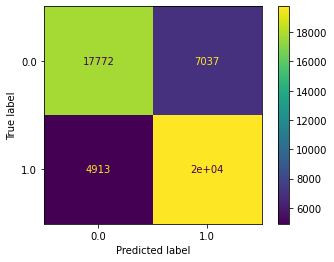

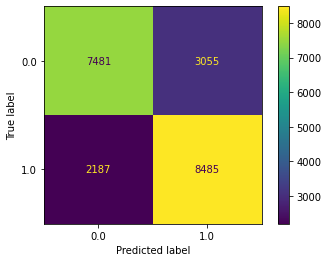

In [ ]:
print("Best parameters")
print(clf.best_params_)
bst = clf.best_estimator_
y_pred_train = bst.predict(X_train)
y_pred_test = bst.predict(X_test)
print("\n")
print("Accuracy, Precision, Recall for Train set:")
print("Accuracy")
print(accuracy_score(y_train, y_pred_train))
print("Precision")
print(precision_score(y_train, y_pred_train))
print("Recall")
print(recall_score(y_train, y_pred_train))
print("Accuracy, Precision, Recall for Test set:")
print("Accuracy")
print(accuracy_score(y_test, y_pred_test))
print("Precision")
print(precision_score(y_test, y_pred_test))
print("Recall") 
print(recall_score(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
# Hyperparameter Virtualization
res = pd.DataFrame(clf.cv_results_)
res.sort_values('rank_test_score')
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.338115,0.011676,0.017382,0.001018,0.8,0.02,2,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.796345,0.801614,0.798117,0.798692,0.002189,70
1,0.322749,0.003781,0.018537,0.000374,0.8,0.02,2,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.796345,0.801614,0.798117,0.798692,0.002189,70
2,0.325492,0.000481,0.018047,0.000415,0.8,0.02,2,300,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.796345,0.801614,0.798117,0.798692,0.002189,70
3,0.309389,0.019602,0.018732,0.001199,0.8,0.02,3,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.808475,0.813336,0.810987,0.810933,0.001985,67
4,0.309747,0.005794,0.018133,0.001624,0.8,0.02,3,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.808475,0.813336,0.810987,0.810933,0.001985,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.654618,0.023206,0.025103,0.000977,1,0.3,3,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.824085,0.830503,0.829824,0.828137,0.002879,34
68,0.678337,0.034010,0.024765,0.000529,1,0.3,3,300,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.824085,0.830503,0.829824,0.828137,0.002879,34
69,0.529592,0.055690,0.024105,0.000628,1,0.3,4,100,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.822626,0.830914,0.828538,0.827359,0.003485,46
70,0.522357,0.065471,0.023863,0.000514,1,0.3,4,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.822626,0.830914,0.828538,0.827359,0.003485,46


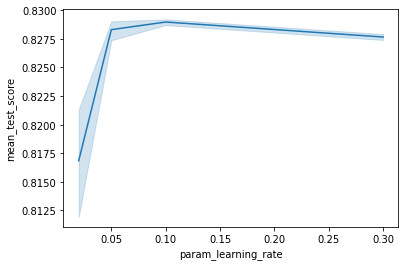

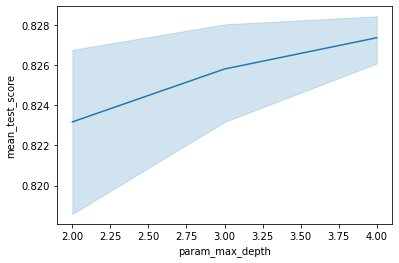

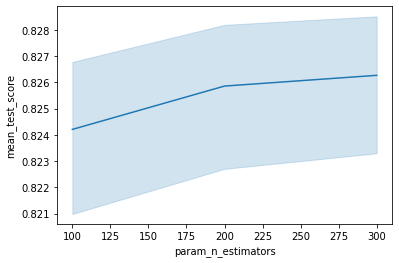

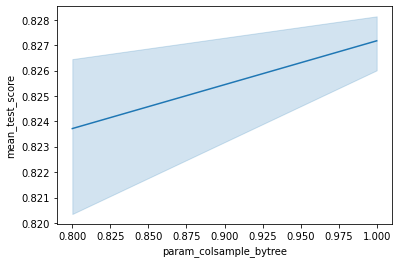

In [ ]:
sns.lineplot(data=res, x="param_learning_rate", y="mean_test_score")
plt.show()
sns.lineplot(data=res, x="param_max_depth", y="mean_test_score")
plt.show()
sns.lineplot(data=res, x="param_n_estimators", y="mean_test_score")
plt.show()
sns.lineplot(data=res, x="param_colsample_bytree", y="mean_test_score")
plt.show()